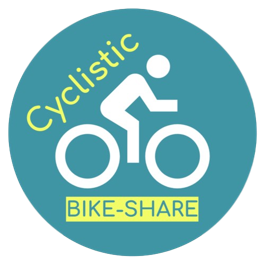


# **Case Study 1: How Does a Bike-Share Navigate Speedy Success?**

# **Scenario**

I'm a junior data analyst working in the marketing analyst team at **Cyclistic**, a bike-share company in Chicago.

The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently.

From these insights, my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve my recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# **Characters and teams**

* **Cyclistic**: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.
* **Lily Moreno**: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
* **Cyclistic marketing analytics team**: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.
* **Cyclistic executive team**: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

# Ask

Three questions will guide the future marketing program:

1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

Moreno has assigned me the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?

I will produce a report with the following deliverables:

1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Recommendations based on my analysis

***Business Task**: Understanding Differences in Bike Usage Between Annual Members and Casual Riders for Conversion Strategy casual riders to annual members.*

***Objective**: To analyze and compare the bike usage patterns of annual members and casual riders of Cyclistic in order to identify differences and insights that can inform the design of a marketing strategy to convert casual riders into annual members.*

# **Prepare**

To analyze and identify trends, I will use Cyclistic's historical travel data for the past 12 months (2022.06-2023.05), [available for download at the link](https://divvy-tripdata.s3.amazonaws.com/index.html). This data was provided by Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement). This is publicly available data that can be used to study how different types of customers use Cyclistic bicycles. The data is anonymized and does not contain personal information of service users. The downloaded data is fully compliant with the [ROCCC](https://medium.com/@varunsrivatsa27/the-importance-of-identifying-good-data-sources-which-rocccs-e6c8d7350339).

# **Process**

I originally planned to use [Google BigQuary SandBox](https://console.cloud.google.com/bigquery?project=my-project-for-gda-001&ws=!1m0) to prepare the data, combine it into one common data frame, and then perform descriptive analysis. As it turned out, most of the 12 .csv files I uploaded were over 100mb in size, so using Google BigQuary SandBox was not possible due to the 100mb import limit.

I will use [RStudio Desktop](https://posit.co/download/rstudio-desktop/) and R language for the above-described purposes and preliminary visualization of the obtained results.

**Installing & Loading packages:**

In [ ]:
# Installing the packages:
install.packages('tidyverse')
install.packages('janitor')
install.packages('lubridate')

In [ ]:
# Loading the packages:
library(tidyverse)   # Provides tools for data manipulation and visualization.
library(janitor)     # Offers functions for data cleaning.
library(lubridate)   # Facilitates manipulation of date and time data.
library(hms)         # Designed for handling time-of-day data.
library(ggplot2)     # Used for creating data visualizations.
library(dplyr)       # Contains tools for data manipulation.
library(scales)      # Includes functions for formatting plot scales.

**COLLECTING DATA**

Load original .csv files, a years worth of data from 2022.06 to 2023.05 (12 months)

In [ ]:
# sets the working directory to simplify data access (specify the path to the folder with .csv files):
setwd("../input/gda-capstone-project-1-cyclistic")

# Import .csv files from the working directory:
df_2022_06 <- read_csv("202206-divvy-tripdata.csv")
df_2022_07 <- read_csv("202207-divvy-tripdata.csv")
df_2022_08 <- read_csv("202208-divvy-tripdata.csv")
df_2022_09 <- read_csv("202209-divvy-tripdata.csv")
df_2022_10 <- read_csv("202210-divvy-tripdata.csv")
df_2022_11 <- read_csv("202211-divvy-tripdata.csv")
df_2022_12 <- read_csv("202212-divvy-tripdata.csv")
df_2023_01 <- read_csv("202301-divvy-tripdata.csv")
df_2023_02 <- read_csv("202302-divvy-tripdata.csv")
df_2023_03 <- read_csv("202303-divvy-tripdata.csv")
df_2023_04 <- read_csv("202304-divvy-tripdata.csv")
df_2023_05 <- read_csv("202305-divvy-tripdata.csv")

**CONVERTING AND MERGING DATA INTO ONE FILE**

In [ ]:
# Comparing the column names each of the files before merging:
colnames(df_2022_06)
colnames(df_2022_07)
colnames(df_2022_08)
colnames(df_2022_09)
colnames(df_2022_10)
colnames(df_2022_11)
colnames(df_2022_12)
colnames(df_2023_01)
colnames(df_2023_02)
colnames(df_2023_03)
colnames(df_2023_04)
colnames(df_2023_05)


* In all data frames, the columns have identical names - there are no discrepancies.

In [ ]:
# Examine the loaded data frames for inconsistencies:
str(df_2022_06)
str(df_2022_07)
str(df_2022_08)
str(df_2022_09)
str(df_2022_10)
str(df_2022_11)
str(df_2022_12)
str(df_2023_01)
str(df_2023_02)
str(df_2023_03)
str(df_2023_04)
str(df_2023_05)

* All data frames have the same structure - the corresponding columns have the same data types and attributes, there are no discrepancies.

**Merge the loaded data frames:**

In [ ]:
# Merge all of the data frames into one year view:
cyclistic_df <- rbind(df_2022_06, df_2022_07, df_2022_08, df_2022_09, df_2022_10, df_2022_11, df_2022_12, df_2023_01, df_2023_02, df_2023_03, df_2023_04, df_2023_05)

**PREPARING FOR ANALYSIS: CLEANING AND ADDING DATA**

We can use different variants of commands in order to explore the merged data frame. 

**Explore the merged data:**

In [ ]:
# View the merged data frame
cyclistic_df

In [ ]:
# Number of rows in the data frame:
nrow(cyclistic_df)

In [ ]:
# Dimensions of the data frame:
dim(cyclistic_df)

In [ ]:
# List of column names:
colnames(cyclistic_df)

In [ ]:
# List of columns and data types
glimpse(cyclistic_df)

In [ ]:
# See the first 6 rows of data frame:
head(cyclistic_df)  ## or tail(cyclistic_df)

In [ ]:
# List of columns and data types (numeric, character, etc.):
str(cyclistic_df)

In [ ]:
# Statistical summary of data (mainly for numerics):
summary(cyclistic_df)

In [ ]:
# View full data frame:
View(cyclistic_df)

* Examining the resulting data frame after merging, it can be noted that there are no different names of the same type in the member_casual and rideable_type columns.
* It should also be noted that there are a large number of observations with NA in some columns, such observations should be removed.
* At the moment we can perform aggregation with a limited number of conditions, so we need to create additional columns with selected time attributes, which will allow us to analyze in different time sections.

**Create columns for: year, month, season, day of week, day, time, hour, time of day, ride length**

At the moment we have limited ability to aggregate data and thus analyze it further.

Let's create additional columns with different time attributes, as well as a calculation field with trip duration. The new columns will allow us to analyze in different time intervals and calculate the number and average time of trips, including the subsequent creation of a dashboard in Tableau.

In [ ]:
# Default format is yyyy-mm-dd, use start date:
cyclistic_df$date <- as.Date(cyclistic_df$started_at)  # the default format is yyyy-mm-dd

# Create column for year:
cyclistic_df$year <- format(as.Date(cyclistic_df$date), "%Y")

# Create column for year and month in the format yyyy.mm:
cyclistic_df$year_month <- format(as.Date(cyclistic_df$date), "%Y.%m")

# Create column for month:
cyclistic_df$month <- format(as.Date(cyclistic_df$date), "%m")

# Create columns of seasons: Spring, Summer, Fall, Winter:
cyclistic_df <-cyclistic_df %>% mutate(season =
                                         case_when(month == "03" ~ "Spring",
                                                   month == "04" ~ "Spring",
                                                   month == "05" ~ "Spring",
                                                   month == "06" ~ "Summer",
                                                   month == "07" ~ "Summer",
                                                   month == "08" ~ "Summer",
                                                   month == "09" ~ "Fall",
                                                   month == "10" ~ "Fall",
                                                   month == "11" ~ "Fall",
                                                   month == "12" ~ "Winter",
                                                   month == "01" ~ "Winter",
                                                   month == "02" ~ "Winter")
                                      )

# Create column for day:
cyclistic_df$day <- format(as.Date(cyclistic_df$date), "%d")

# Create column for day of week:
cyclistic_df$day_of_week <- wday(cyclistic_df$started_at)

# Format time as HH:MM:SS:
cyclistic_df$time <- format(as.Date(cyclistic_df$date), "%H:%M:%S")

# Create new column for time:
cyclistic_df$time <- as_hms((cyclistic_df$started_at))

# Create new column for hour:
cyclistic_df$hour <- hour(cyclistic_df$time)

# Create time_day column: Night, Morning, Day, Evening:
cyclistic_df <-cyclistic_df %>% mutate(time_of_day = 
                                         case_when(hour == "0" ~ "Night",
                                                   hour == "1" ~ "Night",
                                                   hour == "2" ~ "Night",
                                                   hour == "3" ~ "Night",
                                                   hour == "4" ~ "Night",
                                                   hour == "5" ~ "Night",
                                                   hour == "6" ~ "Morning",
                                                   hour == "7" ~ "Morning",
                                                   hour == "8" ~ "Morning",
                                                   hour == "9" ~ "Morning",
                                                   hour == "10" ~ "Morning",
                                                   hour == "11" ~ "Morning",
                                                   hour == "12" ~ "Afternoon",
                                                   hour == "13" ~ "Afternoon",
                                                   hour == "14" ~ "Afternoon",
                                                   hour == "15" ~ "Afternoon",
                                                   hour == "16" ~ "Afternoon",
                                                   hour == "17" ~ "Afternoon",
                                                   hour == "18" ~ "Evening",
                                                   hour == "19" ~ "Evening",
                                                   hour == "20" ~ "Evening",
                                                   hour == "21" ~ "Evening",
                                                   hour == "22" ~ "Evening",
                                                   hour == "23" ~ "Evening")
                                      )

# Calculate & Create ride length column by subtracting ended_at time from started_at time and converted it to minutes:
cyclistic_df$ride_length <- round(difftime(cyclistic_df$ended_at, cyclistic_df$started_at, units = "mins"), 2)

**Clean the data (5,829,030 rows -> 4,494,246 rows):**

I calculated the number of deleted lines in RStudio. Here I decided not to overload the already voluminous code with additional lines **with nrow(cyclistic_df)**, but just added the corresponding information in the comments.

In [ ]:
# Delete the 12 original data frames to make room in the environment:
remove(df_2022_06, df_2022_07, df_2022_08, df_2022_09, df_2022_10, df_2022_11, df_2022_12, df_2023_01, df_2023_02, df_2023_03, df_2023_04, df_2023_05)

In [ ]:
# Clear and remove spaces, parentheses, etc. in column headers:
cyclistic_df <- clean_names(cyclistic_df)  # this is library(janitor)

In [ ]:
# Remove empty:
remove_empty(cyclistic_df, which = c())  # 5,829,030 (no rows with empty values)

In [ ]:
# Remove rows with NA values:
cyclistic_df <- na.omit(cyclistic_df)  # 4,494,681 rows (-1,334,349 rows with NA values)

In [ ]:
# Remove duplicate rows:
cyclistic_df <- distinct(cyclistic_df)  # 4,494,681 rows (no rows with duplicate values)

In [ ]:
# Remove where ride_length is 0 or negative:
cyclistic_df <- cyclistic_df[!(cyclistic_df$ride_length <=0),]  # 4,494,342 rows (-339 rows with ride_length is 0 or negative)

In [ ]:
# Remove cases where max_ride_length is greater than 1440 minutes (24 hours) - assume bikes exceeding this value have been stolen:
cyclistic_df <- cyclistic_df[cyclistic_df$ride_length <= 1440, ]  # 4,494,246 rows (-435 rows with ride_length > 1440 min)

**Explore the merged data after cleaning and adding columns:**

Now, after adding new fields to the merged data frame and cleaning it up, it's time for a final check on the cleanliness and consistency of the data before analyzing it.

In [ ]:
# View the merged and cleaned data frame after adding new columns:
cyclistic_df

In [ ]:
# Number of rows in the data frame:
nrow(cyclistic_df)

In [ ]:
# Dimensions of the data frame:
dim(cyclistic_df)

In [ ]:
# List of column names:
colnames(cyclistic_df)

In [ ]:
# List of columns and data types
glimpse(cyclistic_df)

In [ ]:
# See the first 6 rows of data frame:
head(cyclistic_df)  ## or tail(cyclistic_df)

In [ ]:
# List of columns and data types (numeric, character, etc.):
str(cyclistic_df)

In [ ]:
# Statistical summary of data (mainly for numerics):
summary(cyclistic_df)

In [ ]:
# View full data frame:
View(cyclistic_df)

**Load cleaned and processed data frame**

Unfortunately there is no way to unload a merged data frame here, or I haven't figured out how to do it. The script in RStudio works - it allows you to save the data frame obtained after all manipulations in .csv format for further analysis/visualization, for example, in Tableau.

My final .csv file turned out to be quite large - about 1GB 340MB.

In [ ]:
# Download the new data frame as a .csv file for vizualisation in Tableau:
write.csv(cyclistic_df, file = "cyclistic_data.csv")

# **Analyze & Share**

I decided to add to distribute visualizations to the corresponding blocks/sections of R code, poems for analysis with R stages Analyze & Share can be considered unified.

Next, I plan to separate the Share stage separately, and present in it the summary visualization developed in [Tableau](https://www.tableau.com/products/public).

**DESCRIPTIVE ANALYSIS**

> *The problem I ran into when trying to run code that displays graphs is that Kaggle can't create image files directly, which are normally used to display graphs in R. Instead, on Kaggle, graphs must be saved as files and then displayed. Instead, on Kaggle, graphs must be saved as files and then displayed. In other words, you need to pre-load the graphs as images, e.g. in .png format, into RStudio Desktop, and then attach them in a Markdown block under the appropriate script. This is a bit of a "crutch" - the code that generates graphs does not work here, so when you run it, you will get an error, but nevertheless you will be able to familiarize yourself with the graph loaded as an image.*

In [ ]:
# Review member_casual types:
table(cyclistic_df$member_casual)

In [ ]:
# Review rideable_type types:
table(cyclistic_df$rideable_type)

In [ ]:
# The most popular start station:
cyclistic_df %>%
  group_by(start_station_name) %>% 
  count(start_station_name) %>%
  arrange(desc(n))

In [ ]:
# The most popular start station by member type:
cyclistic_df %>%
  group_by(start_station_name) %>% 
  count(member_casual, start_station_name) %>%
  arrange(desc(n))

In [ ]:
# Global statistical analysis
trip_stats <- cyclistic_df %>%
  group_by(member_casual) %>% 
  summarise(average_ride_length = round(mean(ride_length), 2),
            median_ride_length = round(median(ride_length), 2),
            min_ride_length = round(min(ride_length), 2),
            max_ride_length = round(max(ride_length), 2))
head(trip_stats)

**Total & Average**

In [ ]:
# Total number of rides:
nrow(cyclistic_df) # matches the number of rows in the data frame & the number of trips

In [ ]:
# Average ride length:
ride_lengt_avg <- round(mean(cyclistic_df$ride_length), 2)
print(ride_lengt_avg)

**Number & Average by member type (member, casual)**

In [ ]:
# Number of rides by member type:
cyclistic_df %>%
  group_by(member_casual) %>% 
  count(member_casual)

In [ ]:
# Visualization of Number of rides by member type:
custom_labels <- function(x) {unit_format(unit = "M", scale = 1e-6)(x)}  # Custom function for formatting y-axis labels
cyclistic_df %>% 
  group_by(member_casual) %>% 
  summarise(number_member_casual = n()) %>%
  ggplot(mapping = aes(x = member_casual, y = number_member_casual, fill = factor(member_casual))) + 
  geom_bar(stat = "identity", alpha = 0.7) +  # Adding transparency
  geom_text(aes(label = comma(number_member_casual), vjust = -0.5)) +  # Adding comma formatting
  labs(title = "Number of rides by member type", x = "Member type", y = "Number of rides") +
  theme_minimal() +
  theme(legend.position = "none") +  # Removing the legend
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 2800000, by = 500000), limits = c(0, 2800000))  # Formatting y-axis labels and limits

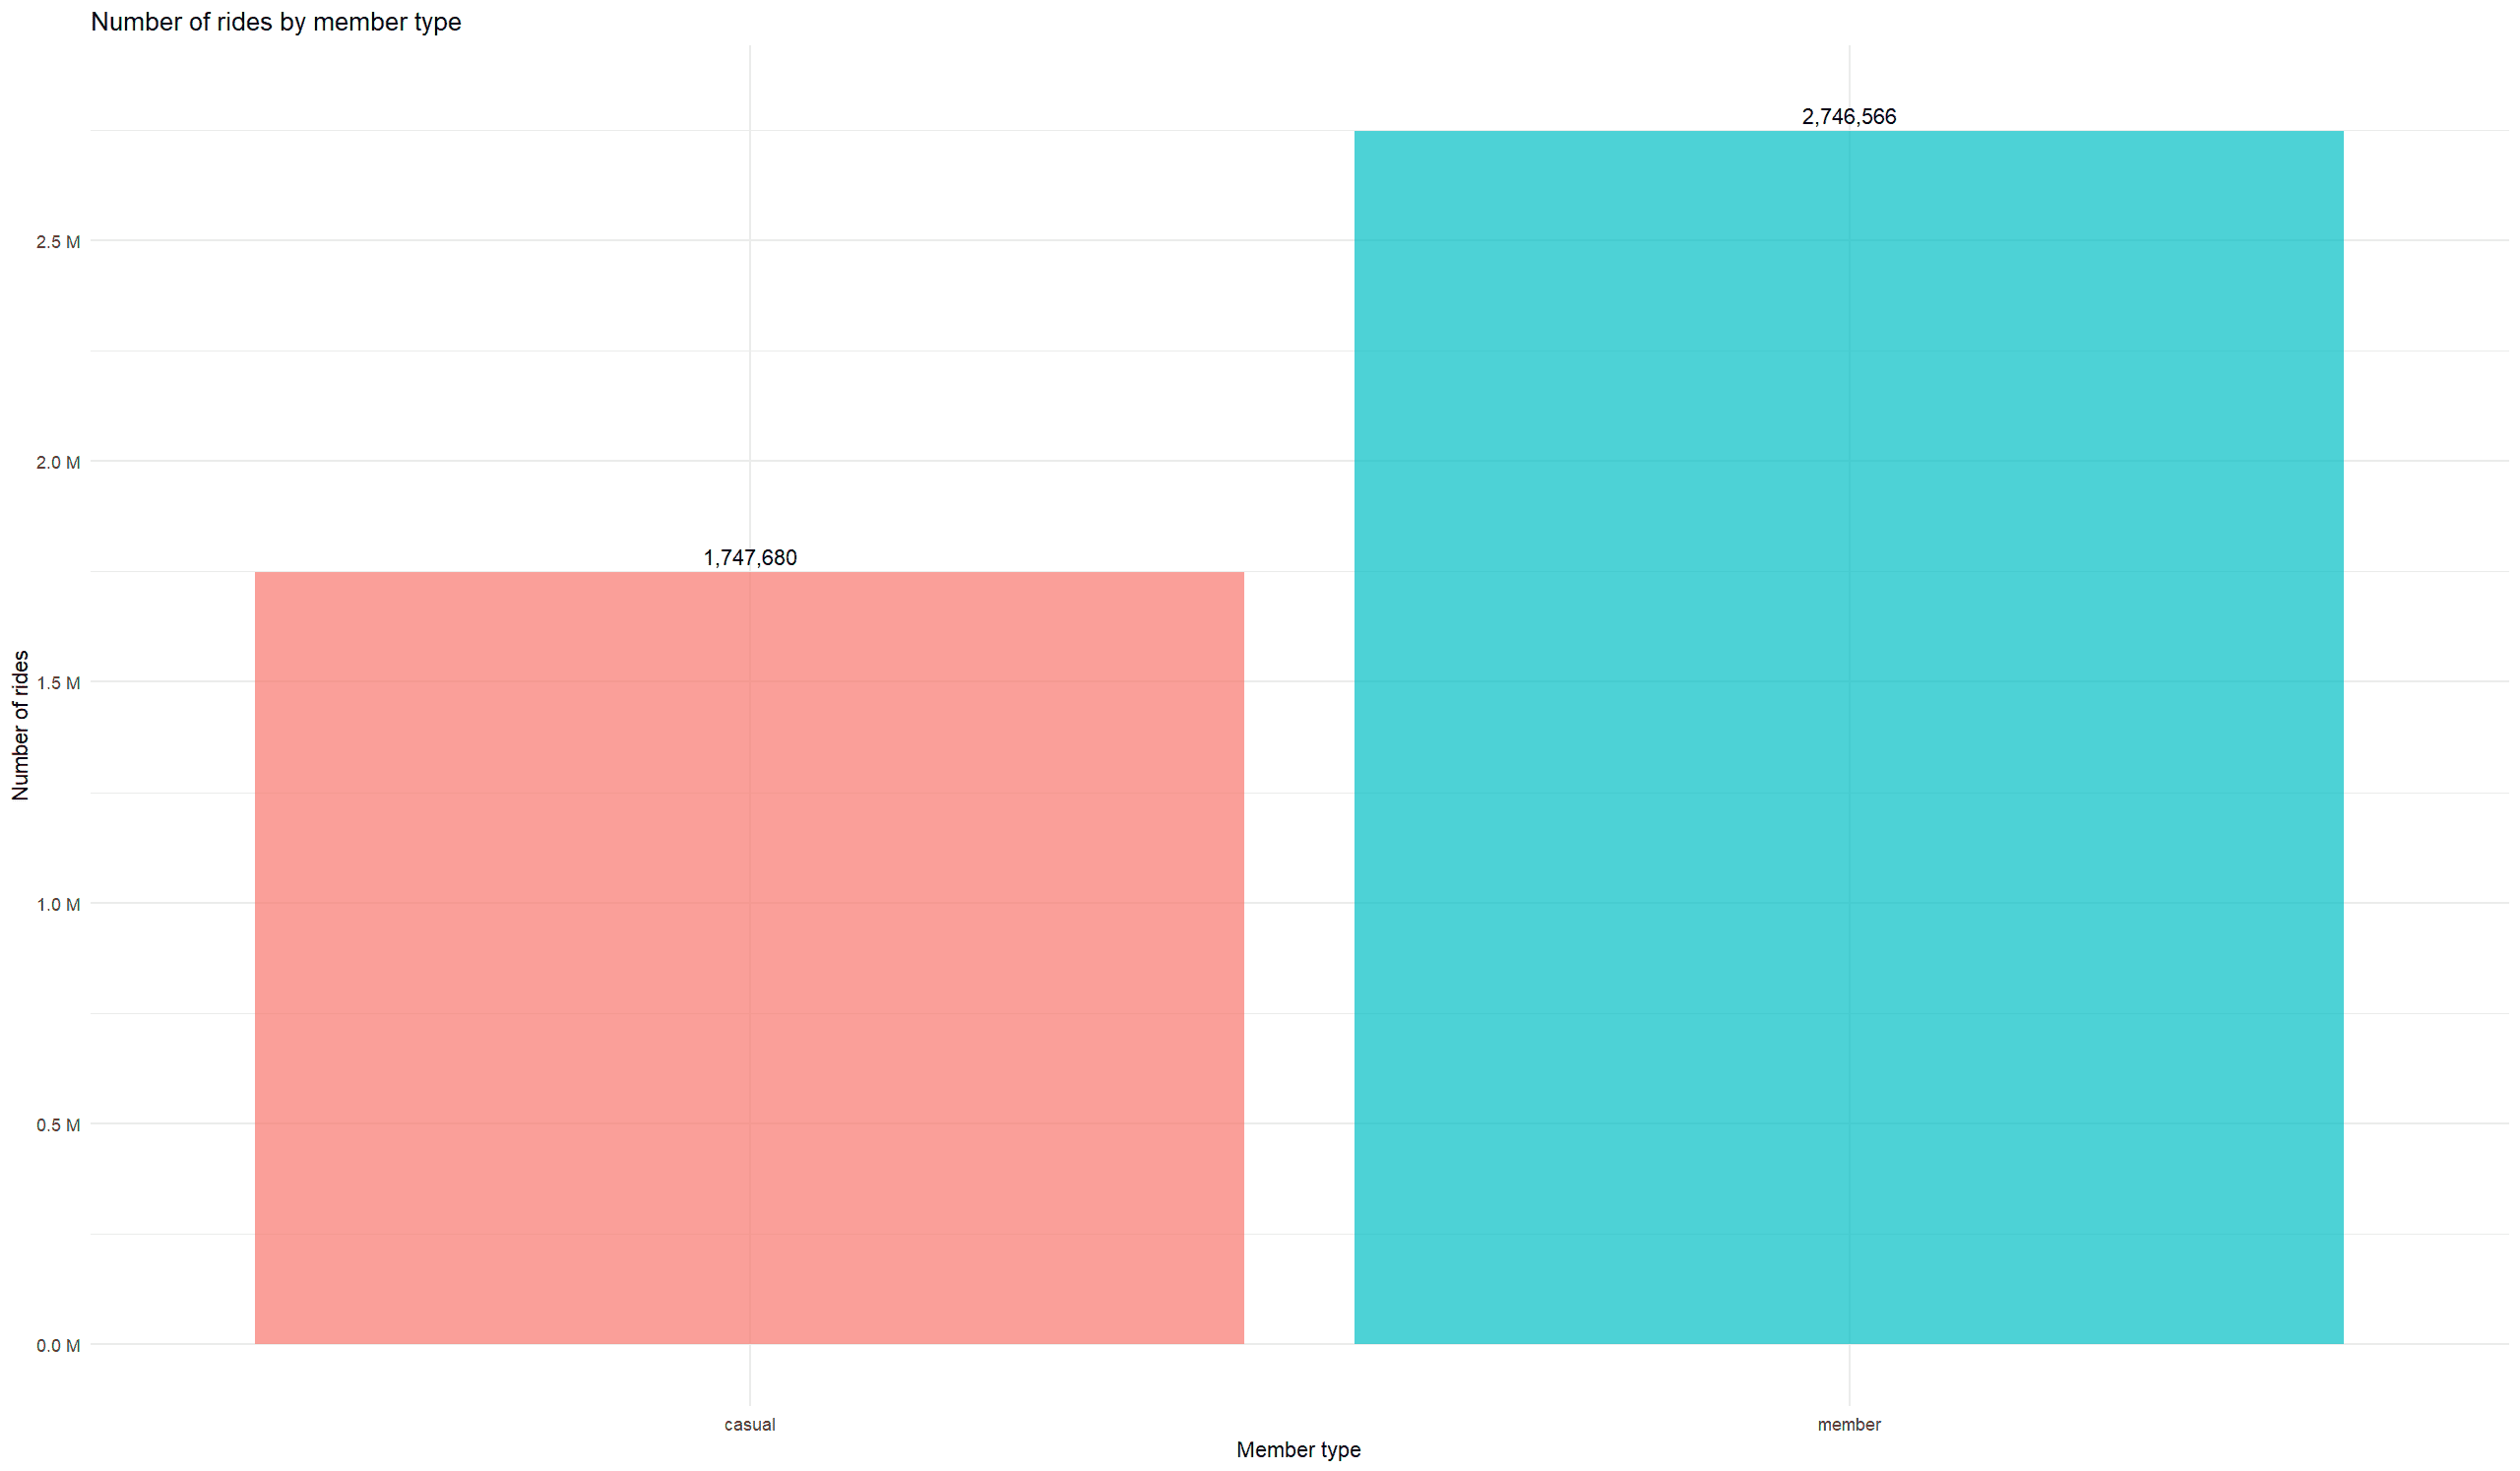

In [ ]:
# Average ride length by member type:
cyclistic_df %>%
  group_by(member_casual) %>% 
  summarise_at(vars(ride_length), list(~round(mean(ride_length), 2)))

In [ ]:
# Visualization of Average ride length by member type:
cyclistic_df %>% 
  group_by(member_casual) %>%
  summarize(average_ride_length = round(mean(ride_length), 2)) %>%
  ggplot(aes(x = member_casual, y = average_ride_length, fill = factor(member_casual))) +
  geom_bar(stat = "identity", alpha = 0.7) +  # Adding transparency
  geom_text(aes(label = average_ride_length, vjust = -0.5)) +
  labs(title = "Average ride length by member type, min", x = "Member type", y = "Average ride length, min") +
  theme_minimal() +
  theme(legend.position = "none")  # Removing the legend

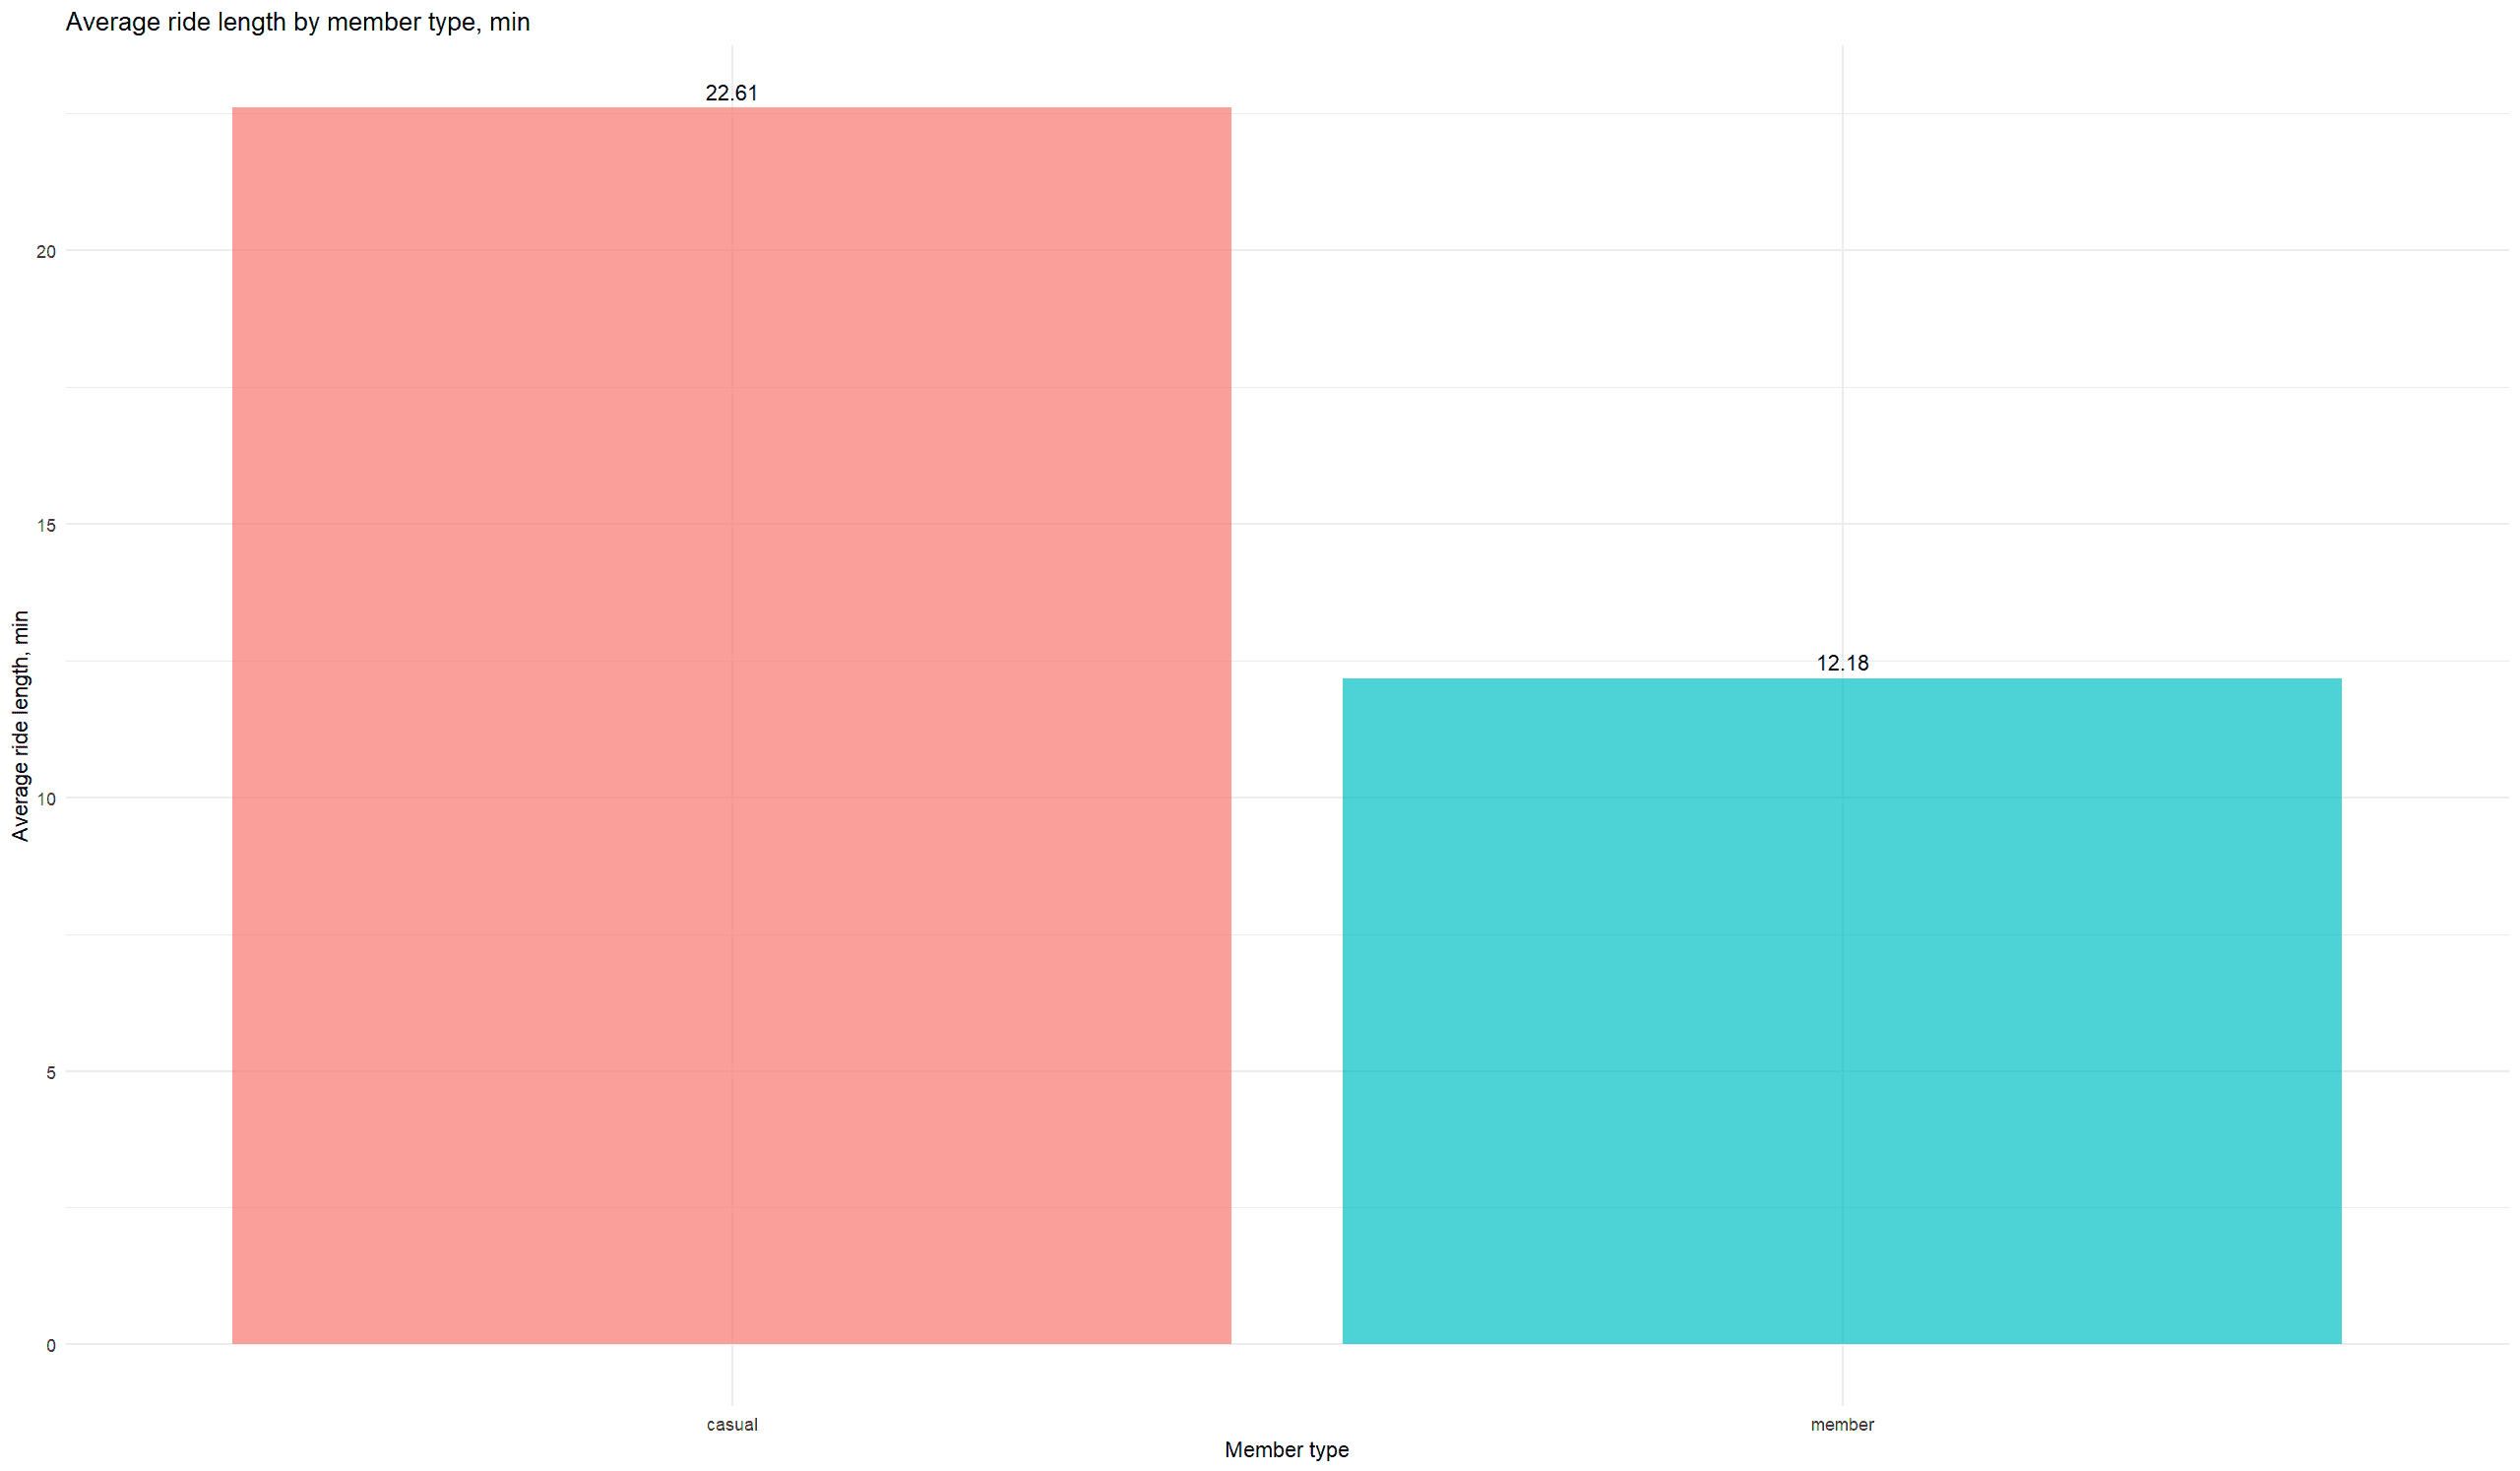

**Number & Average by type of bikes (classic_bike, docked_bike, electric_bike)**

In [ ]:
# Number of rides by type of bikes:
cyclistic_df %>%
  group_by(rideable_type) %>% 
  count(rideable_type)

In [ ]:
# Visualization of Number of rides by type of bikes:
custom_labels <- function(x) {unit_format(unit = "M", scale = 1e-6)(x)}
cyclistic_df %>% 
  group_by(rideable_type) %>% 
  summarise(number_rideable_type = n()) %>%
  ggplot(mapping = aes(x = rideable_type, y = number_rideable_type, fill = factor(rideable_type))) + 
  geom_bar(stat = "identity", alpha = 0.7) +  # Adding transparency
  geom_text(aes(label = comma(number_rideable_type), vjust = -0.5)) +  # Adding comma formatting
  labs(title = "Number of rides by type of bikes", x = "Type of bikes", y = "Number of rides") +
  theme_minimal() +
  theme(legend.position = "none") +  # Removing the legend
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 2500000, by = 500000), limits = c(0, 2600000))  # Formatting y-axis labels and limits

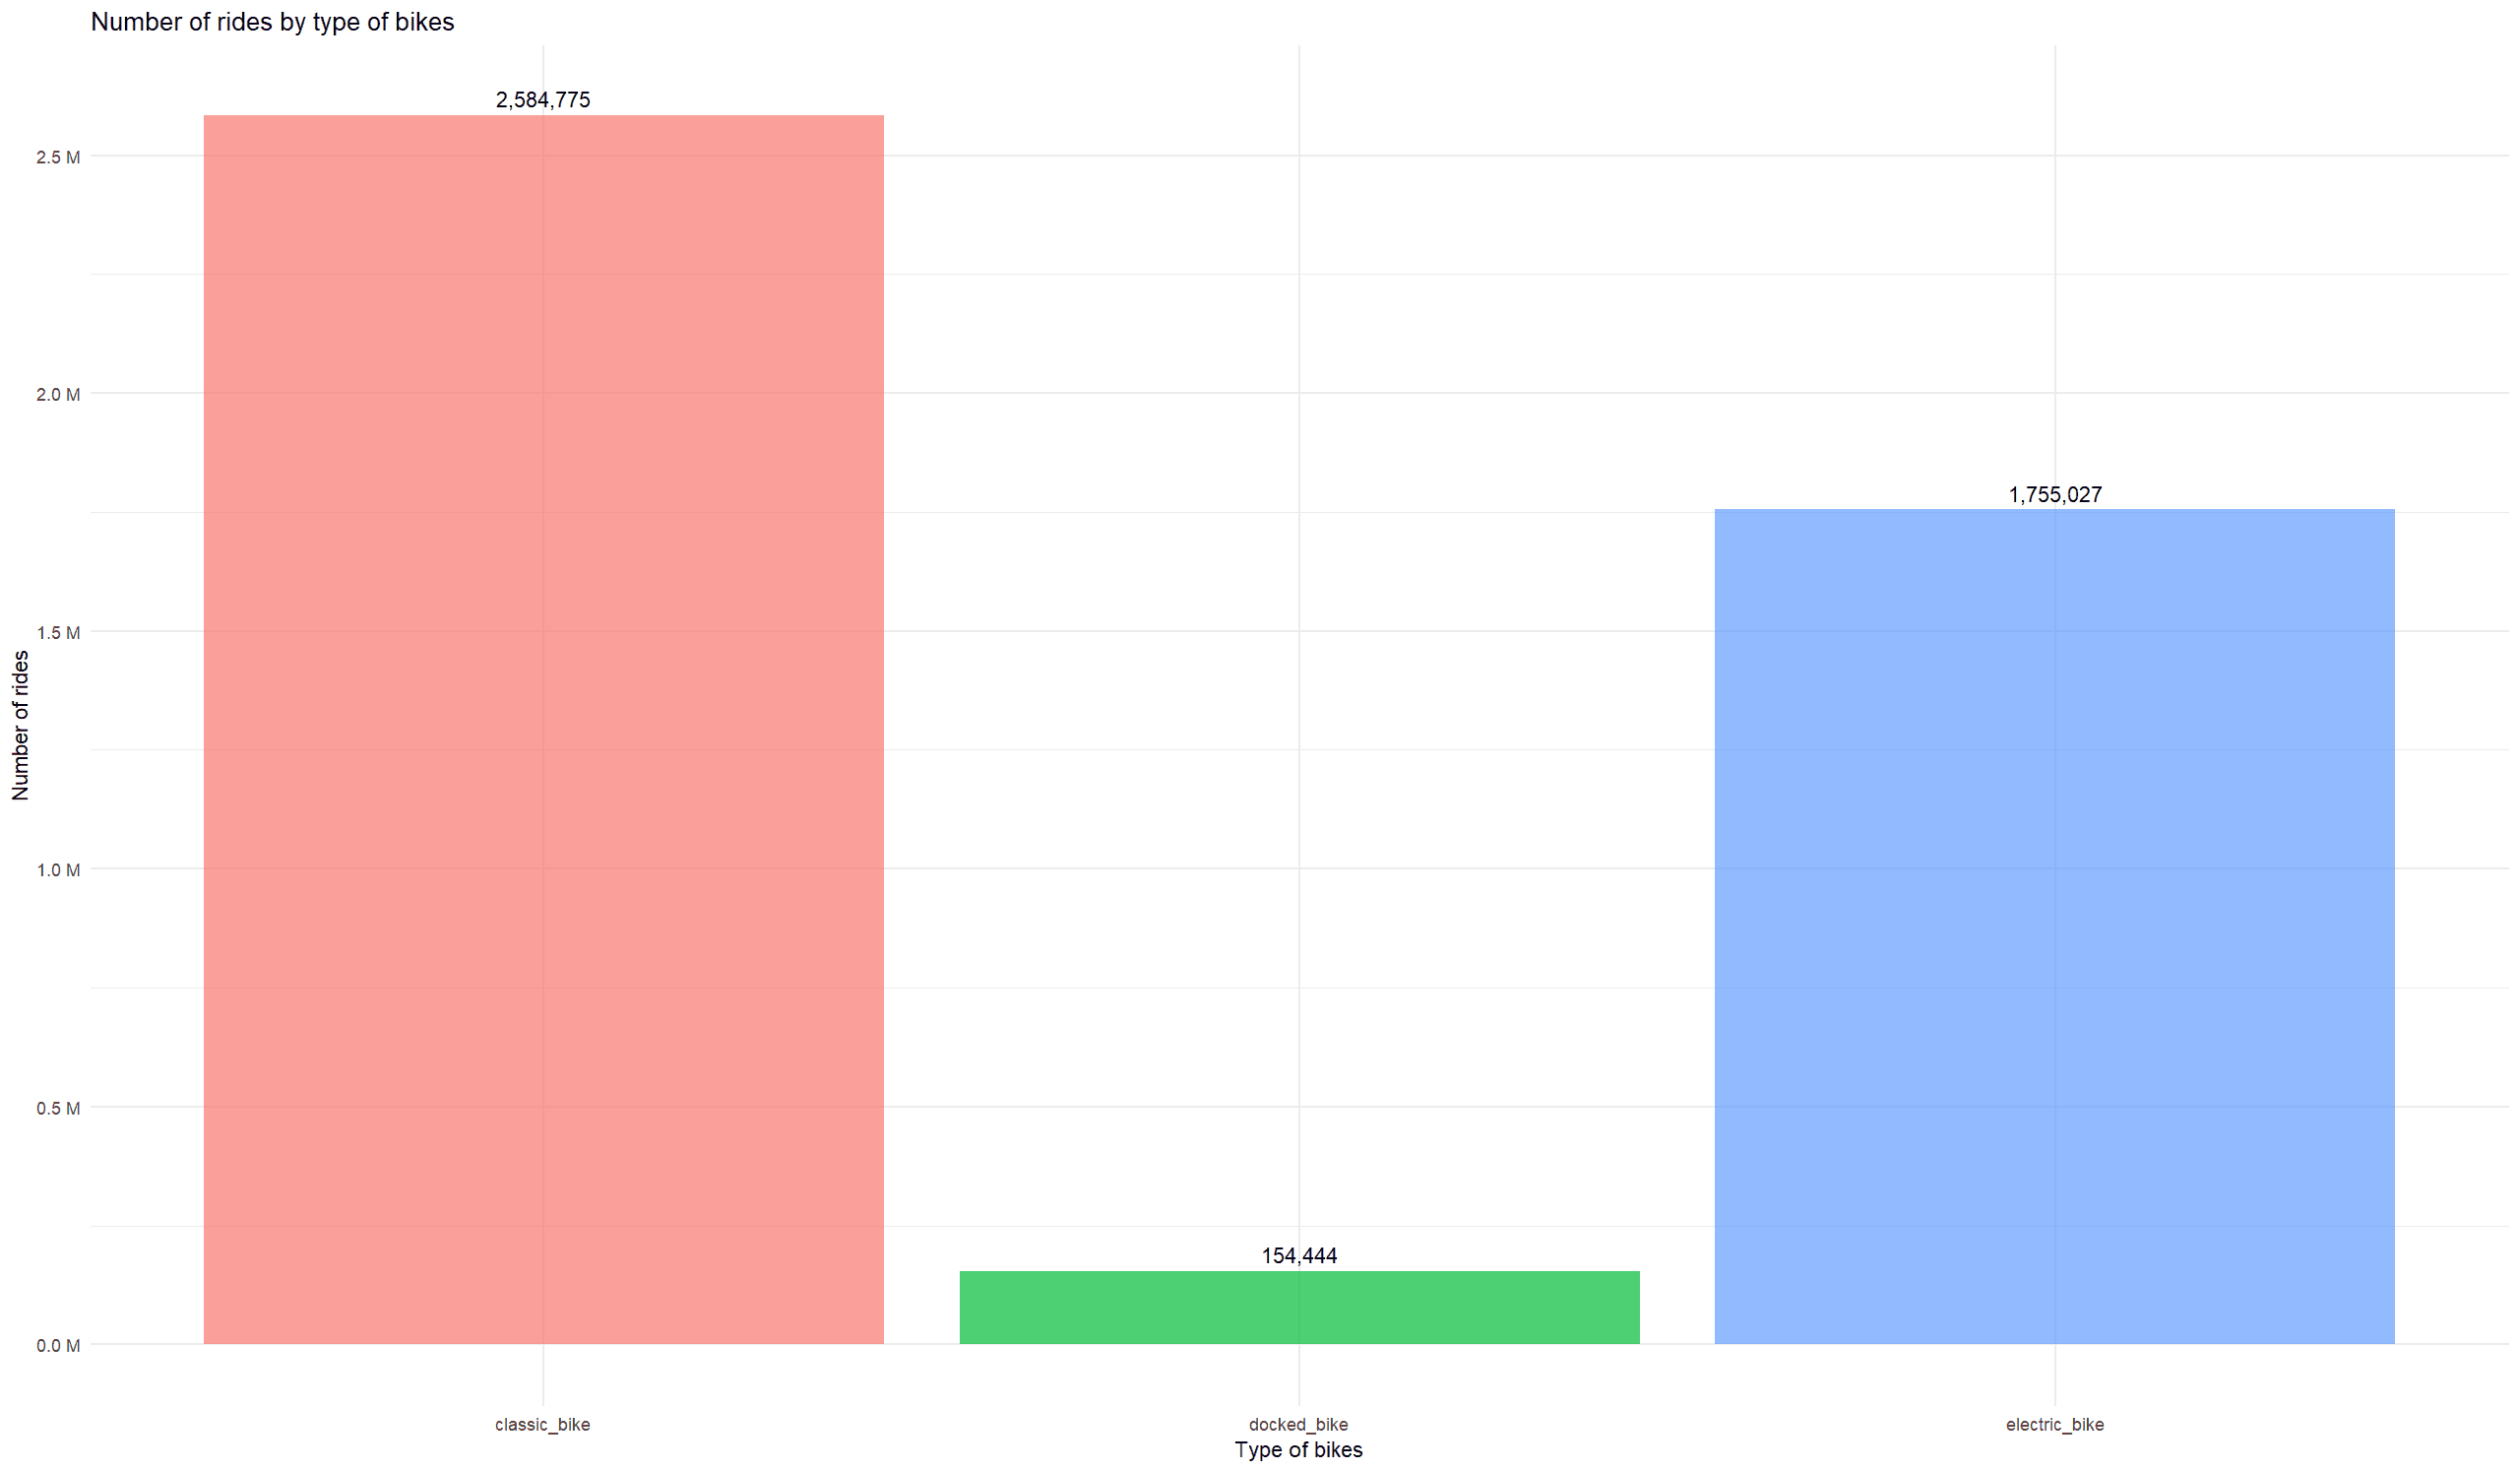

In [ ]:
# Average ride length by type of bike:
cyclistic_df %>%
  group_by(rideable_type) %>% 
  summarise_at(vars(ride_length), list(~round(mean(ride_length), 2)))

In [ ]:
# Visualization of Average ride length by type of bike:
cyclistic_df %>% 
  group_by(rideable_type) %>%
  summarise(average_ride_length = round(mean(ride_length), 2)) %>%  # I haven't figured out why the chart rounds to 1 decimal place, then I round to 2 decimal places
  ggplot(aes(x = rideable_type, y = average_ride_length, fill = rideable_type)) +
  geom_bar(stat = "identity", alpha = 0.7) +  # Adding transparency
  geom_text(aes(label = average_ride_length, vjust = -0.5)) +  # Adding comma formatting
  labs(title = "Average ride length by type of bike, min", x = "Type of bikes", y = "Average ride length, min") +
  theme_minimal() +
  theme(legend.position = "none")  # Removing the legend

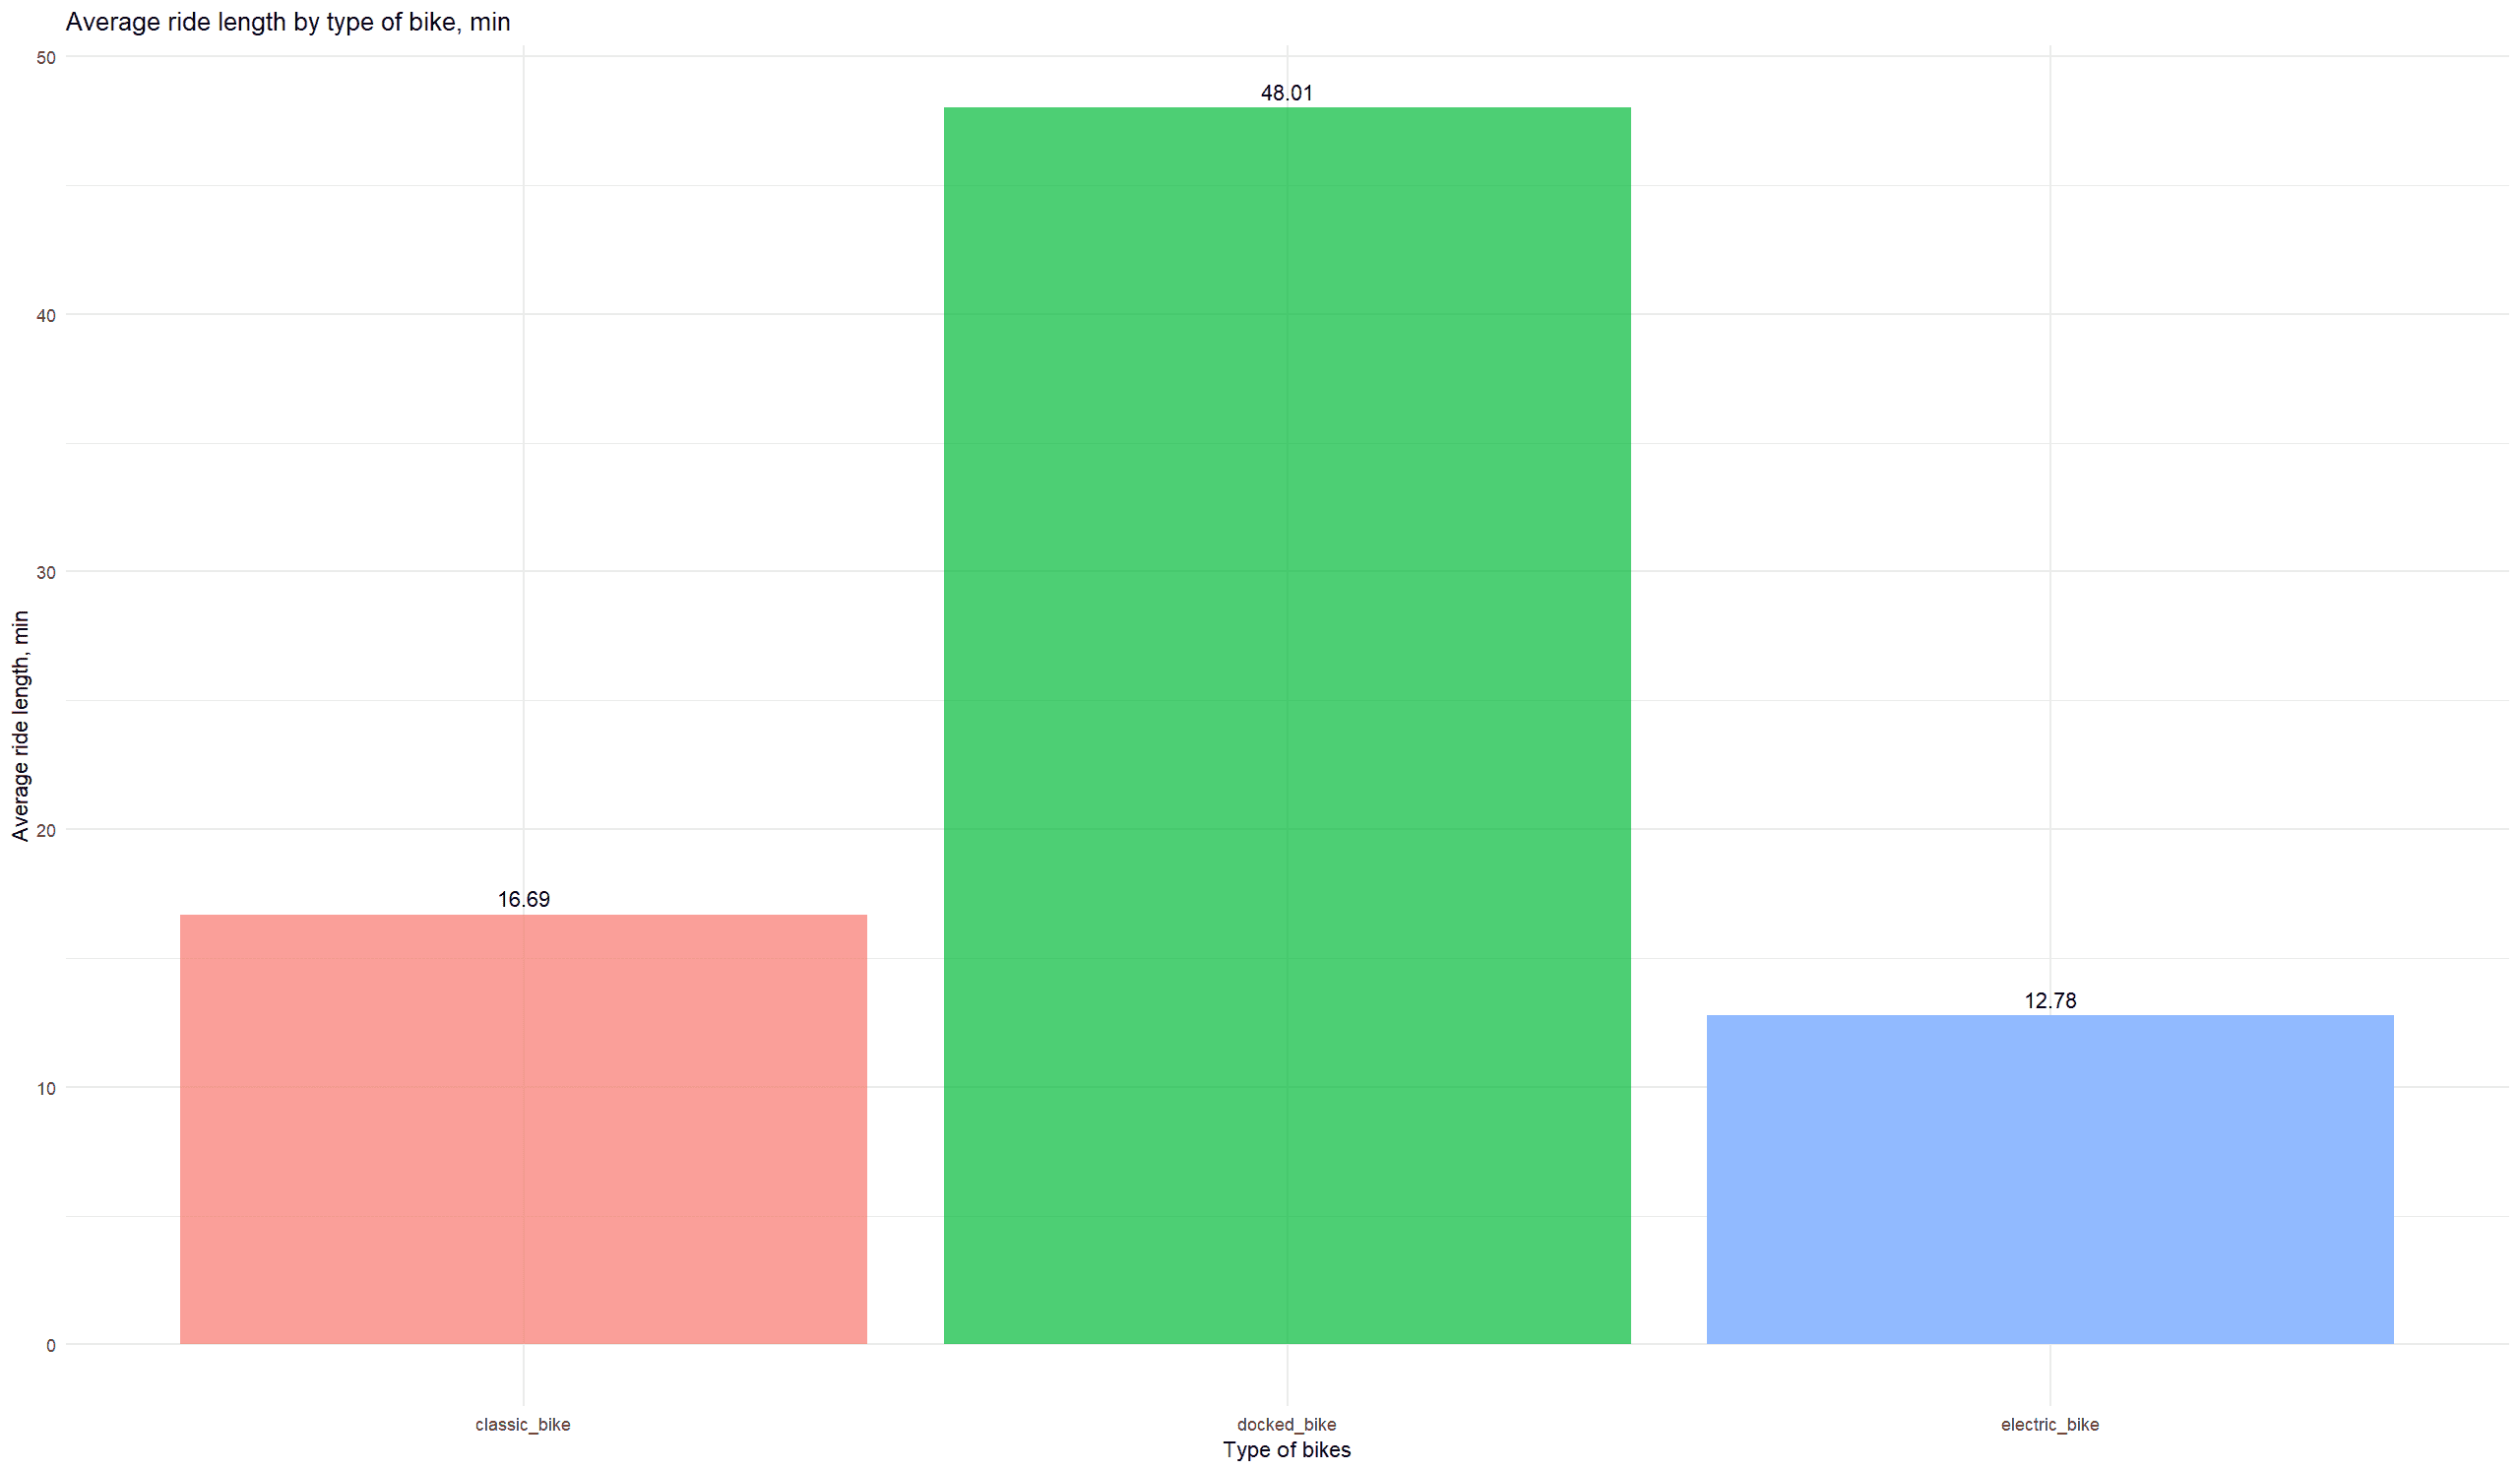

In [ ]:
# Number of rides by member type and by type of bikes:
cyclistic_df %>% 
  group_by(rideable_type, member_casual) %>% 
  count(rideable_type)

In [ ]:
# Visualization of Number of rides by member type and by type of bikes:
custom_labels <- function(x) {unit_format(unit = "M", scale = 1e-6)(x)}
result_df <- cyclistic_df %>%  # Number of rides by member type and by type of bikes:
  group_by(rideable_type, member_casual) %>% 
  count(rideable_type)
ggplot(result_df, aes(x = rideable_type, y = n, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +  # Adding transparency
  geom_text(aes(label = comma(n), vjust = -0.5), position = position_dodge(width = 0.8)) +  # Adding comma formatting and adjusting position
  labs(title = "Number of rides by member type and by type of bikes", x = "Type of bikes", y = "Number of rides") +
  scale_y_continuous(labels = scales::comma_format(scale = 1e-6, suffix = "M", big.mark = ",")) +  # Formatting Y-axis labels
  theme_minimal() +
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 1800000, by = 500000), limits = c(0, 1800000))  # Formatting y-axis labels and limits

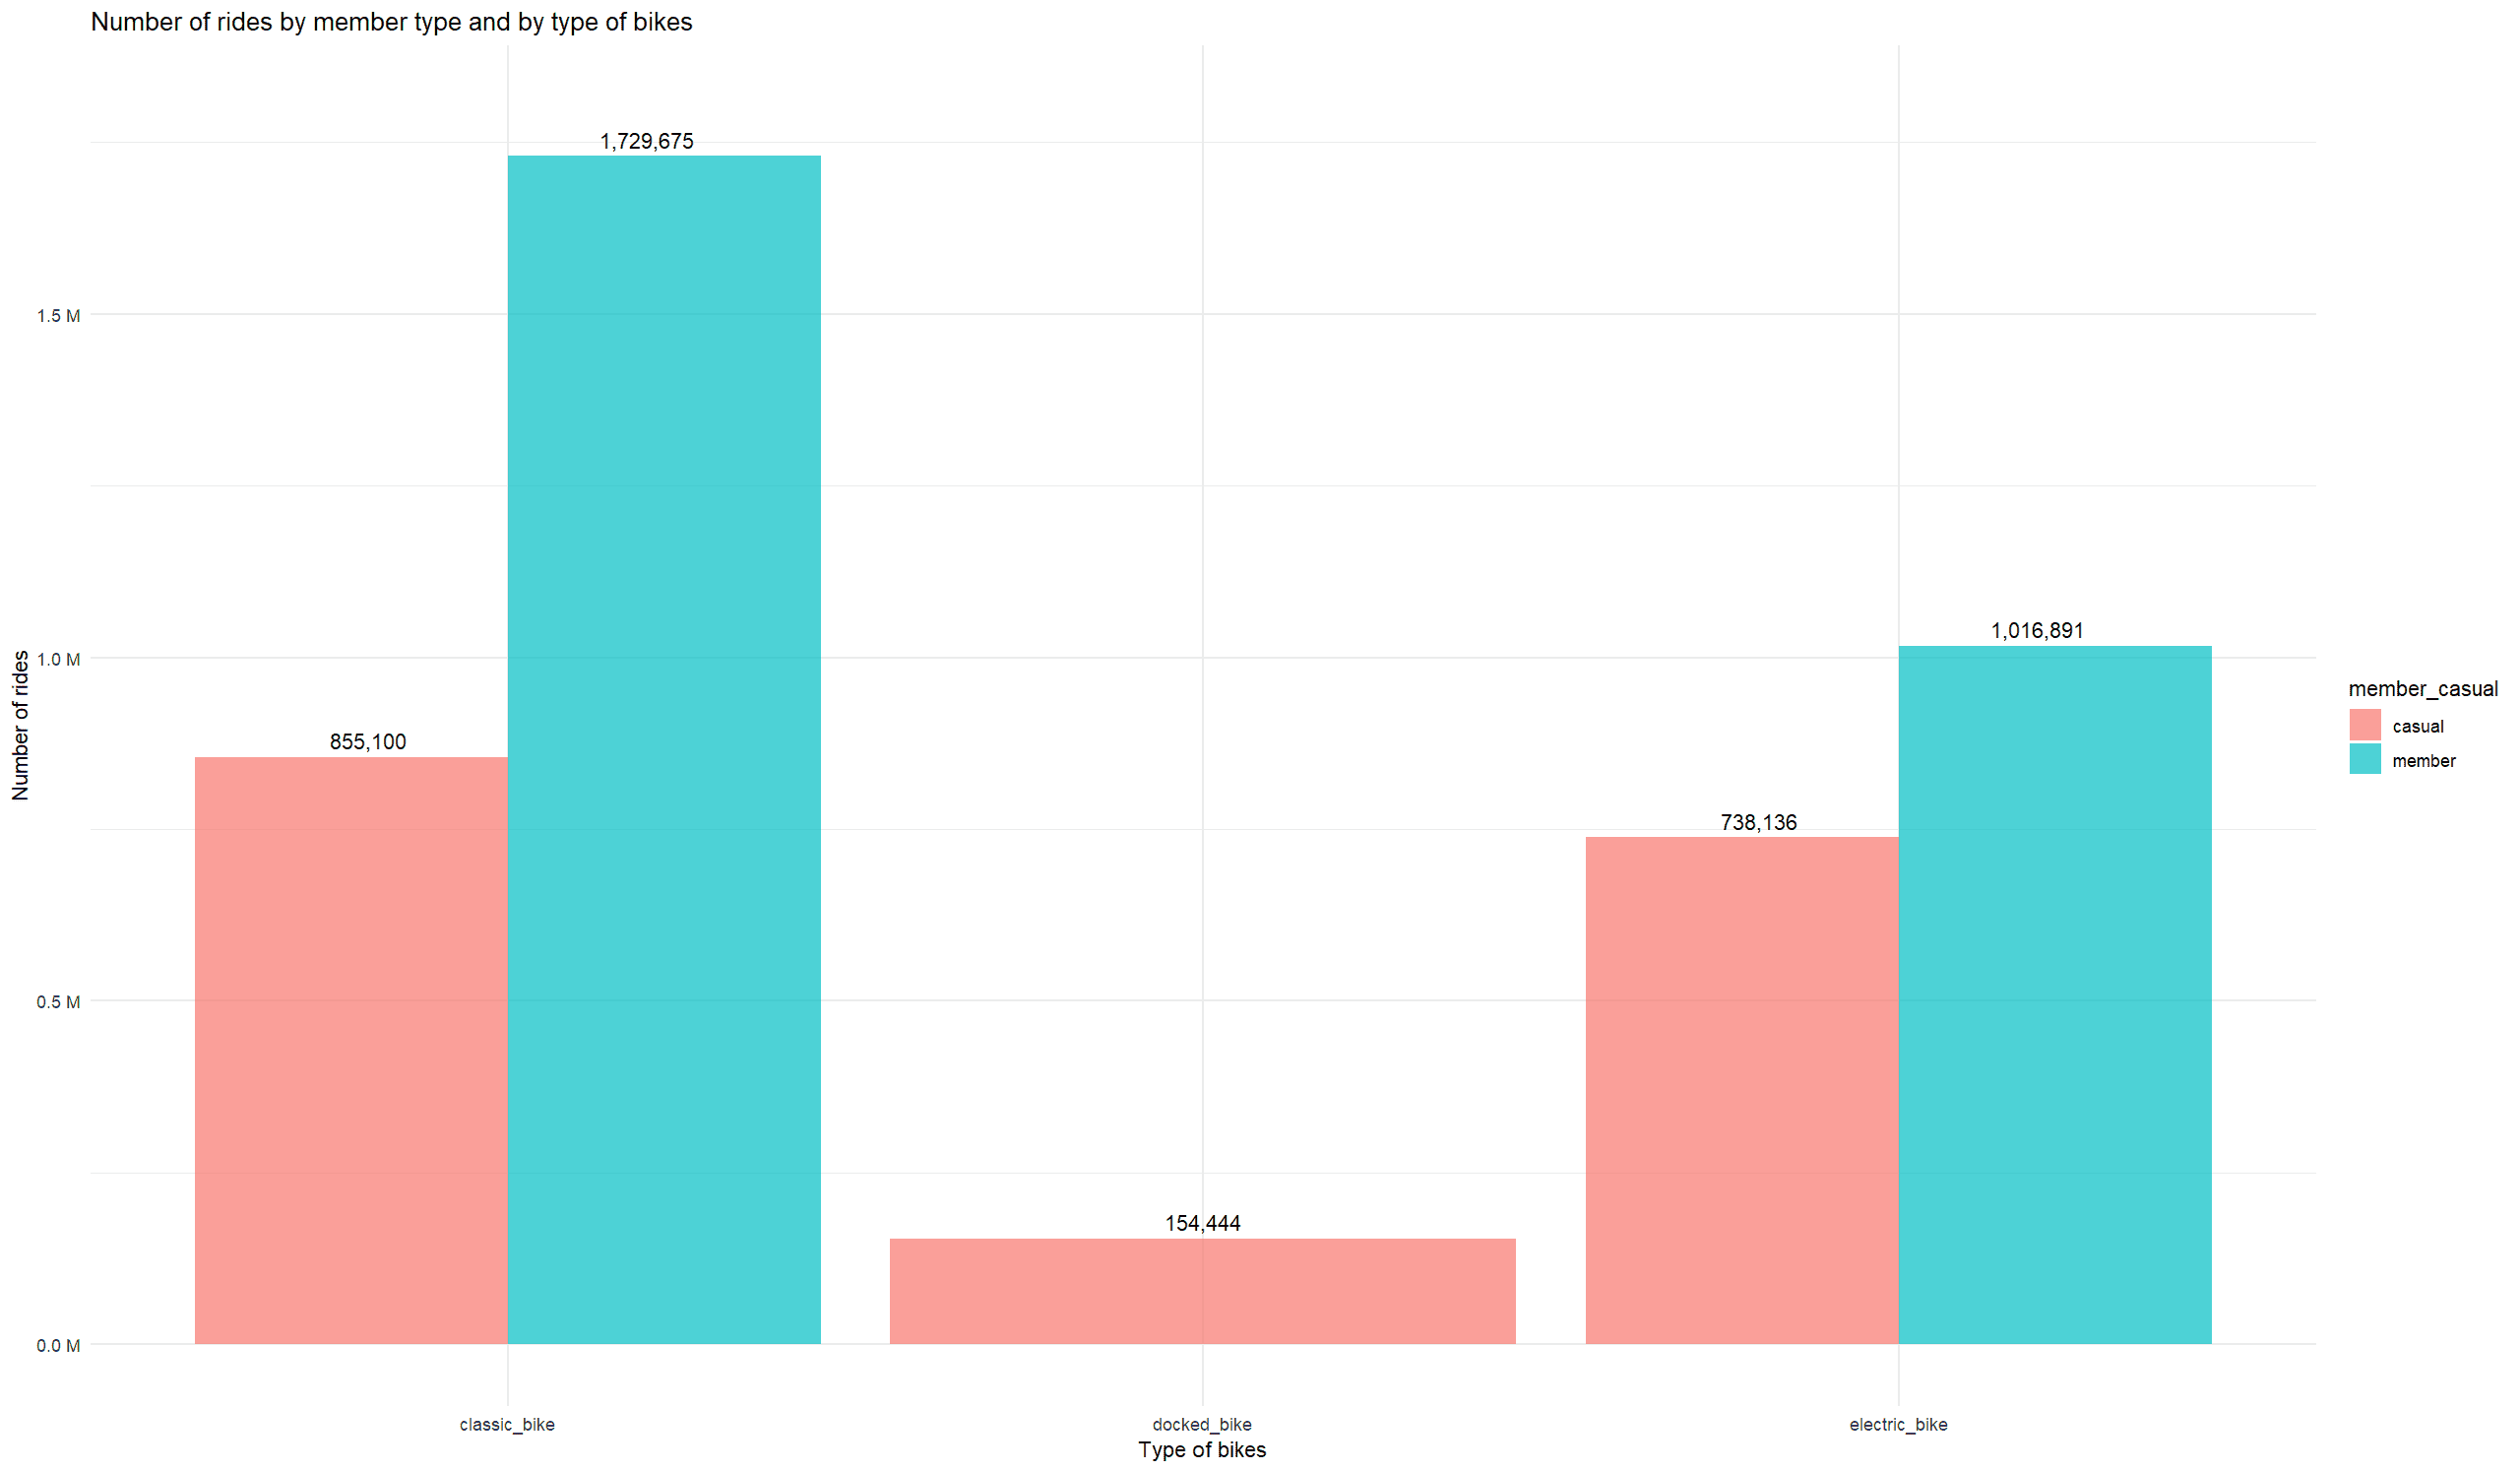

In [ ]:
# Average ride length by member type and by type of bikes:
cyclistic_df %>%
  group_by(rideable_type, member_casual) %>% 
  summarise_at(vars(ride_length), list(~round(mean(ride_length), 2)))

In [ ]:
# Visualization of Average ride length by member type and by type of bikes:
cyclistic_df %>% 
  group_by(rideable_type, member_casual) %>%
  summarise(average_ride_length = round(mean(ride_length), 2)) %>%
  ggplot(aes(x = rideable_type, y = average_ride_length, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +  # Adding transparency
  geom_text(aes(label = average_ride_length, vjust = -0.5), position = position_dodge(width = 0.9)) +  # Adding adjusting position
  labs(title = "Average ride length by member type and by type of bikes, min", x = "Type of bikes", y = "Average ride length, min", fill = 'Member type') +
  theme_minimal()

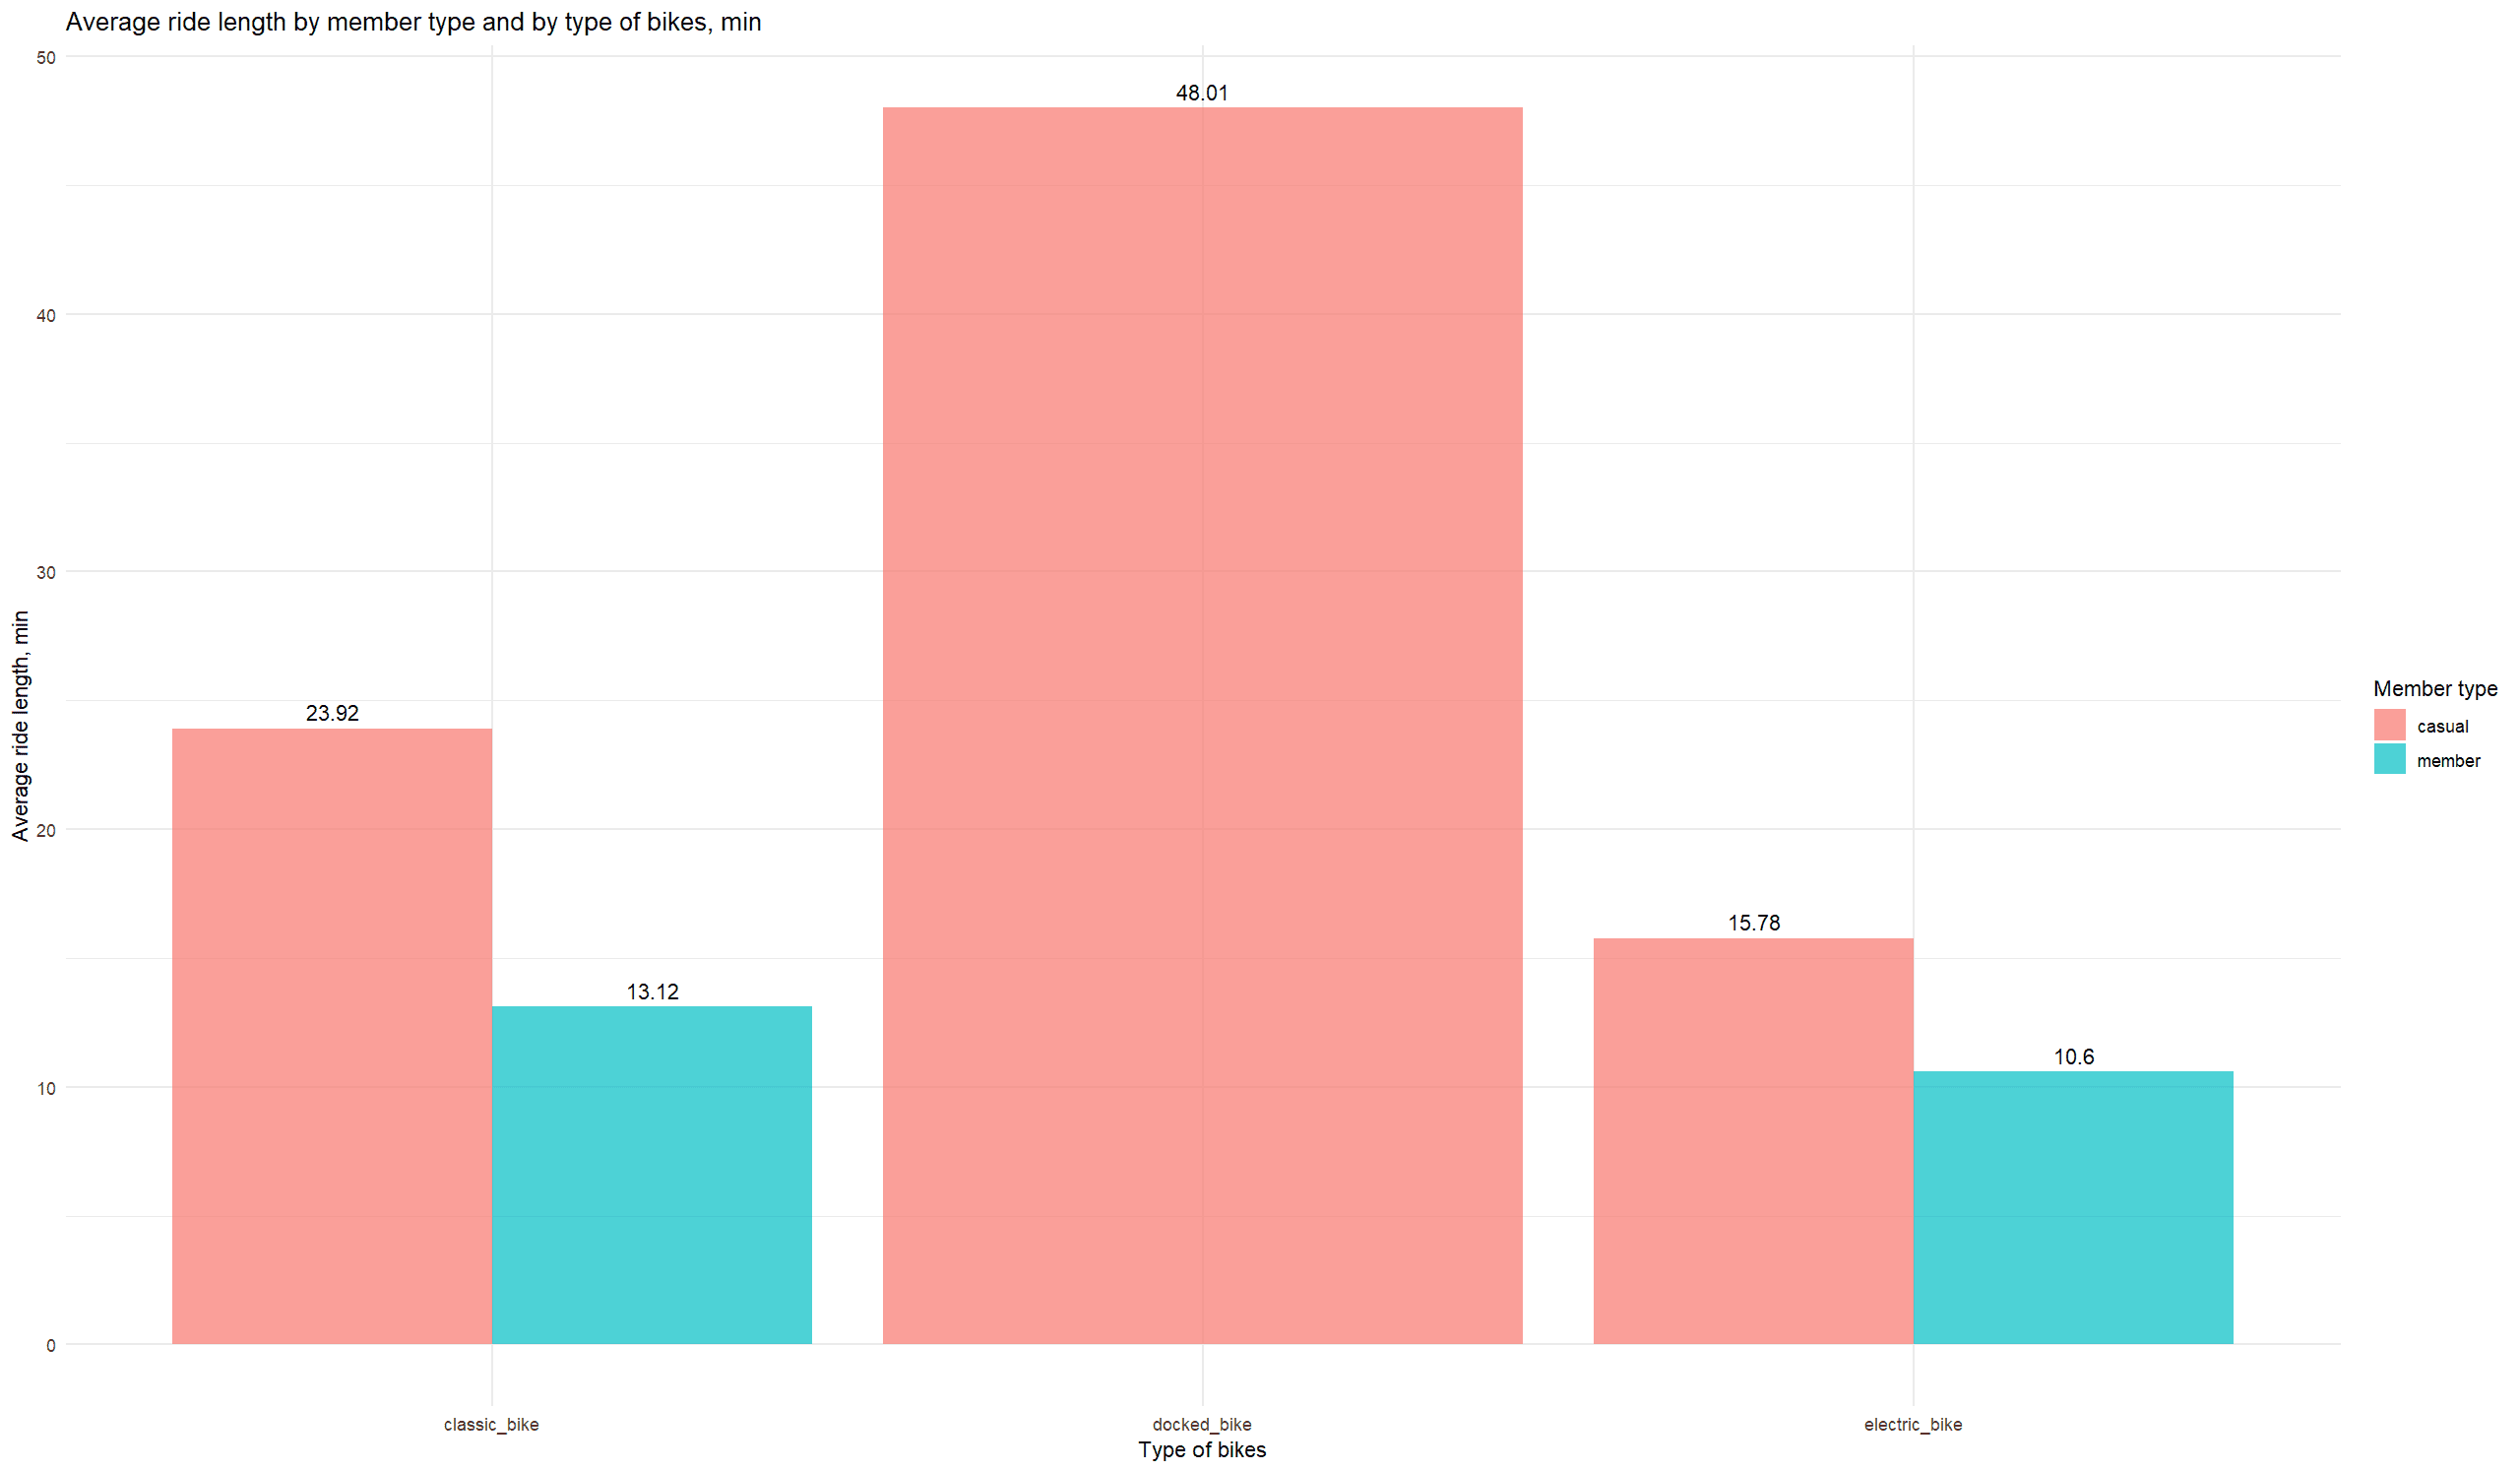

**Breakdown by hours (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)**

In [ ]:
# Number of rides per day by hours:
cyclistic_df %>%
  count(hour) %>% 
  print(n = 24) # lets you view the entire tibble: 24 hours a day

In [ ]:
# Visualization of Number of rides per day by hours:
custom_labels <- function(x) {unit_format(unit = "K", scale = 1e-3)(x)}
cyclistic_df %>% 
  group_by(hour) %>% 
  summarise(count_ride = n()) %>%
  ggplot(mapping = aes(x = hour, y = count_ride, fill = factor(hour))) + 
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +
  geom_text(aes(label = comma(count_ride), vjust = -0.5)) +  # Use comma() to add thousand separators
  labs(title = "Number of rides per day by hours", x = "Hour of day", y = "Number of rides", fill = 'Hour of day') +
  scale_x_continuous(breaks = seq(0, 23, by = 1)) + # Set breaks on x axis from 0 to 23
  theme_minimal() +
  theme(legend.position = "none") +  # Removing the legend
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 460000, by = 50000), limits = c(0, 470000))  # Formatting y-axis labels and limits

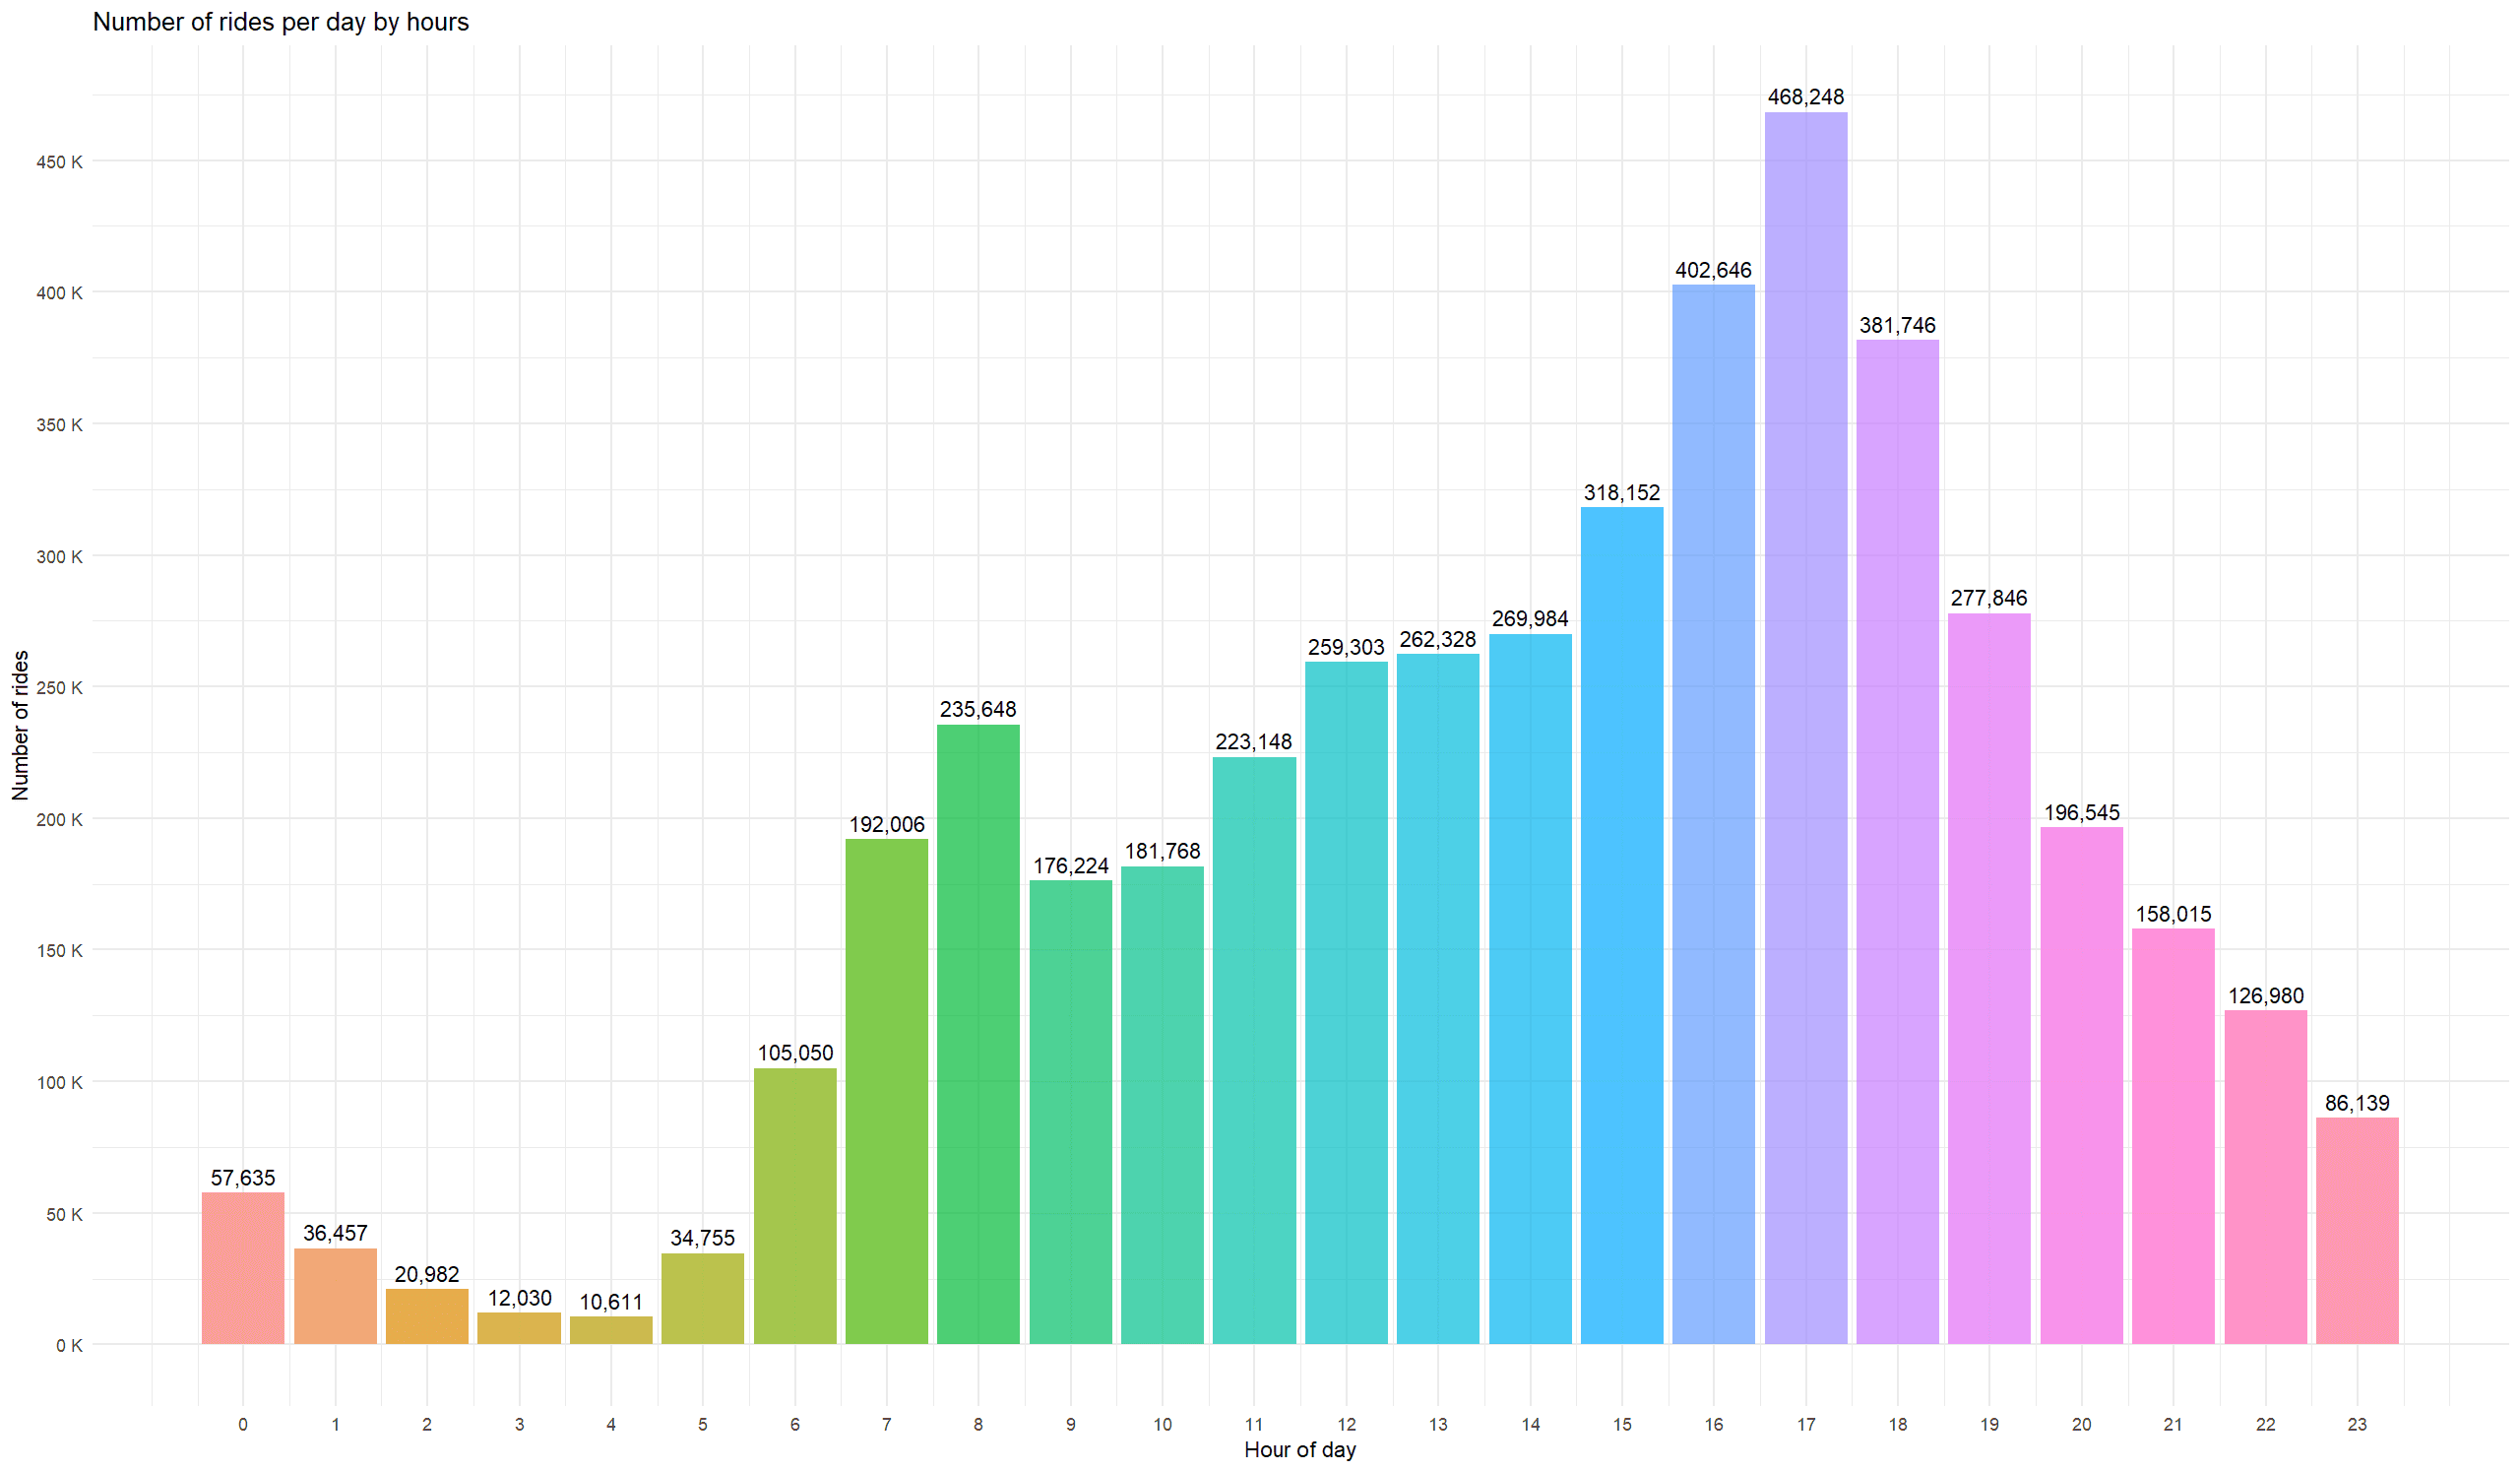

In [ ]:
# Average ride length by hours:
cyclistic_df %>%
  group_by(hour) %>% 
  summarise_at(vars(ride_length), list(~round(mean(ride_length), 2))) %>% 
  print(n = 24) # lets you view the entire tibble: 24 hours a day

In [ ]:
# Visualization of Average ride length by hours:
cyclistic_df %>% 
  group_by(hour) %>%
  summarize(average_ride_length = round(mean(ride_length), 2)) %>%
  ggplot(aes(x = hour, y = average_ride_length, fill = factor(average_ride_length))) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) + 
  geom_text(aes(label = average_ride_length, vjust = -0.5)) +
  labs(title = "Average ride length by hours, min", x = "Hour of day", y = "Average ride length, min") +
  scale_x_continuous(breaks = seq(0, 23, by = 1)) +  # Set breaks on x axis from 0 to 23
  theme_minimal() +
  theme(legend.position = "none")  # Removing the legend

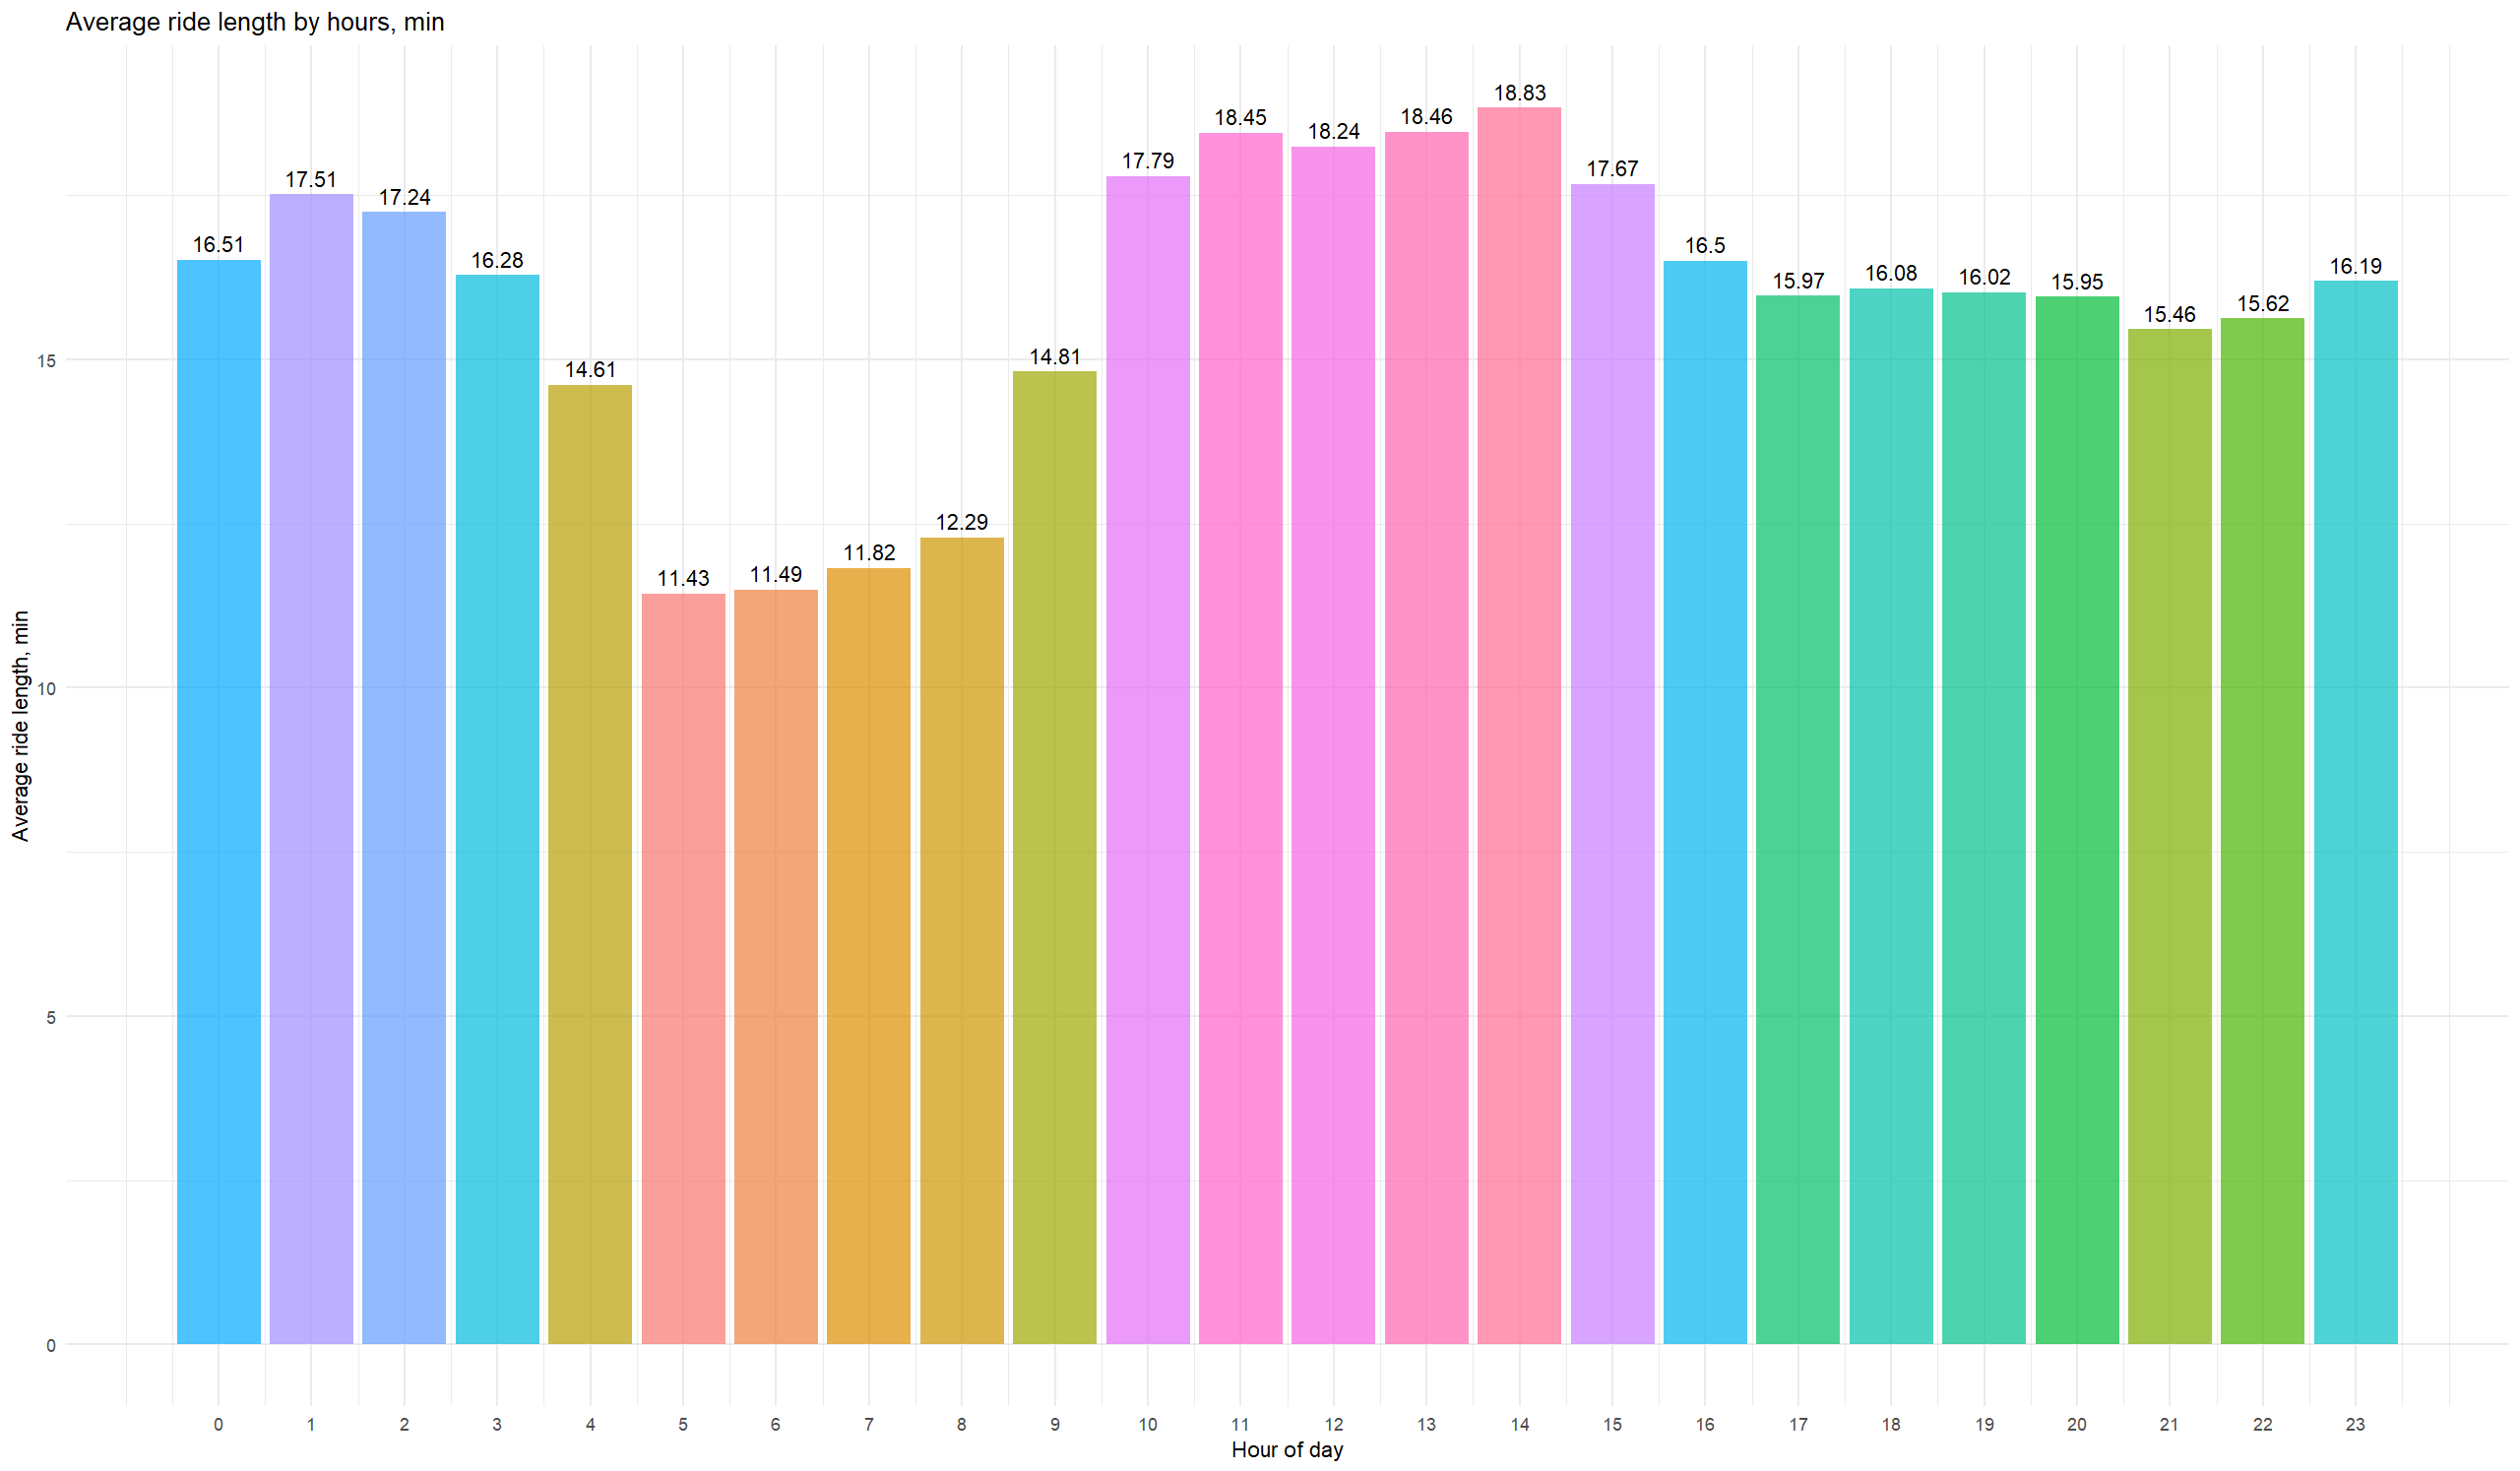

In [ ]:
# Number of rides per day by hours and by member type:
cyclistic_df %>%
  group_by(hour, member_casual) %>% 
  count(hour) %>% 
  print(n = 48) # lets you view the entire tibble: 48 = 24 hours per day * 2 (number of member types)

In [ ]:
# Visualization of Number of rides per day by hours and by member type:
data <- cyclistic_df %>%
  group_by(hour, member_casual) %>% 
  count(hour)
custom_labels <- function(x) {unit_format(unit = "K", scale = 1e-3)(x)}
ggplot(data, aes(x = hour, y = n, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +  # Adding transparency and dodging bars
  geom_text(aes(label = comma(n), vjust = -0.5), position = position_dodge(width = 0.9)) +  # Adding comma formatting and adjusting position
  labs(title = "Number of rides per day by hours and by member type", x = "Hour of day", y = "Number of rides", fill = "Member type") +
  scale_x_continuous(breaks = seq(0, 23, by = 1)) +  # Set breaks on x axis from 0 to 23
  scale_y_continuous(labels = comma, limits = c(0, max(data$n) + 5000)) +  # Adding comma formatting and controlling y-axis limits
  theme_minimal() +
  theme(legend.position = "right") +  # Moving the legend to the right
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 300000, by = 50000), limits = c(0, 300000))  # Formatting y-axis labels and limits

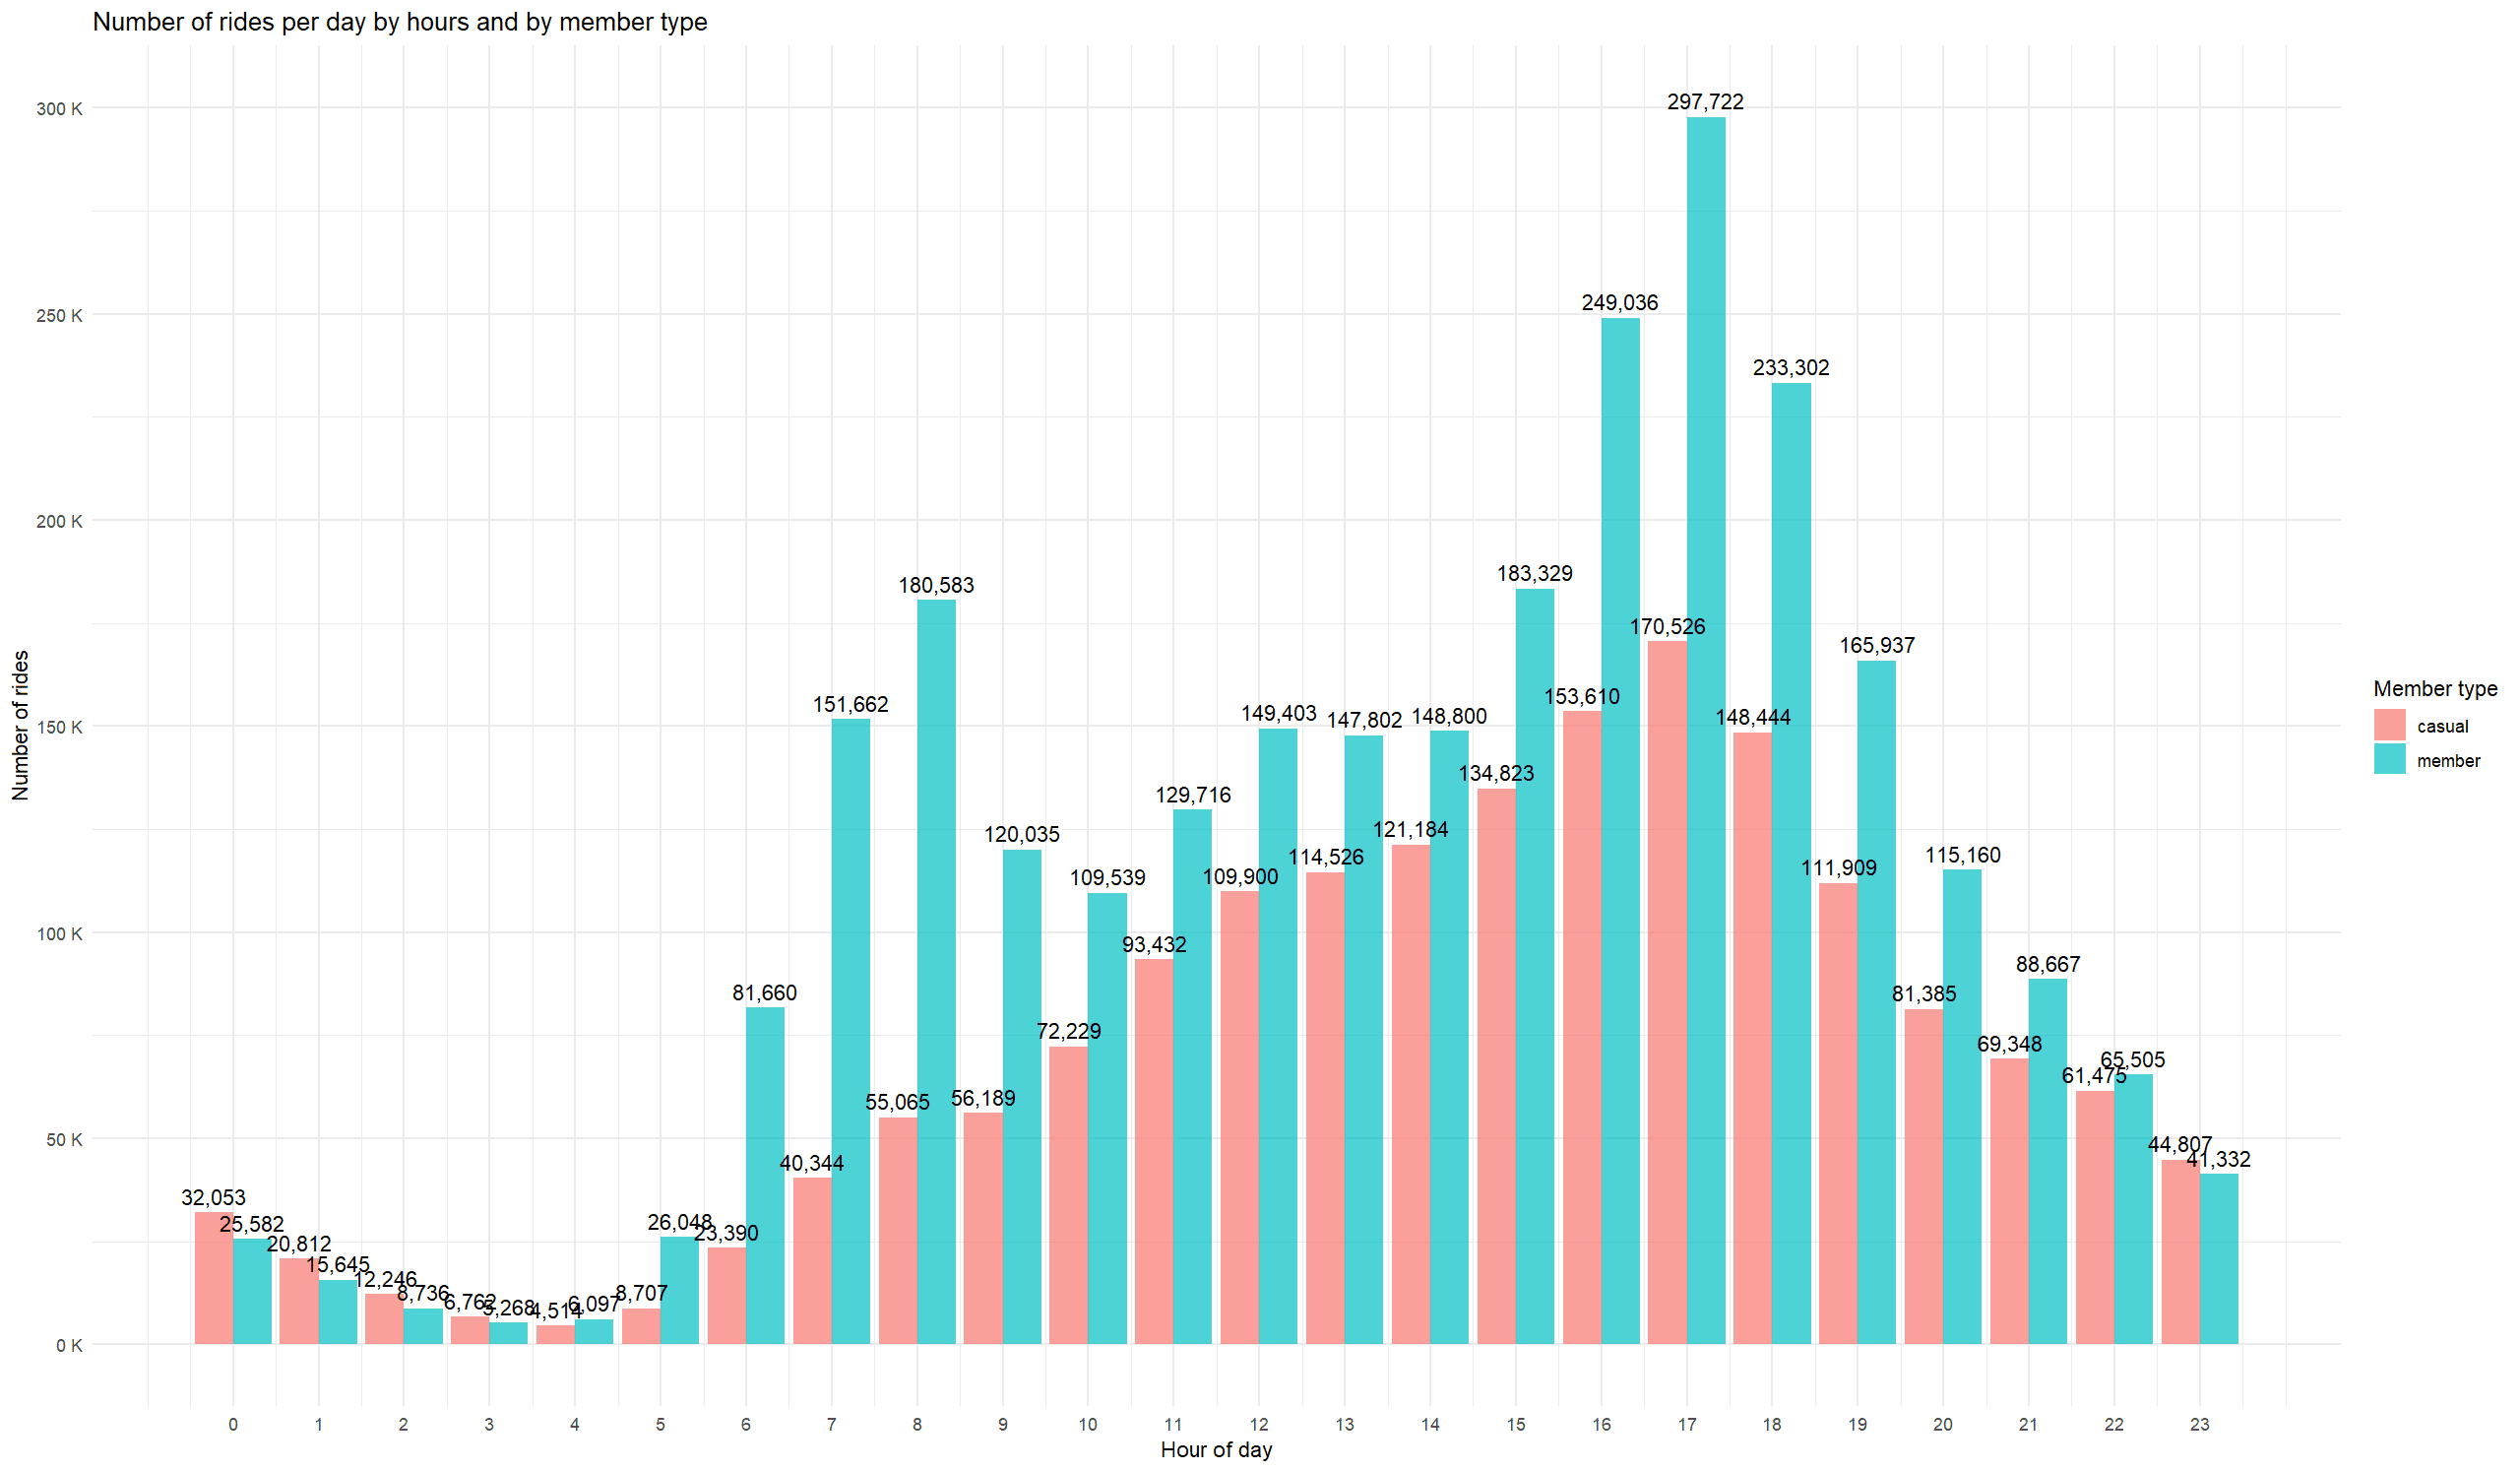

In [ ]:
# Average ride length by hours and by member type:
cyclistic_df %>%
  group_by(hour, member_casual) %>% 
  summarise_at(vars(ride_length), list(~round(mean(ride_length), 2))) %>% 
  print(n = 48) # lets you view the entire tibble: 48 = 24 hours per day * 2 (number of member types)

In [ ]:
# Visualization of Average ride length by hours and by member type:
cyclistic_df %>% 
  group_by(hour, member_casual) %>%
  summarize(average_ride_length = round(mean(ride_length), 2)) %>%
  ggplot(aes(x = hour, y = average_ride_length, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) + 
  geom_text(aes(label = average_ride_length, vjust = -0.5), position = position_dodge(width = 0.9)) +
  labs(title = "Average ride length by hours and by member type, min", x = "Hour of day", y = "Average ride length, min", fill = 'Member type') +
  scale_x_continuous(breaks = seq(0, 23, by = 1)) + # Set breaks on x axis from 0 to 23
  theme_minimal()

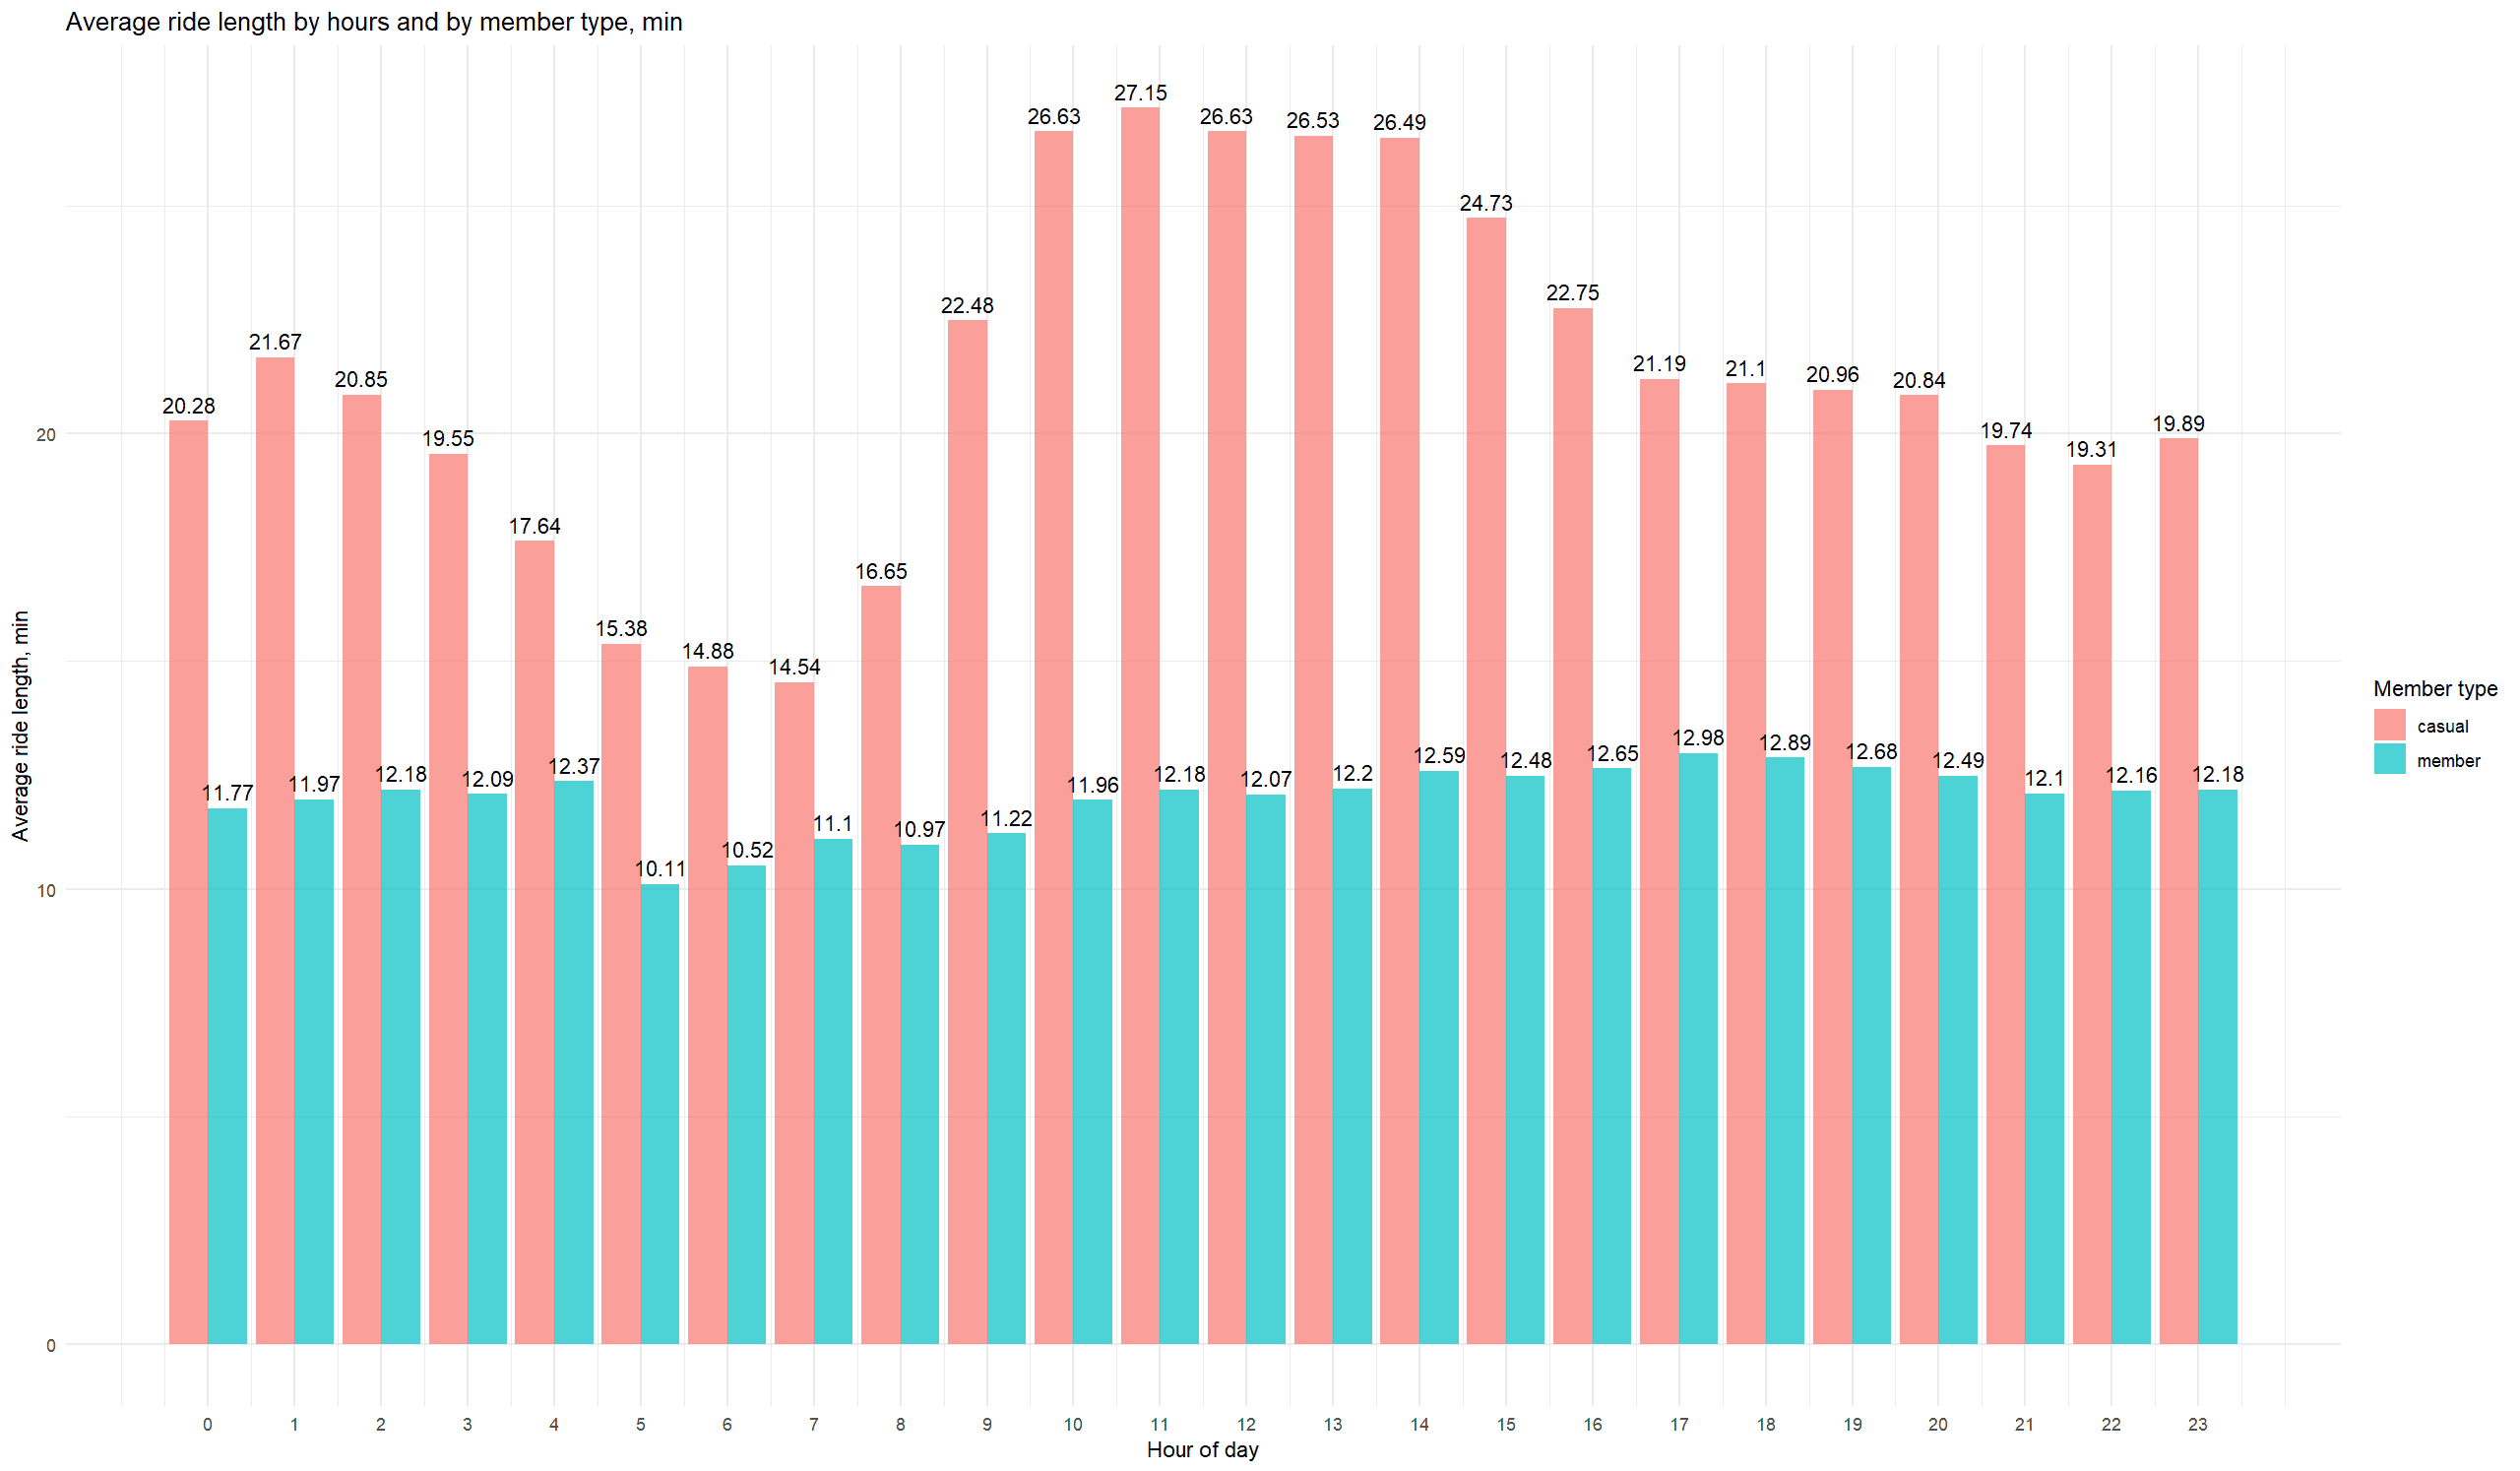

**Breakdown by time of day: night, morning, afternoon, evening**

In [ ]:
# Number of rides by time of day:
cyclistic_df %>%
  group_by(time_of_day) %>% 
  count(time_of_day)

In [ ]:
# Visualization of Number of rides by time of day:
time_order <- c("Night", "Morning", "Afternoon", "Evening")
custom_labels <- function(x) {unit_format(unit = "M", scale = 1e-6)(x)}
cyclistic_df %>% 
  group_by(time_of_day) %>%
  summarise(count_ride = n()) %>%
  ggplot(mapping = aes(x = factor(time_of_day, levels = time_order), y = count_ride, fill = time_of_day)) + 
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +
  geom_text(aes(label = comma(count_ride), vjust = -0.5)) +
  labs(title = "Number of rides by time of day", x = "Time of day", y = "Number of rides", fill = 'Time of day') +
  theme_minimal() +
  theme(legend.position = "none") +  # Removing the legend
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 2000000, by = 500000), limits = c(0, 2000000))  # Formatting y-axis labels and limits

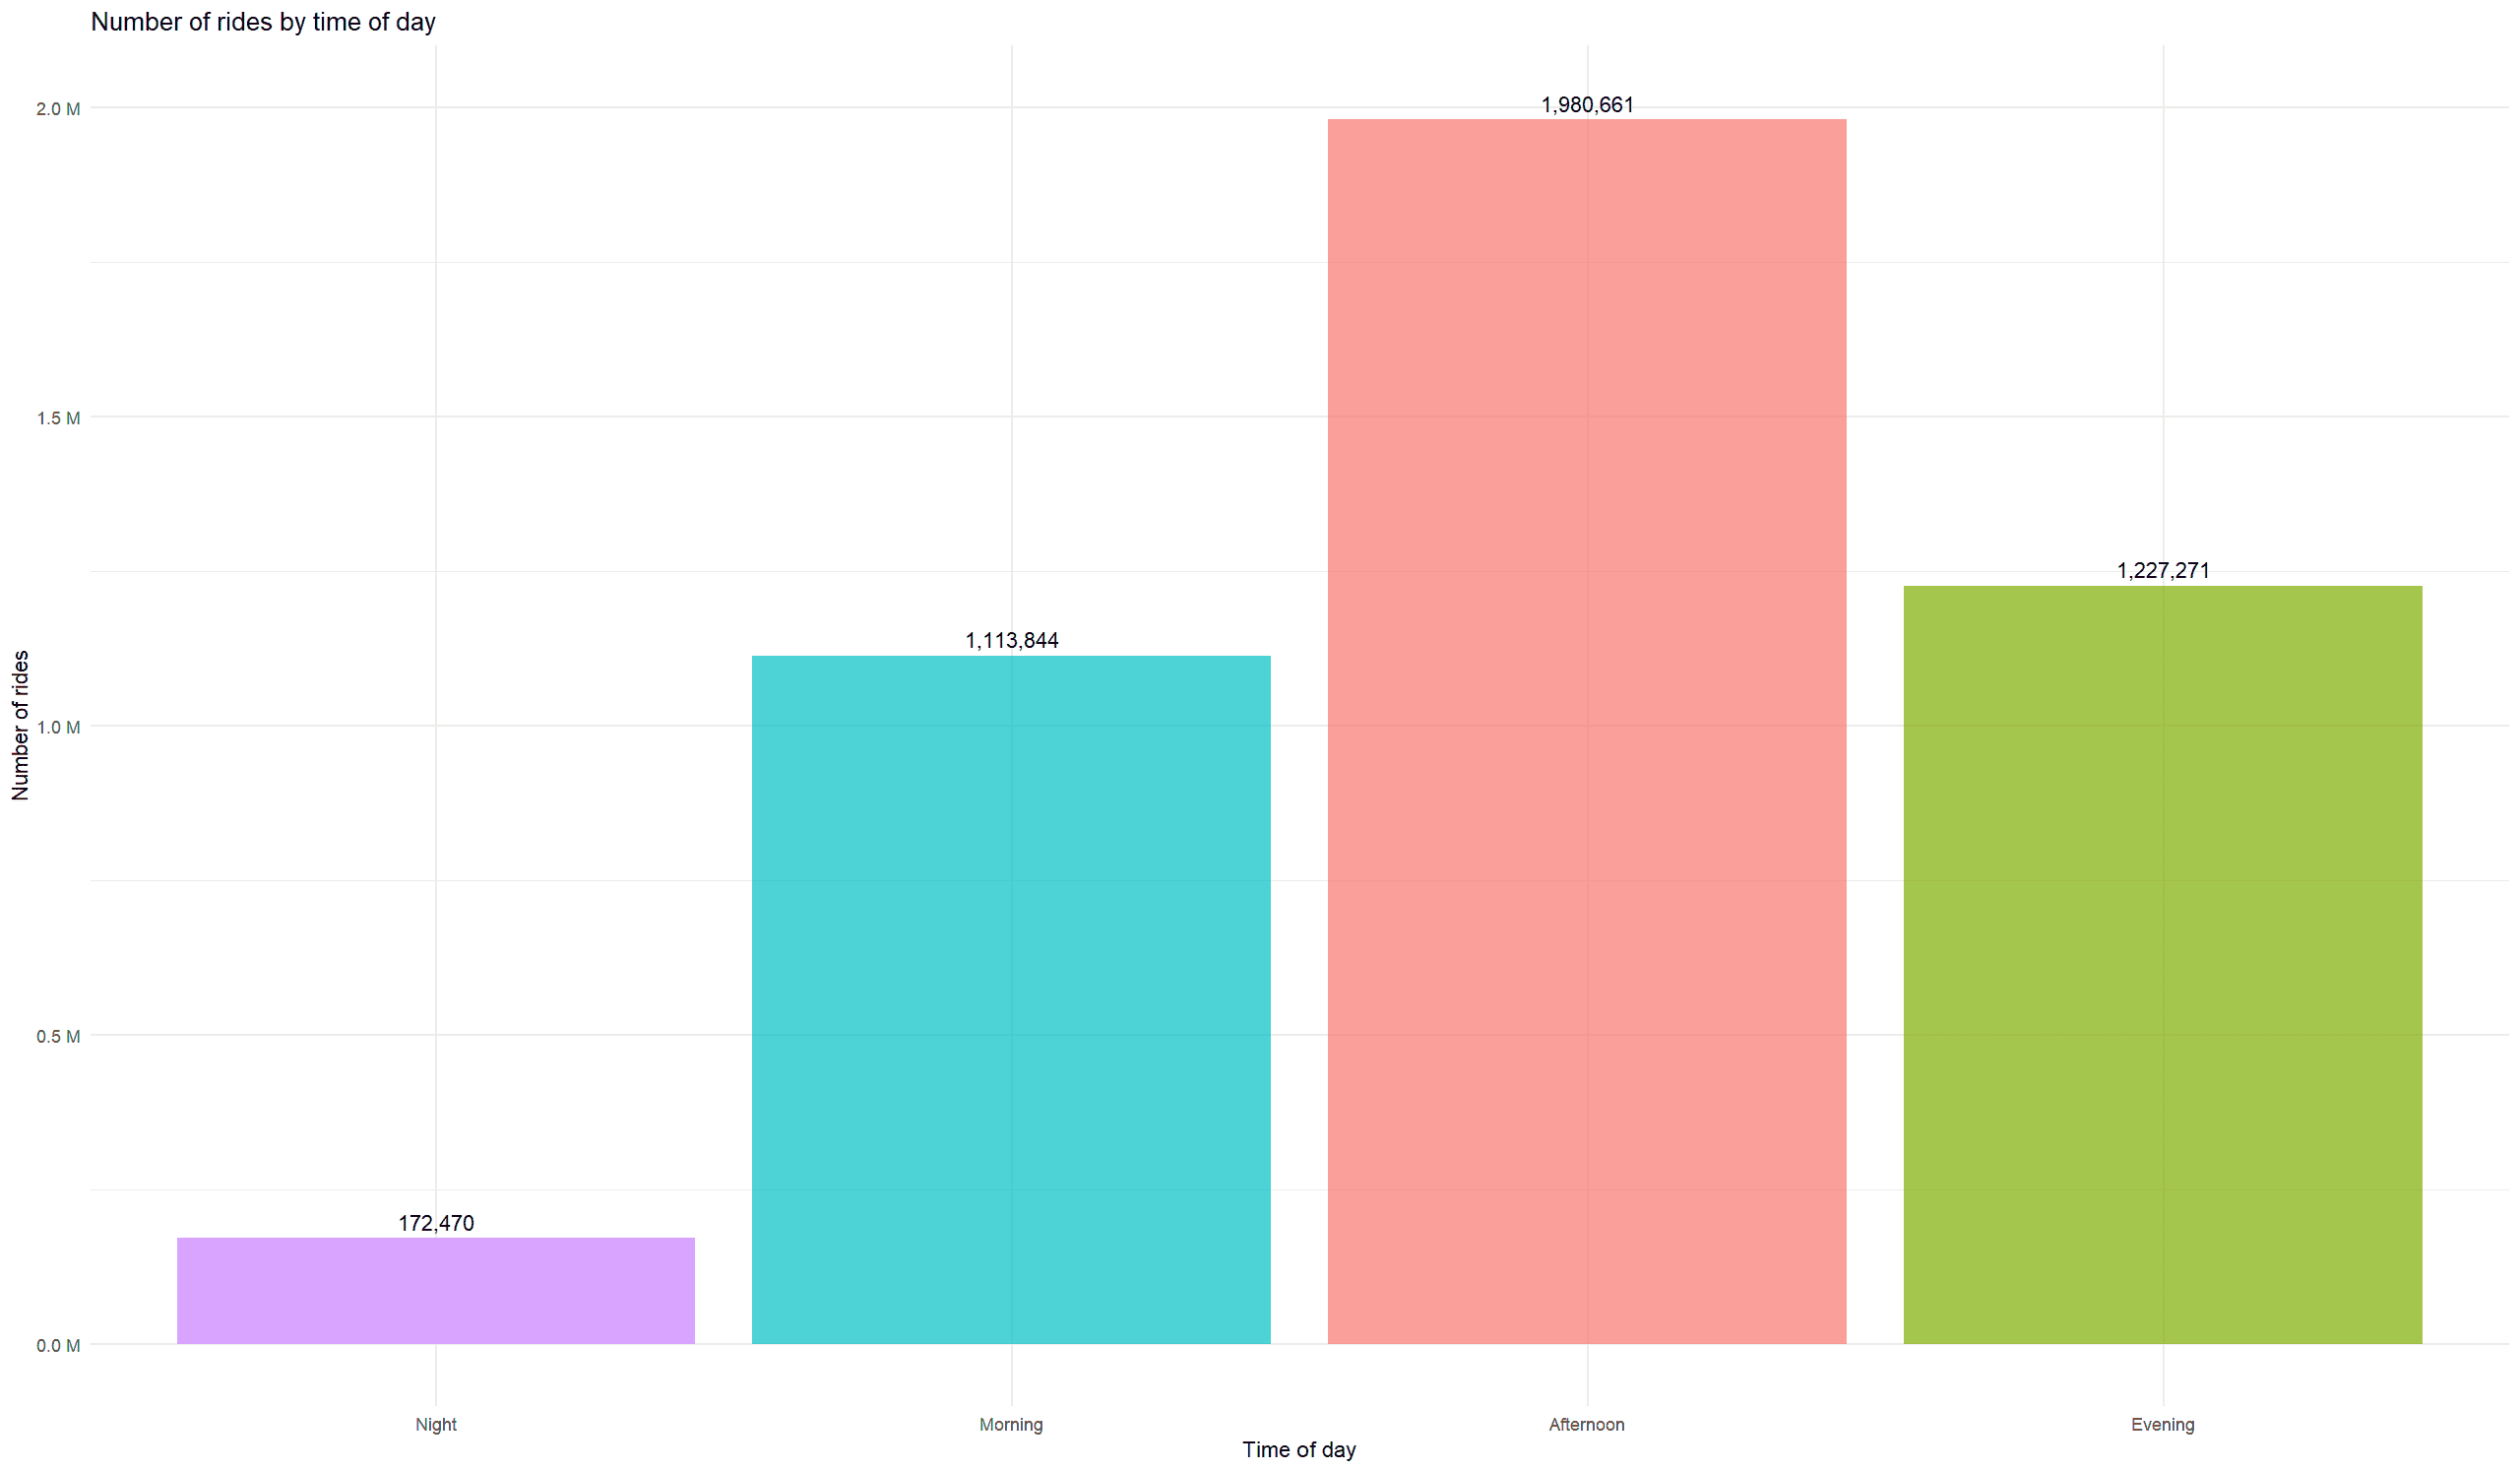

In [ ]:
# Average ride length by time of day:
cyclistic_df %>% 
  group_by(time_of_day) %>% 
  summarise_at(vars(ride_length), list(~round(mean(ride_length), 2)))

In [ ]:
# Visualization of Average ride length by time of day:
time_order <- c("Night", "Morning", "Afternoon", "Evening")
cyclistic_df %>% 
  group_by(time_of_day) %>%
  summarize(average_ride_length = round(mean(ride_length), 2)) %>%
  ggplot(aes(x = factor(time_of_day, levels = time_order), y = average_ride_length, fill = time_of_day)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) + 
  geom_text(aes(label = average_ride_length, vjust = -0.5)) +
  labs(title = "Average ride length by time of day, min", x = "Time of day", y = "Average ride length, min", fill = 'Time of day') +
  theme_minimal() +
  theme(legend.position = "none")  # Removing the legend

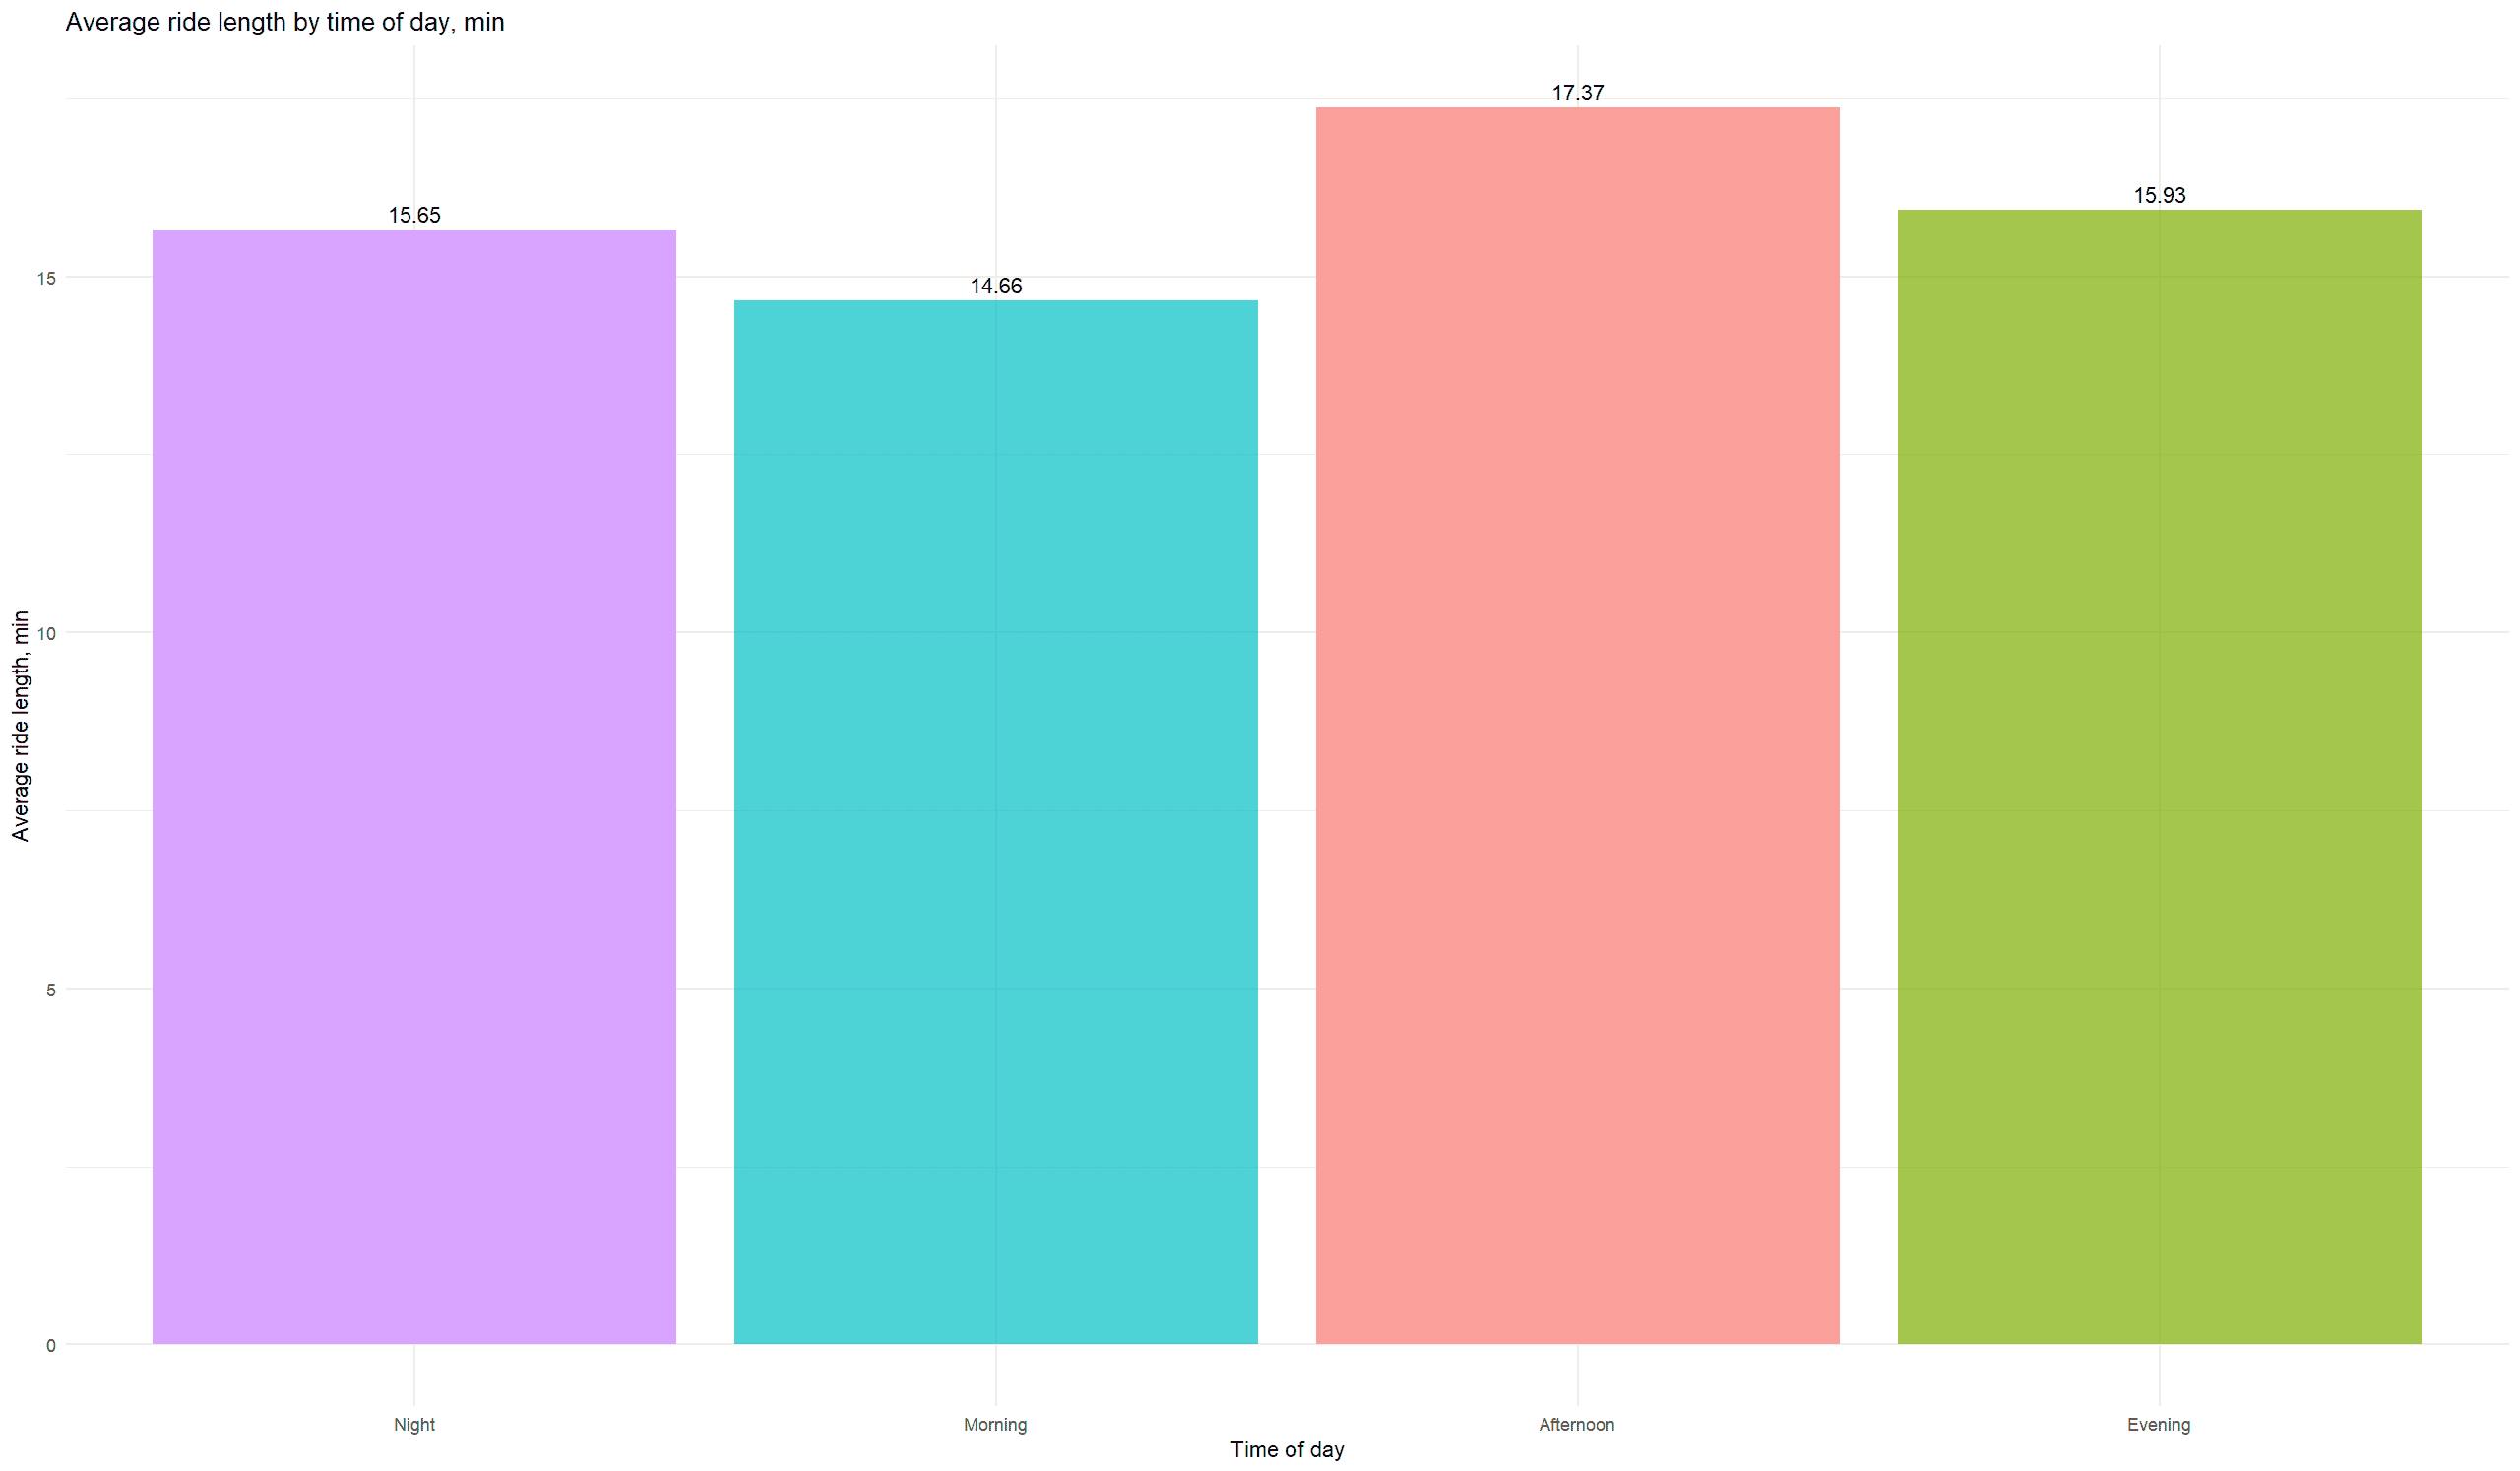

In [ ]:
# Number of rides by time of day and by member type:
cyclistic_df %>%
  group_by(time_of_day, member_casual) %>% 
  count(time_of_day)

In [ ]:
# Visualization of Number of rides by time of day and by member type:
data <- cyclistic_df %>%
  group_by(time_of_day, member_casual) %>% 
  count(time_of_day)
time_order <- c("Night", "Morning", "Afternoon", "Evening")
custom_labels <- function(x) {unit_format(unit = "M", scale = 1e-6)(x)}
ggplot(data, aes(x = factor(time_of_day, levels = time_order), y = n, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +  # Adding transparency and dodging bars
  geom_text(aes(label = comma(n), vjust = -0.5), position = position_dodge(width = 0.9)) +  # Adding comma formatting and adjusting position
  labs(title = "Number of rides by time of day and by member type", x = "Time of day", y = "Number of rides", fill = "Member type") +
  theme_minimal() +
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 1200000, by = 250000), limits = c(0, 1200000))  # Formatting y-axis labels and limits

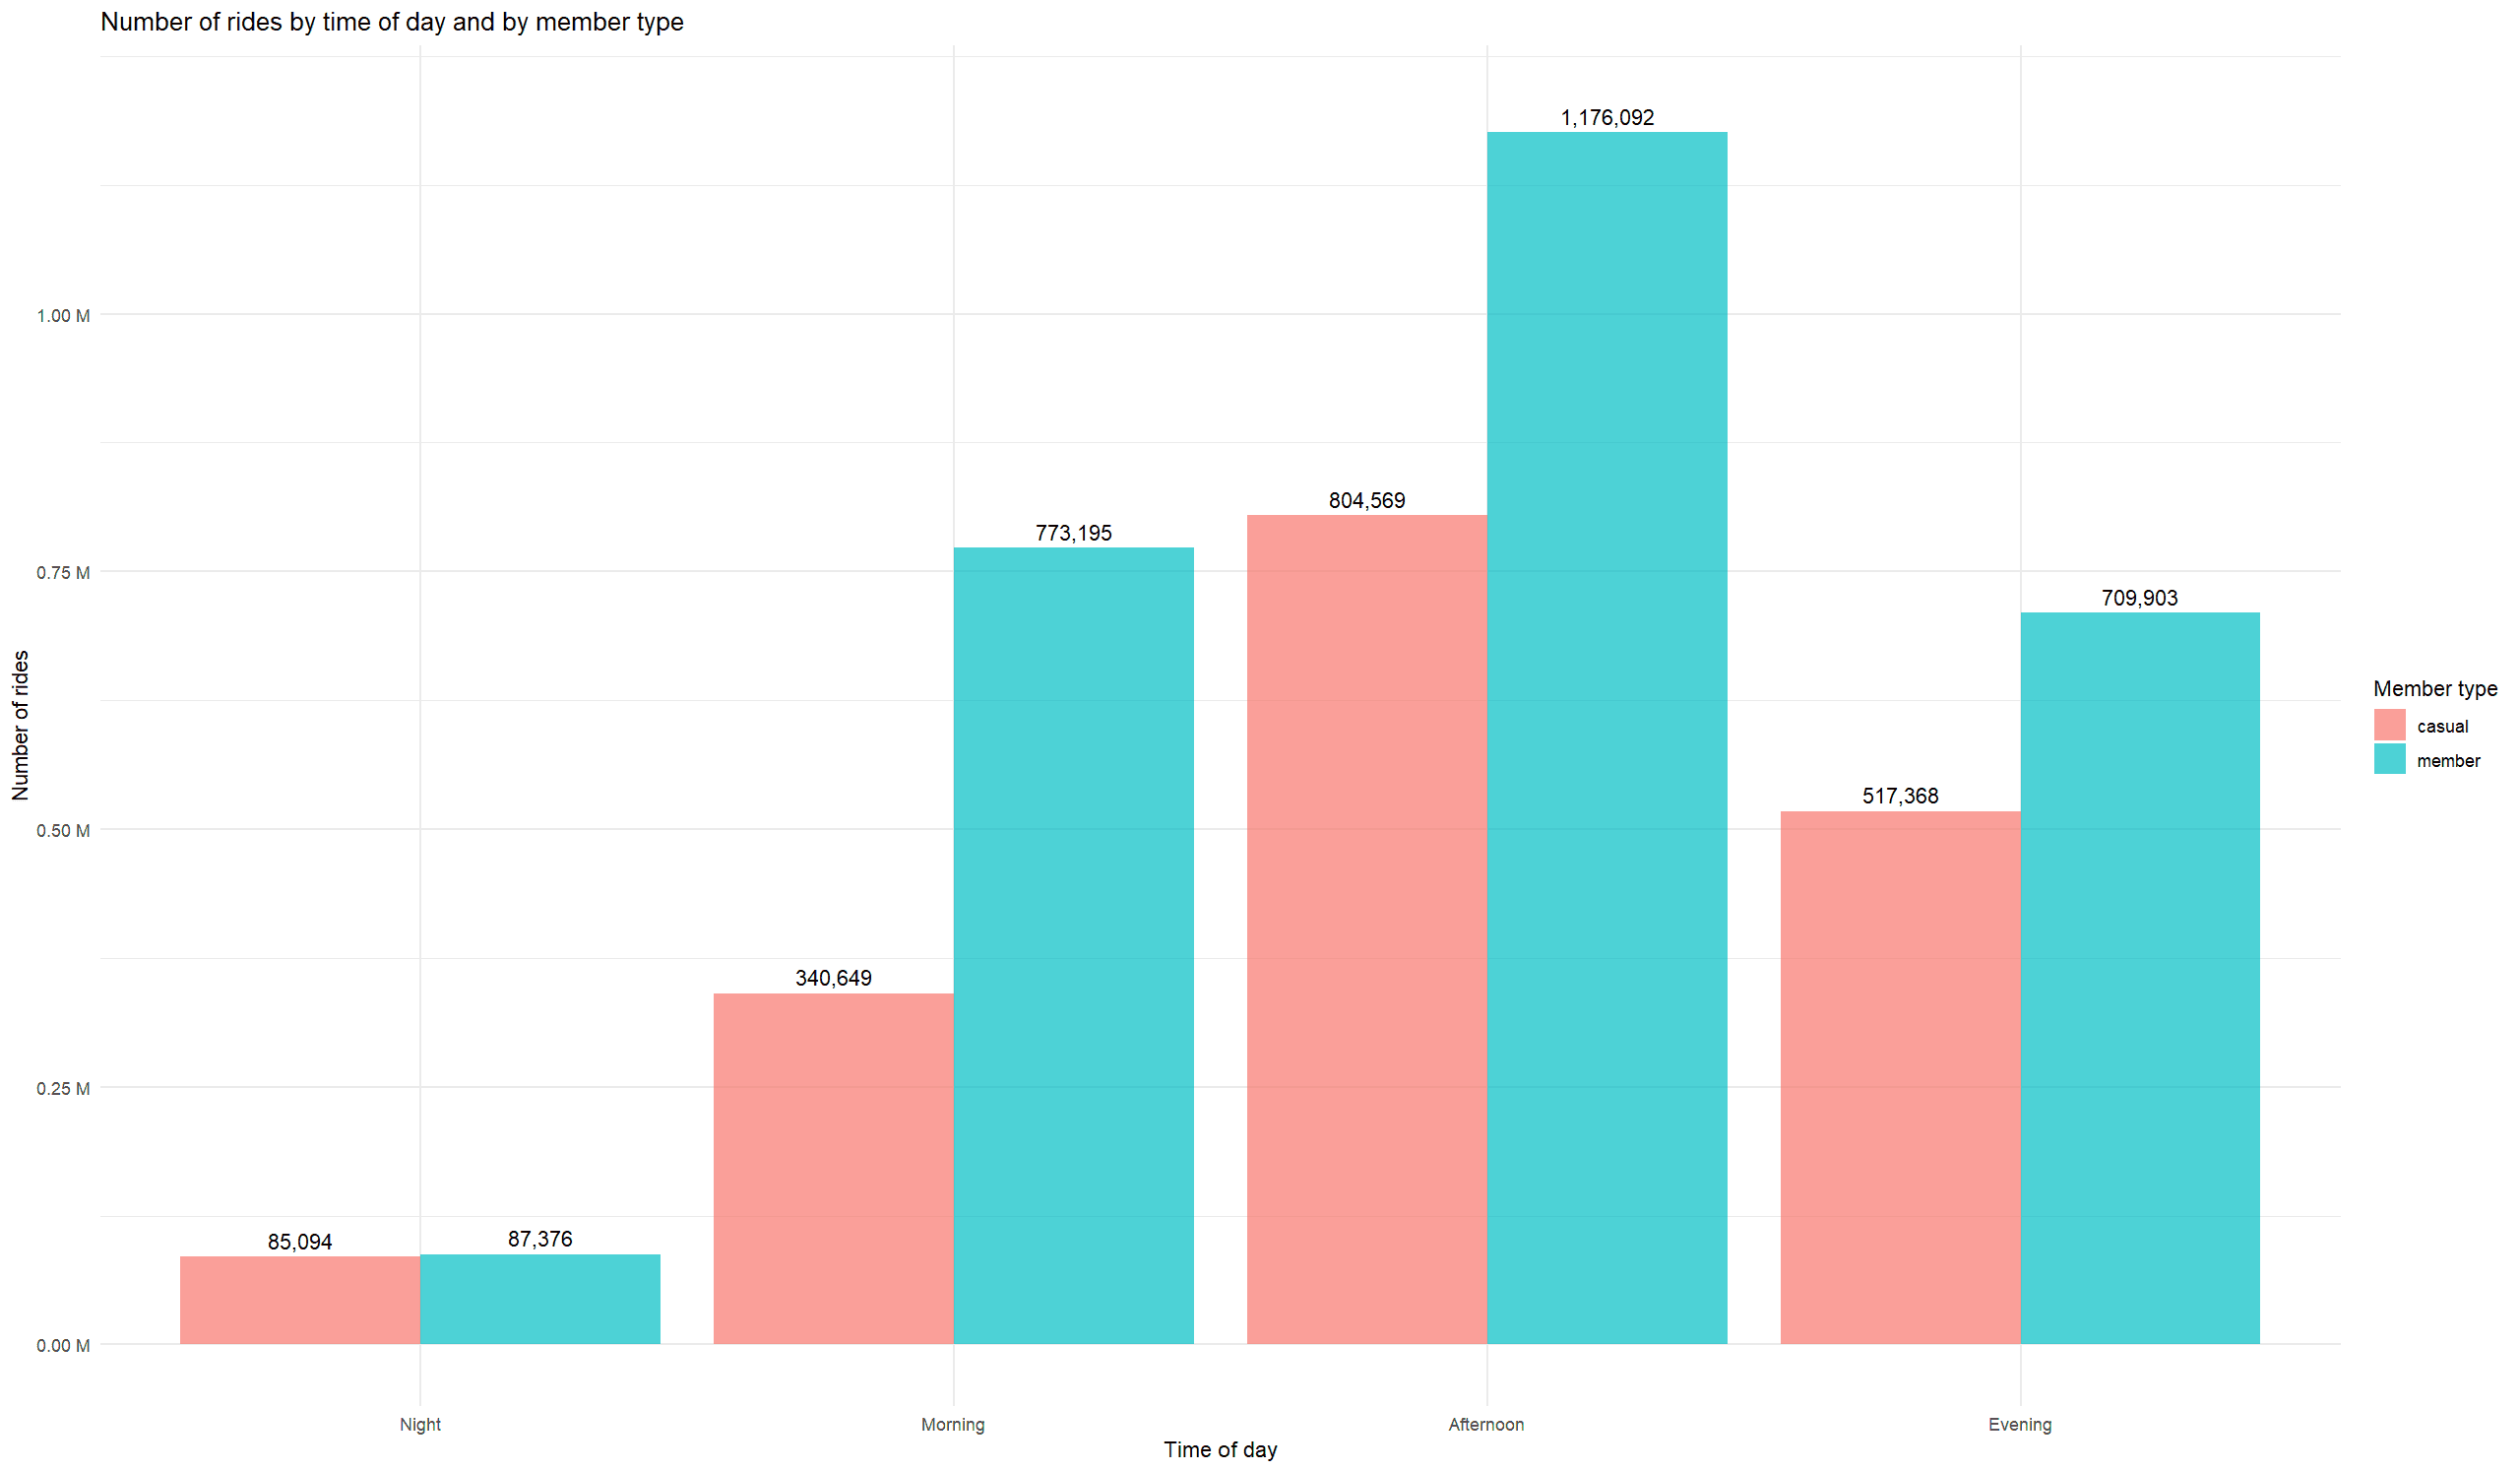

In [ ]:
# Visualization of Hourly use of bikes throughout time of day by member type:
time_order <- c("Night", "Morning", "Afternoon", "Evening")
custom_labels <- function(x) {unit_format(unit = "K", scale = 1e-3)(x)}
ggplot(data = cyclistic_df) +
  aes(x = hour, fill = member_casual) +
  facet_wrap(~factor(time_of_day, levels = time_order), scales = "free_x") +  # Set scales to "free_x"
  geom_bar(alpha = 0.7) +
  labs(title = 'Hourly use of bikes throughout time of day by member type', x = 'Hour', y = 'Number of rides', fill = 'Member type') +
  theme(axis.text = element_text(size = 5)) +
  scale_x_continuous(breaks = seq(0, 23, by = 1)) +  # Set breaks from 0 to 23 with an interval of 1 hour
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 460000, by = 100000), limits = c(0, 460000)) +  # Formatting y-axis labels and limits
  theme_minimal()

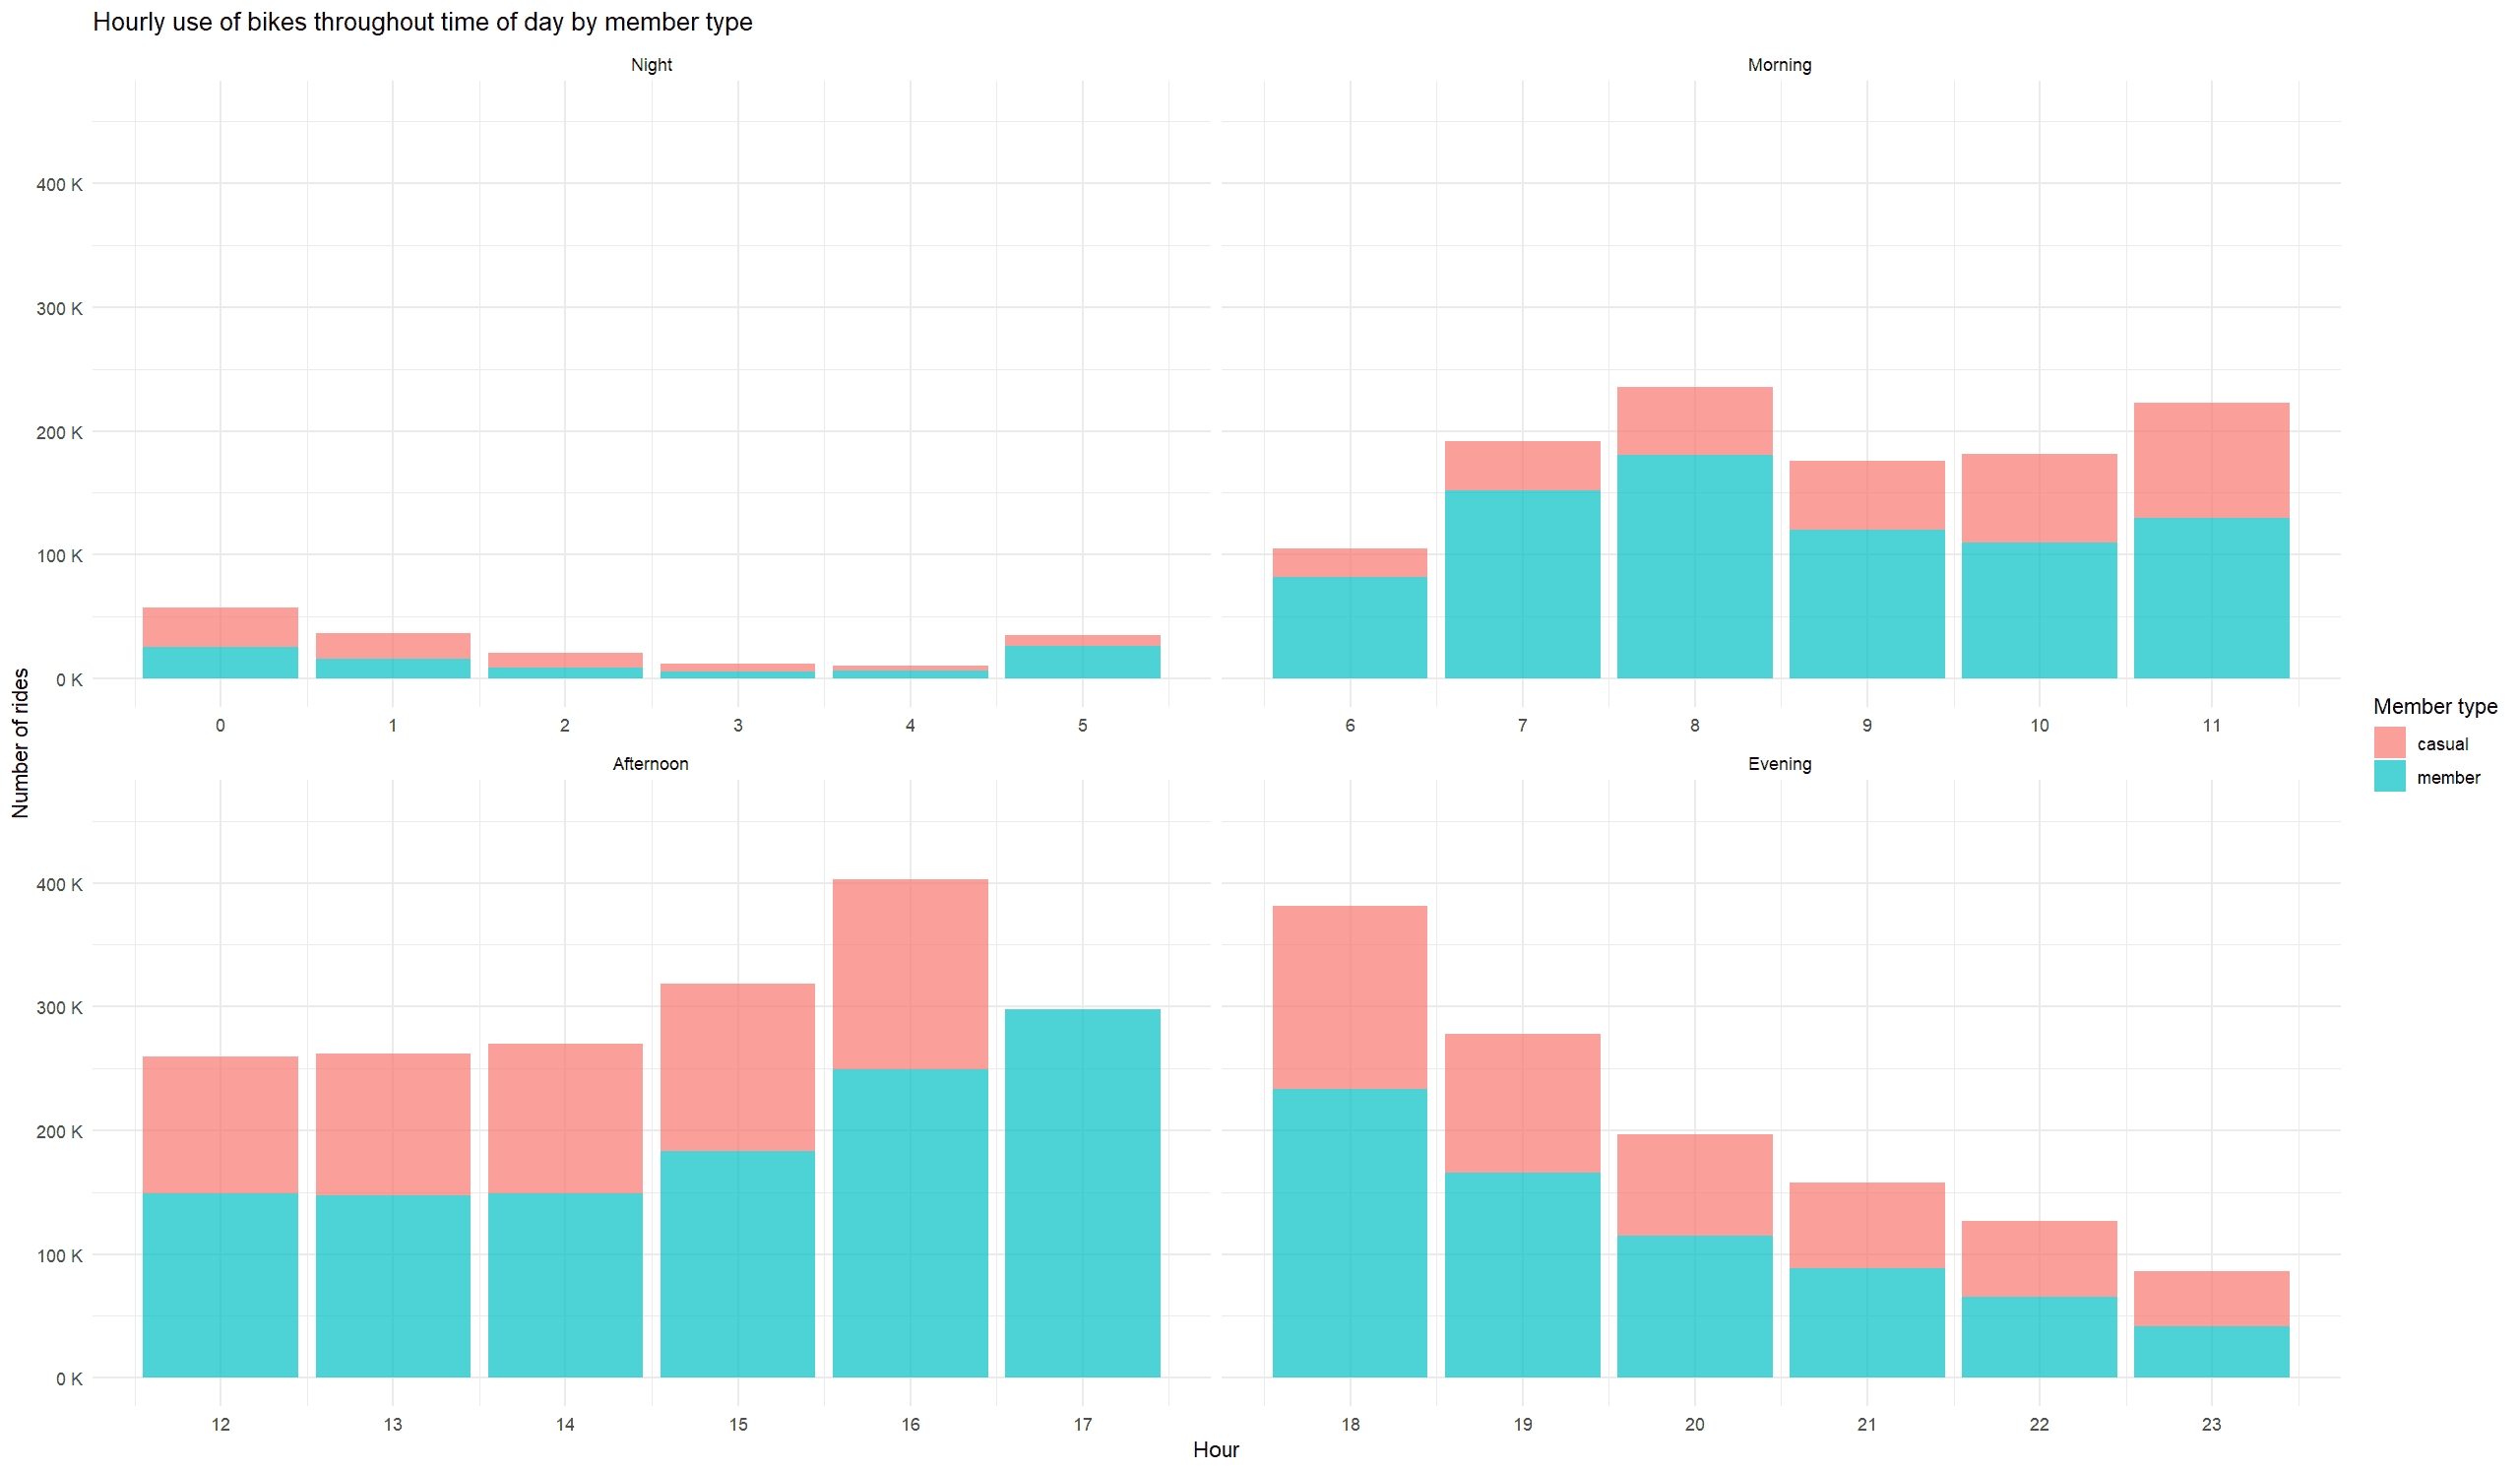

In [ ]:
# Average ride length by time of day and by member type:
cyclistic_df %>% 
  group_by(time_of_day, member_casual) %>% 
  summarise_at(vars(ride_length), list(~round(mean(ride_length), 2)))

In [ ]:
# Visualization of Average ride length by time of day and by member type:
time_order <- c("Night", "Morning", "Afternoon", "Evening")
cyclistic_df %>% 
  group_by(time_of_day, member_casual) %>%
  summarize(average_ride_length = round(mean(ride_length), 2)) %>%
  ggplot(aes(x = factor(time_of_day, levels = time_order), y = average_ride_length, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) + 
  geom_text(aes(label = average_ride_length, vjust = -0.5), position = position_dodge(width = 0.9)) +
  labs(title = "Average ride length by time of day and by member type, min", x = "Time of day", y = "Average ride length, min", fill = 'Member type') +
  theme_minimal()

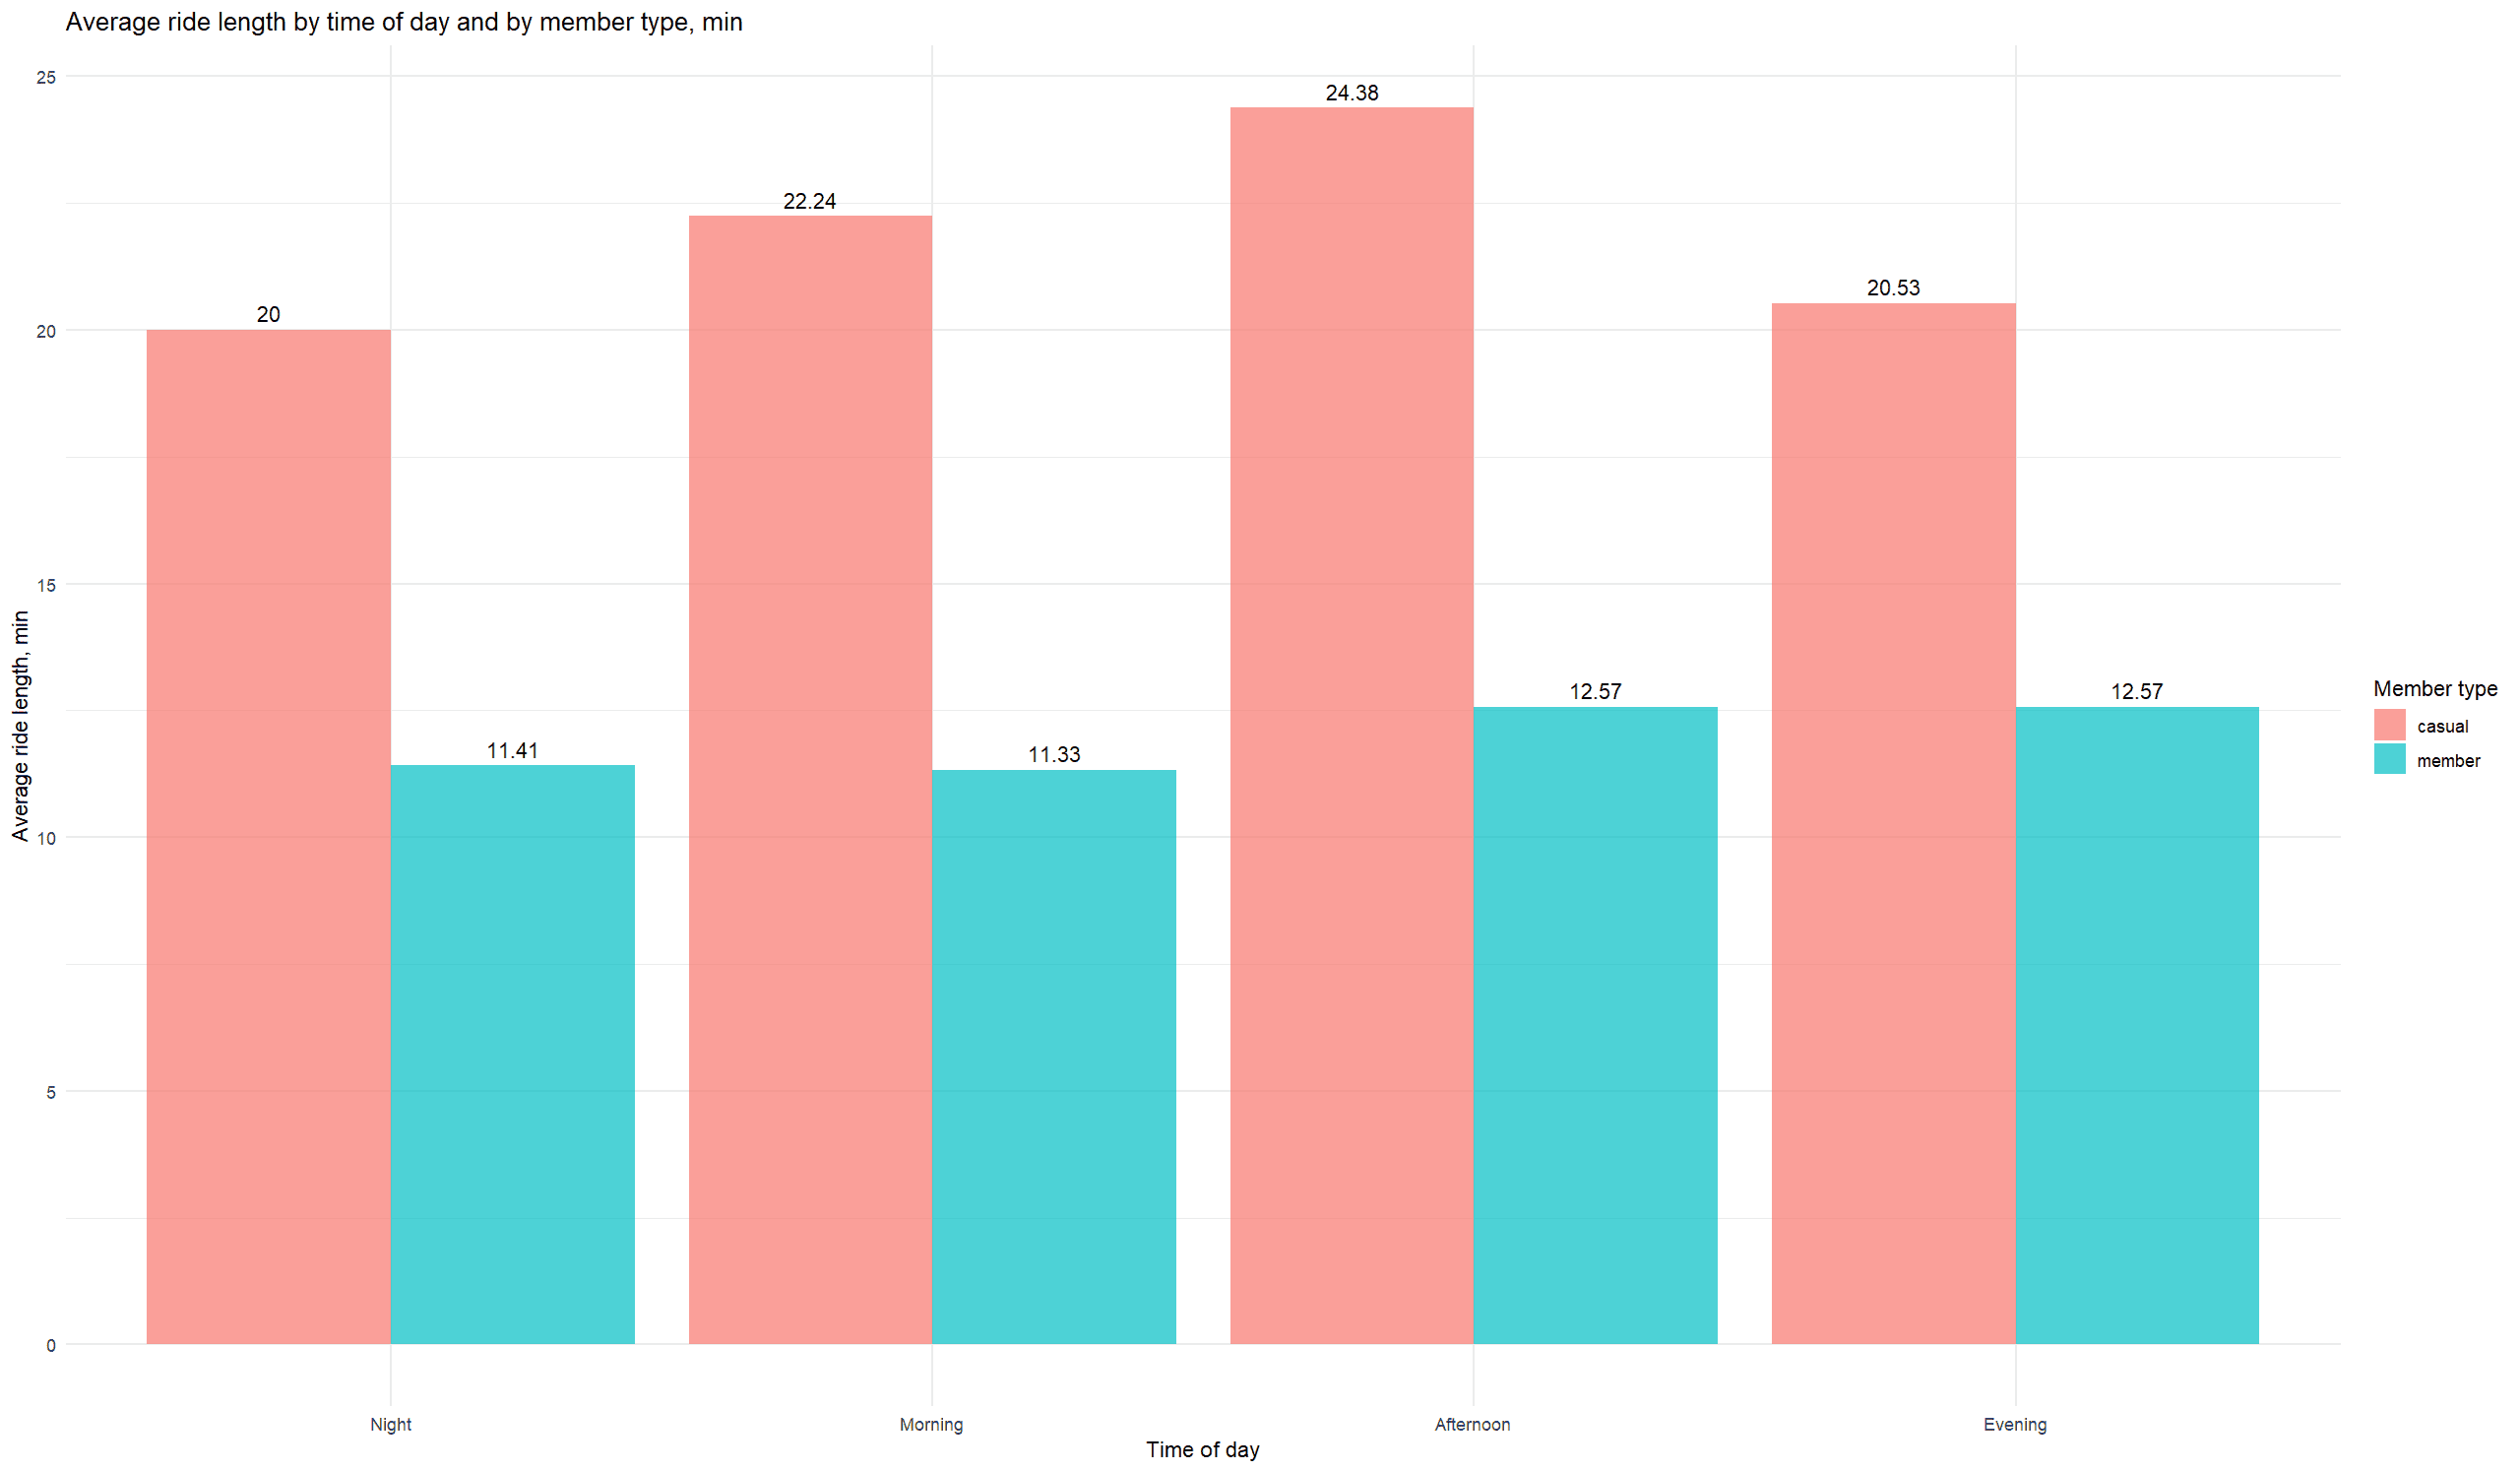

**Breakdown by day of the week (Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday)**

In [ ]:
# Number of rides by day of the week:
cyclistic_df %>%
  count(day_of_week)

In [ ]:
# Visualization of Number of rides by day of the week:
custom_labels <- function(x) {unit_format(unit = "K", scale = 1e-3)(x)}
cyclistic_df %>% 
  group_by(day_of_week) %>%  # Couldn't get the bars out in chronological order
  summarise(count_ride = n()) %>%
  ggplot(mapping = aes(x = day_of_week, y = count_ride, fill = factor(day_of_week))) + 
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +
  geom_text(aes(label = comma(count_ride), vjust = -0.5)) +  # Use comma() to add thousand separators
  labs(title = "Number of rides by day of the week", x = "Day of week", y = "Number of rides") +
  theme_minimal() +
  theme(legend.position = "none") +  # Removing the legend
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 7100000, by = 100000), limits = c(0, 710000))  # Formatting y-axis labels and limits

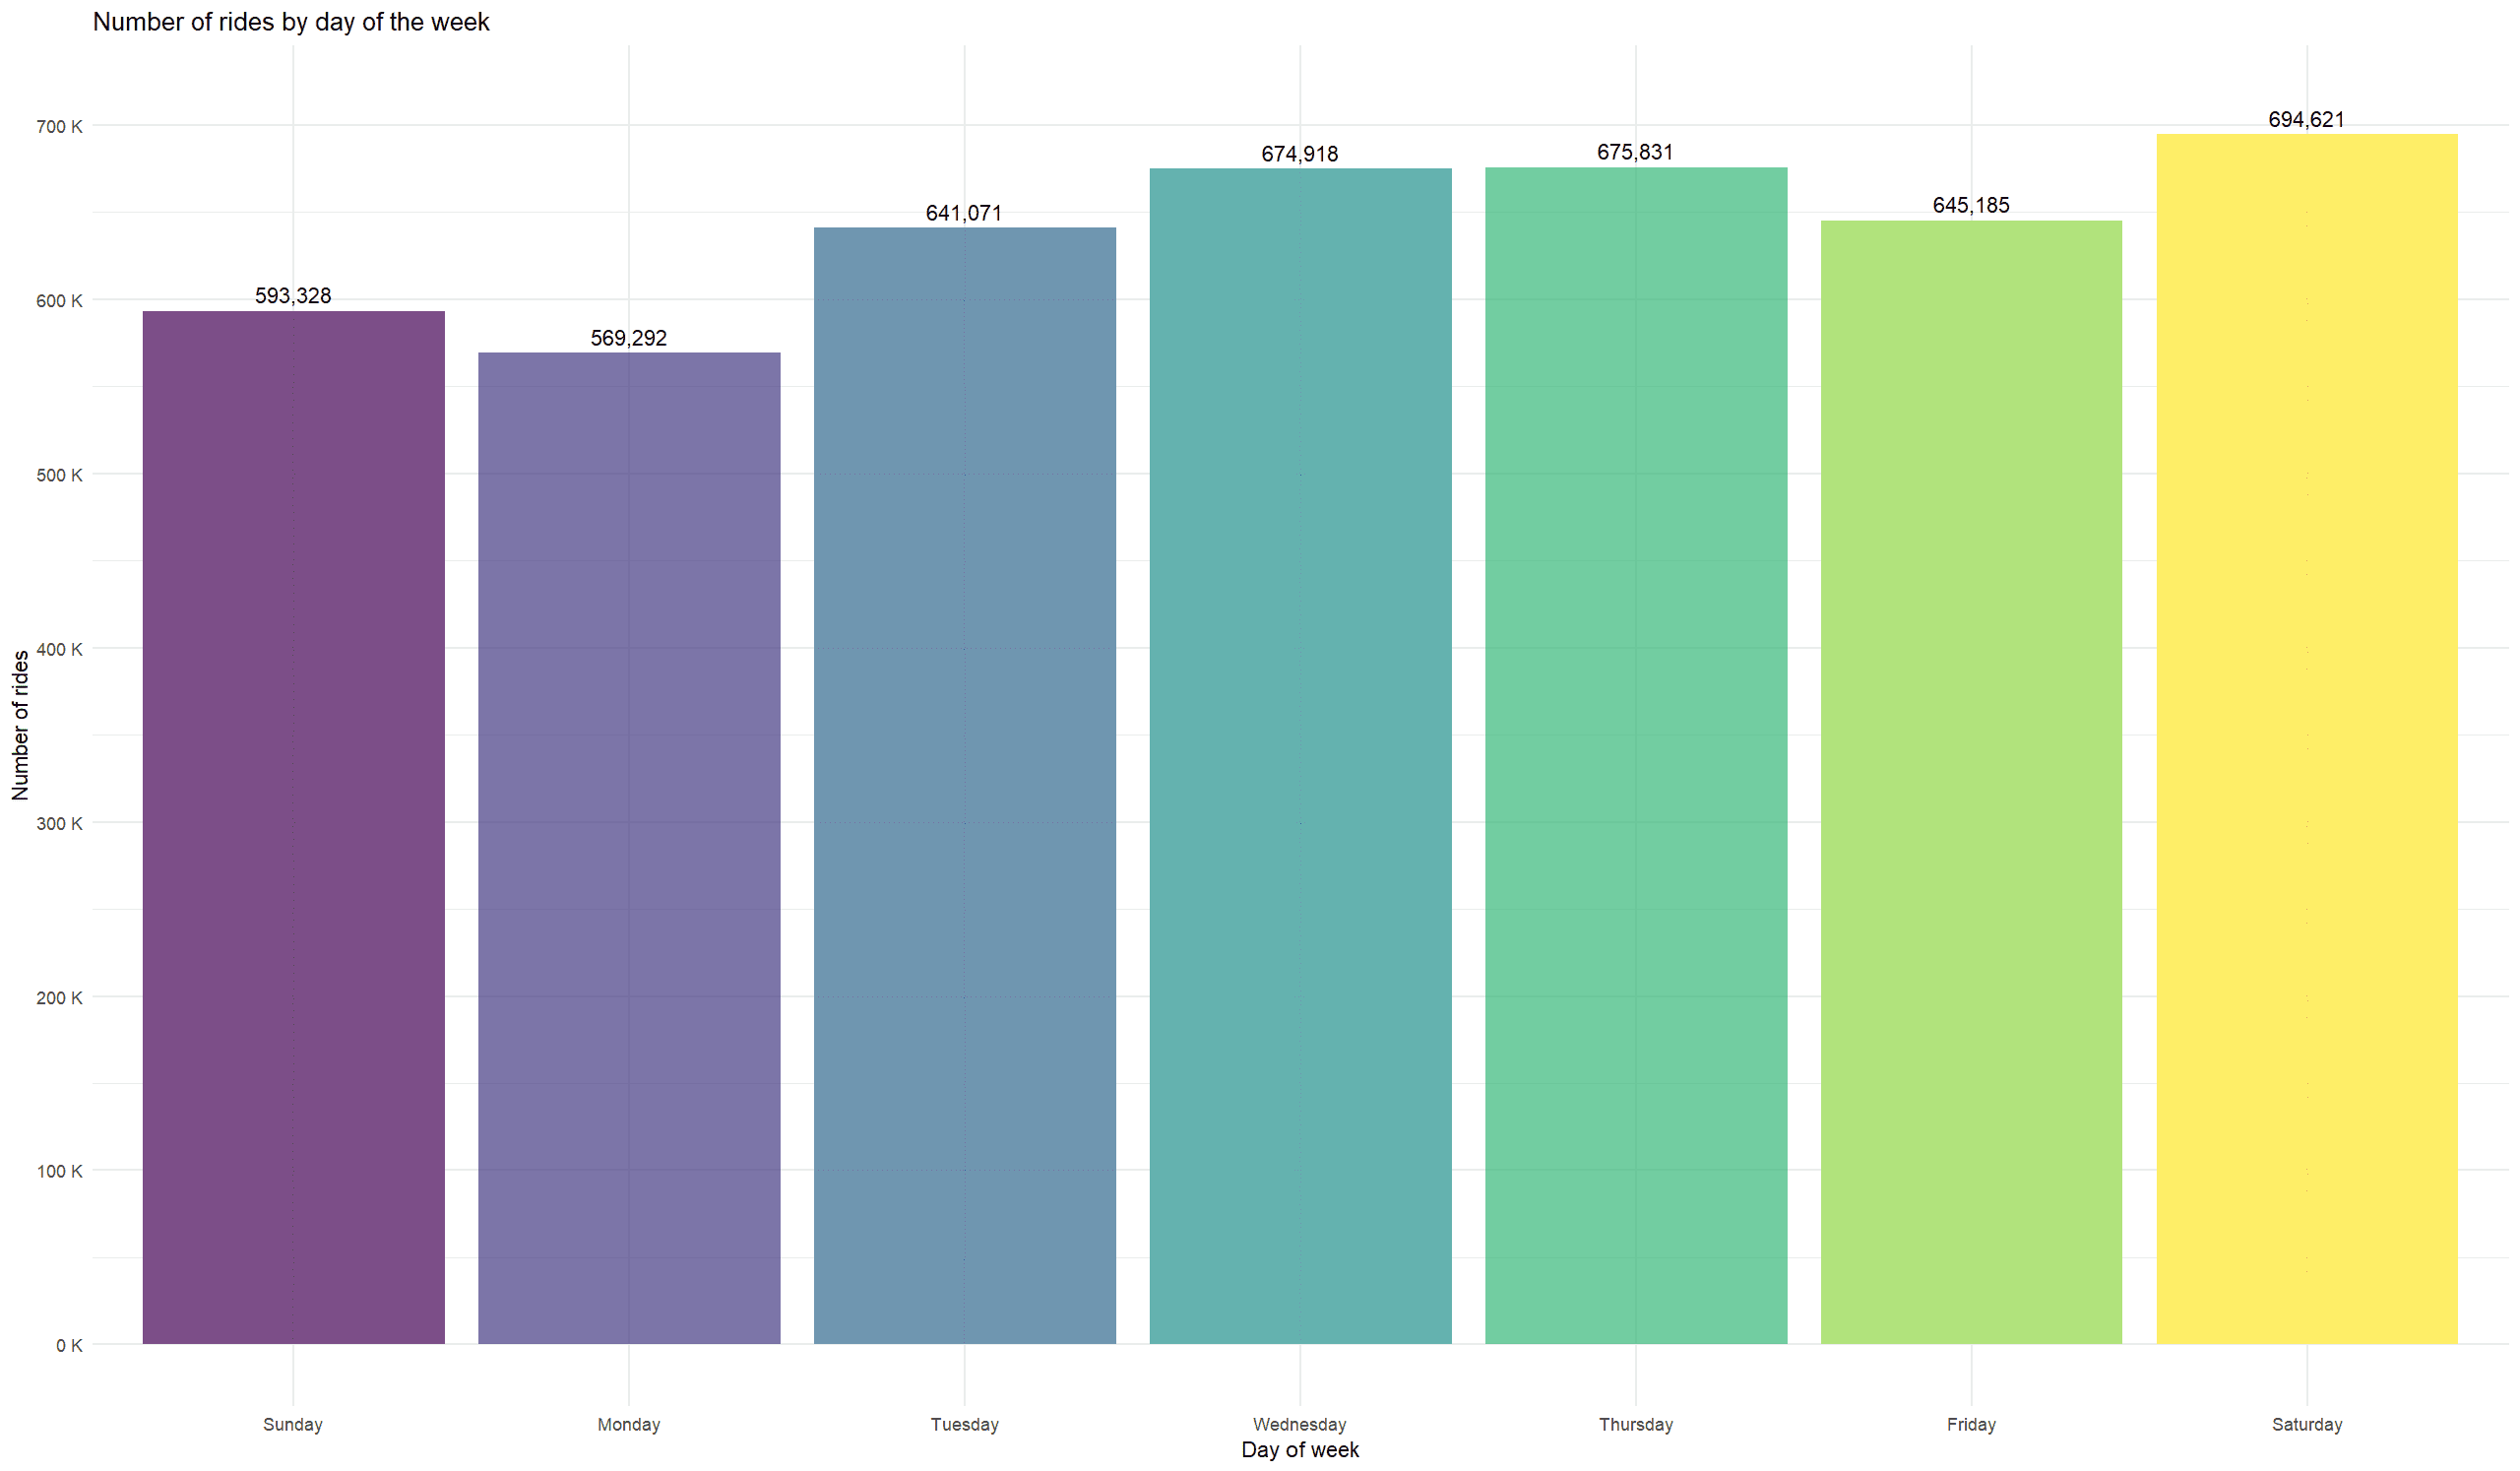

In [ ]:
# Average ride length by day of week:
cyclistic_df %>%
  group_by(day_of_week) %>% 
  summarise_at(vars(ride_length), list(~round(mean(ride_length), 2)))

In [ ]:
# Visualization of Average ride length by day of week:
cyclistic_df %>% 
  group_by(day_of_week) %>%
  summarize(average_ride_length = round(mean(ride_length), 2)) %>%
  ggplot(aes(x = day_of_week, y = average_ride_length, fill = factor(day_of_week))) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) + 
  geom_text(aes(label = average_ride_length, vjust = -0.5)) +
  labs(title = "Average ride length by day of week, min", x = "Day of week", y = "Average ride length, min", fill = 'Day of week') +
  theme_minimal() +
  theme(legend.position = "none")  # Removing the legend

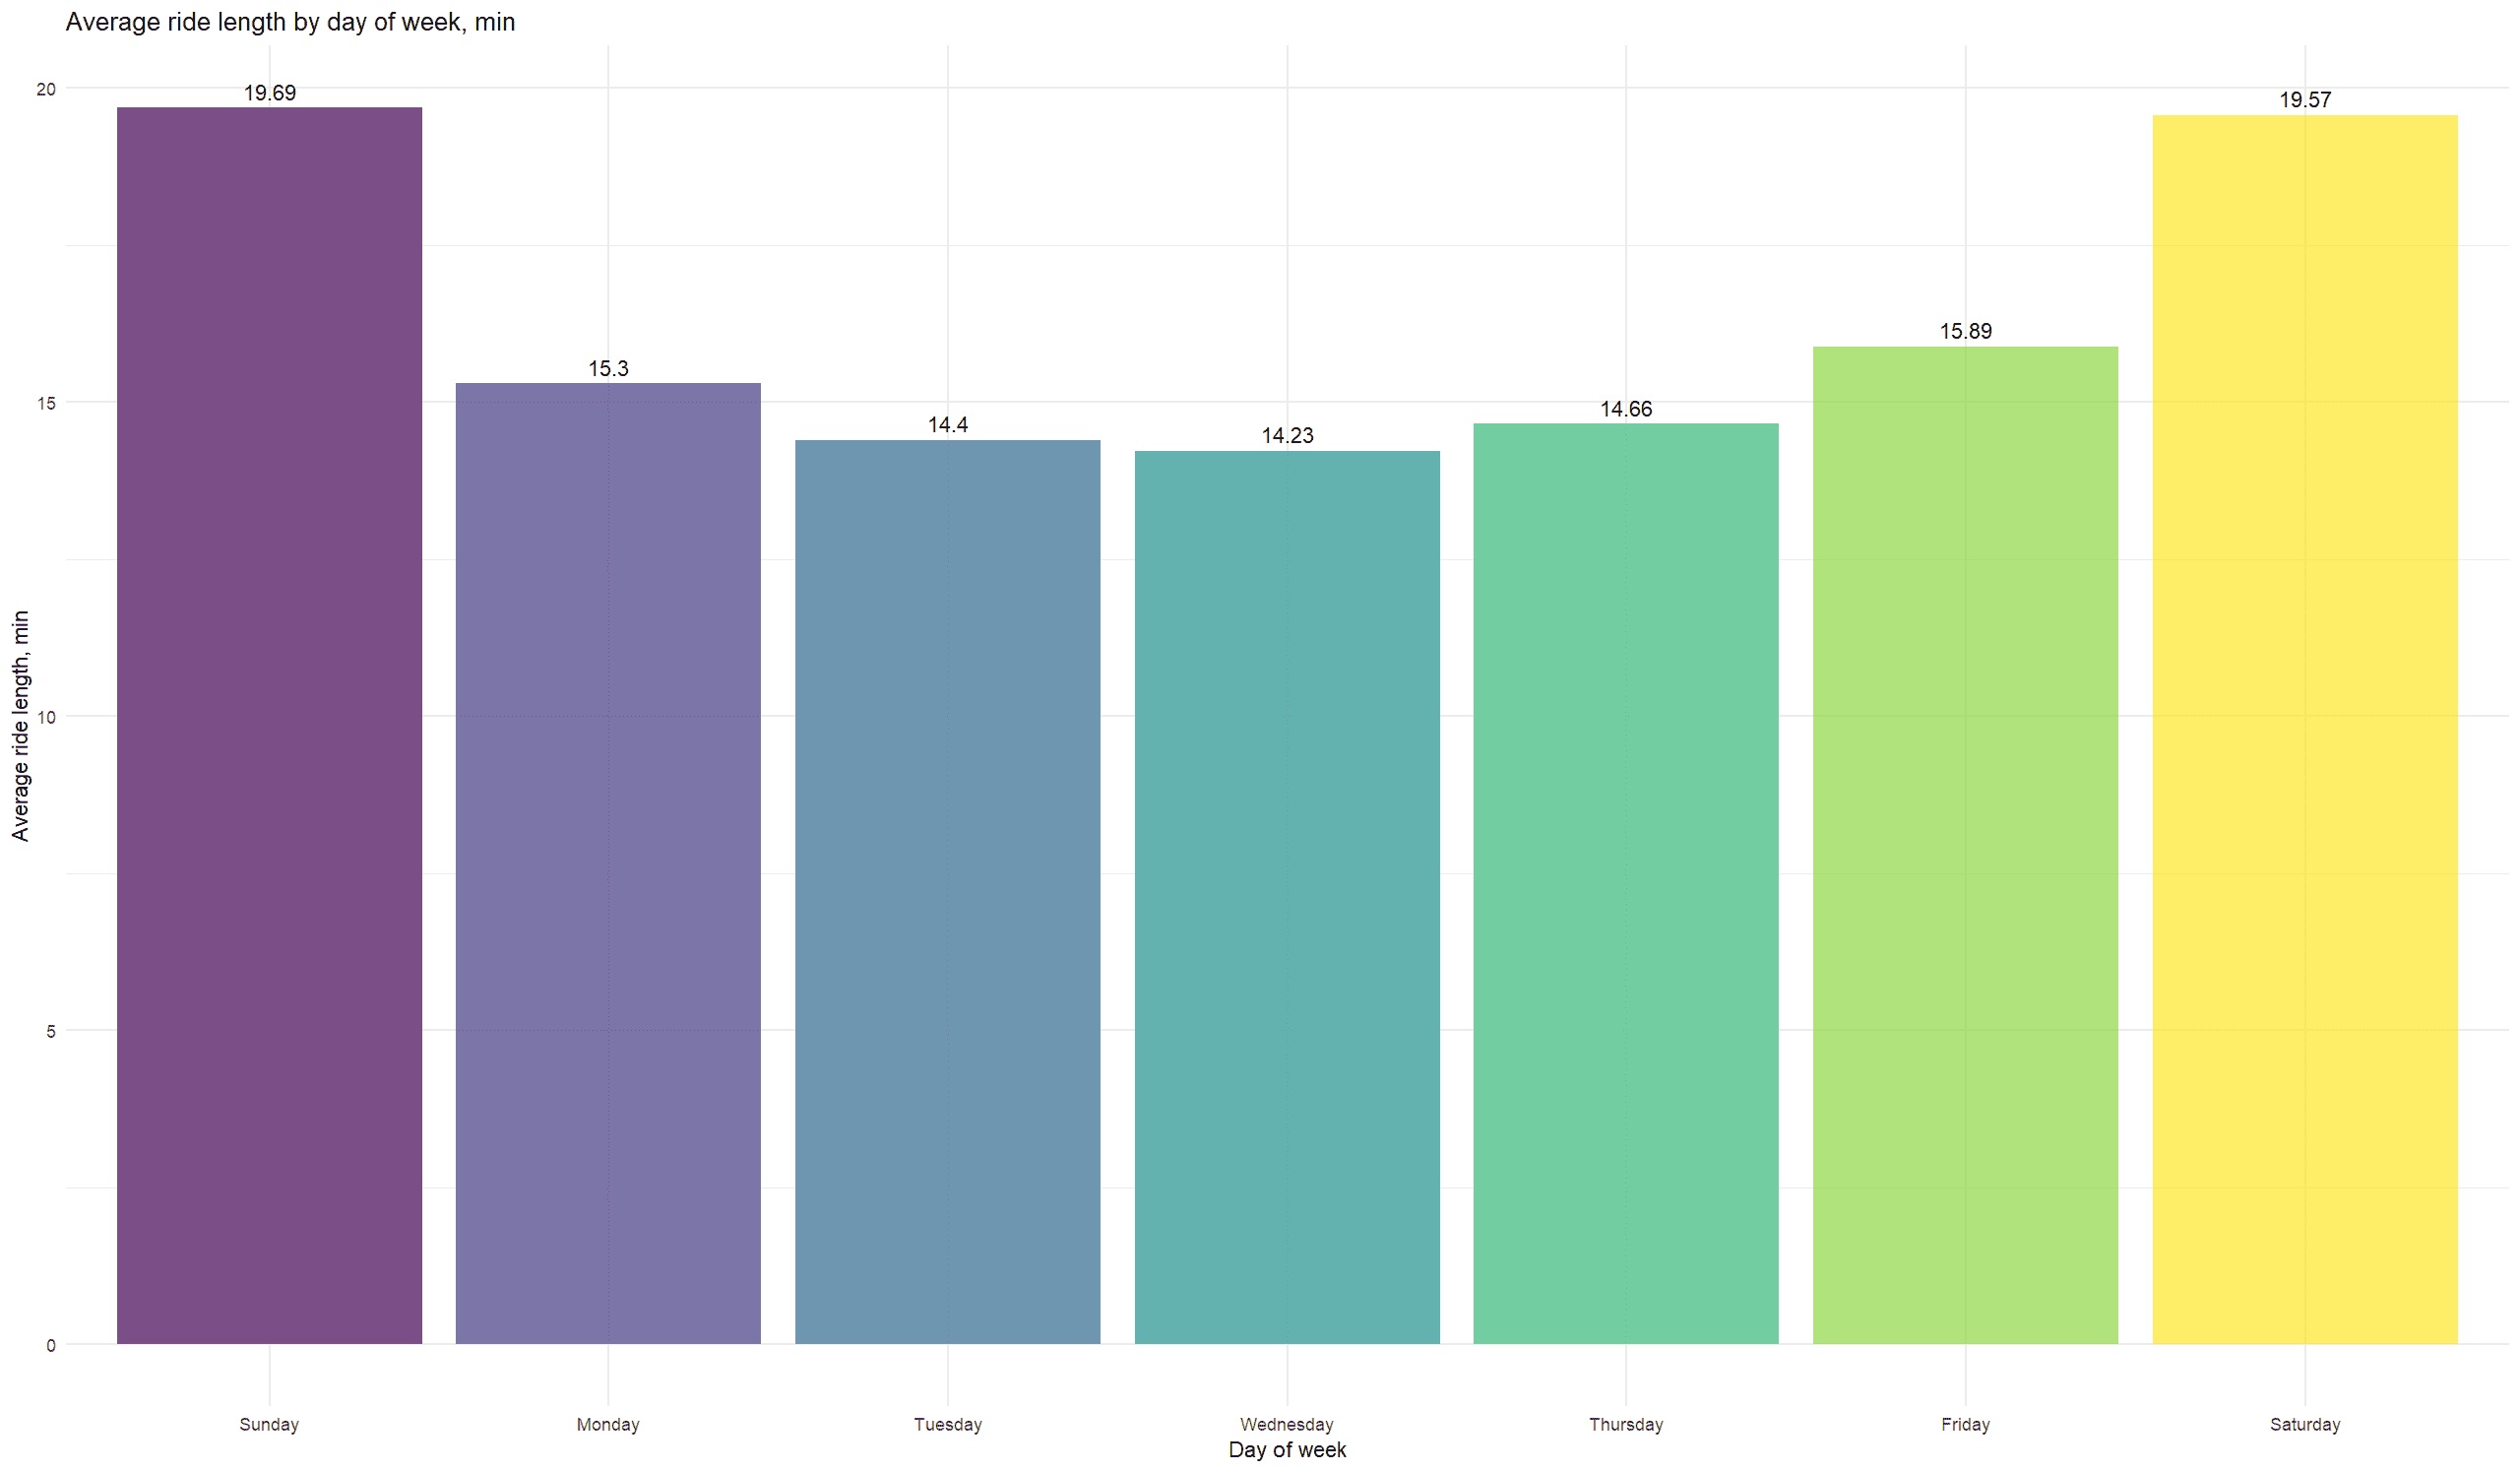

In [ ]:
# Number of rides by day of the week and by member type:
cyclistic_df %>%
  group_by(day_of_week, member_casual) %>% 
  count(day_of_week)

In [ ]:
# Visualization of Number of rides by day of the week and by member type:
data <- cyclistic_df %>%
  group_by(day_of_week, member_casual) %>% 
  count(day_of_week)
custom_labels <- function(x) {unit_format(unit = "K", scale = 1e-3)(x)}
ggplot(data, aes(x = day_of_week, y = n, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +  # Adding transparency and dodging bars
  geom_text(aes(label = comma(n), vjust = -0.5), position = position_dodge(width = 0.9)) +  # Adding comma formatting and adjusting position
  labs(title = "Number of rides by day of the week and by member type", x = "Day of week", y = "Number of rides", fill = "Member type") +
  theme_minimal() +
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 460000, by = 100000), limits = c(0, 460000))  # Formatting y-axis labels and limits

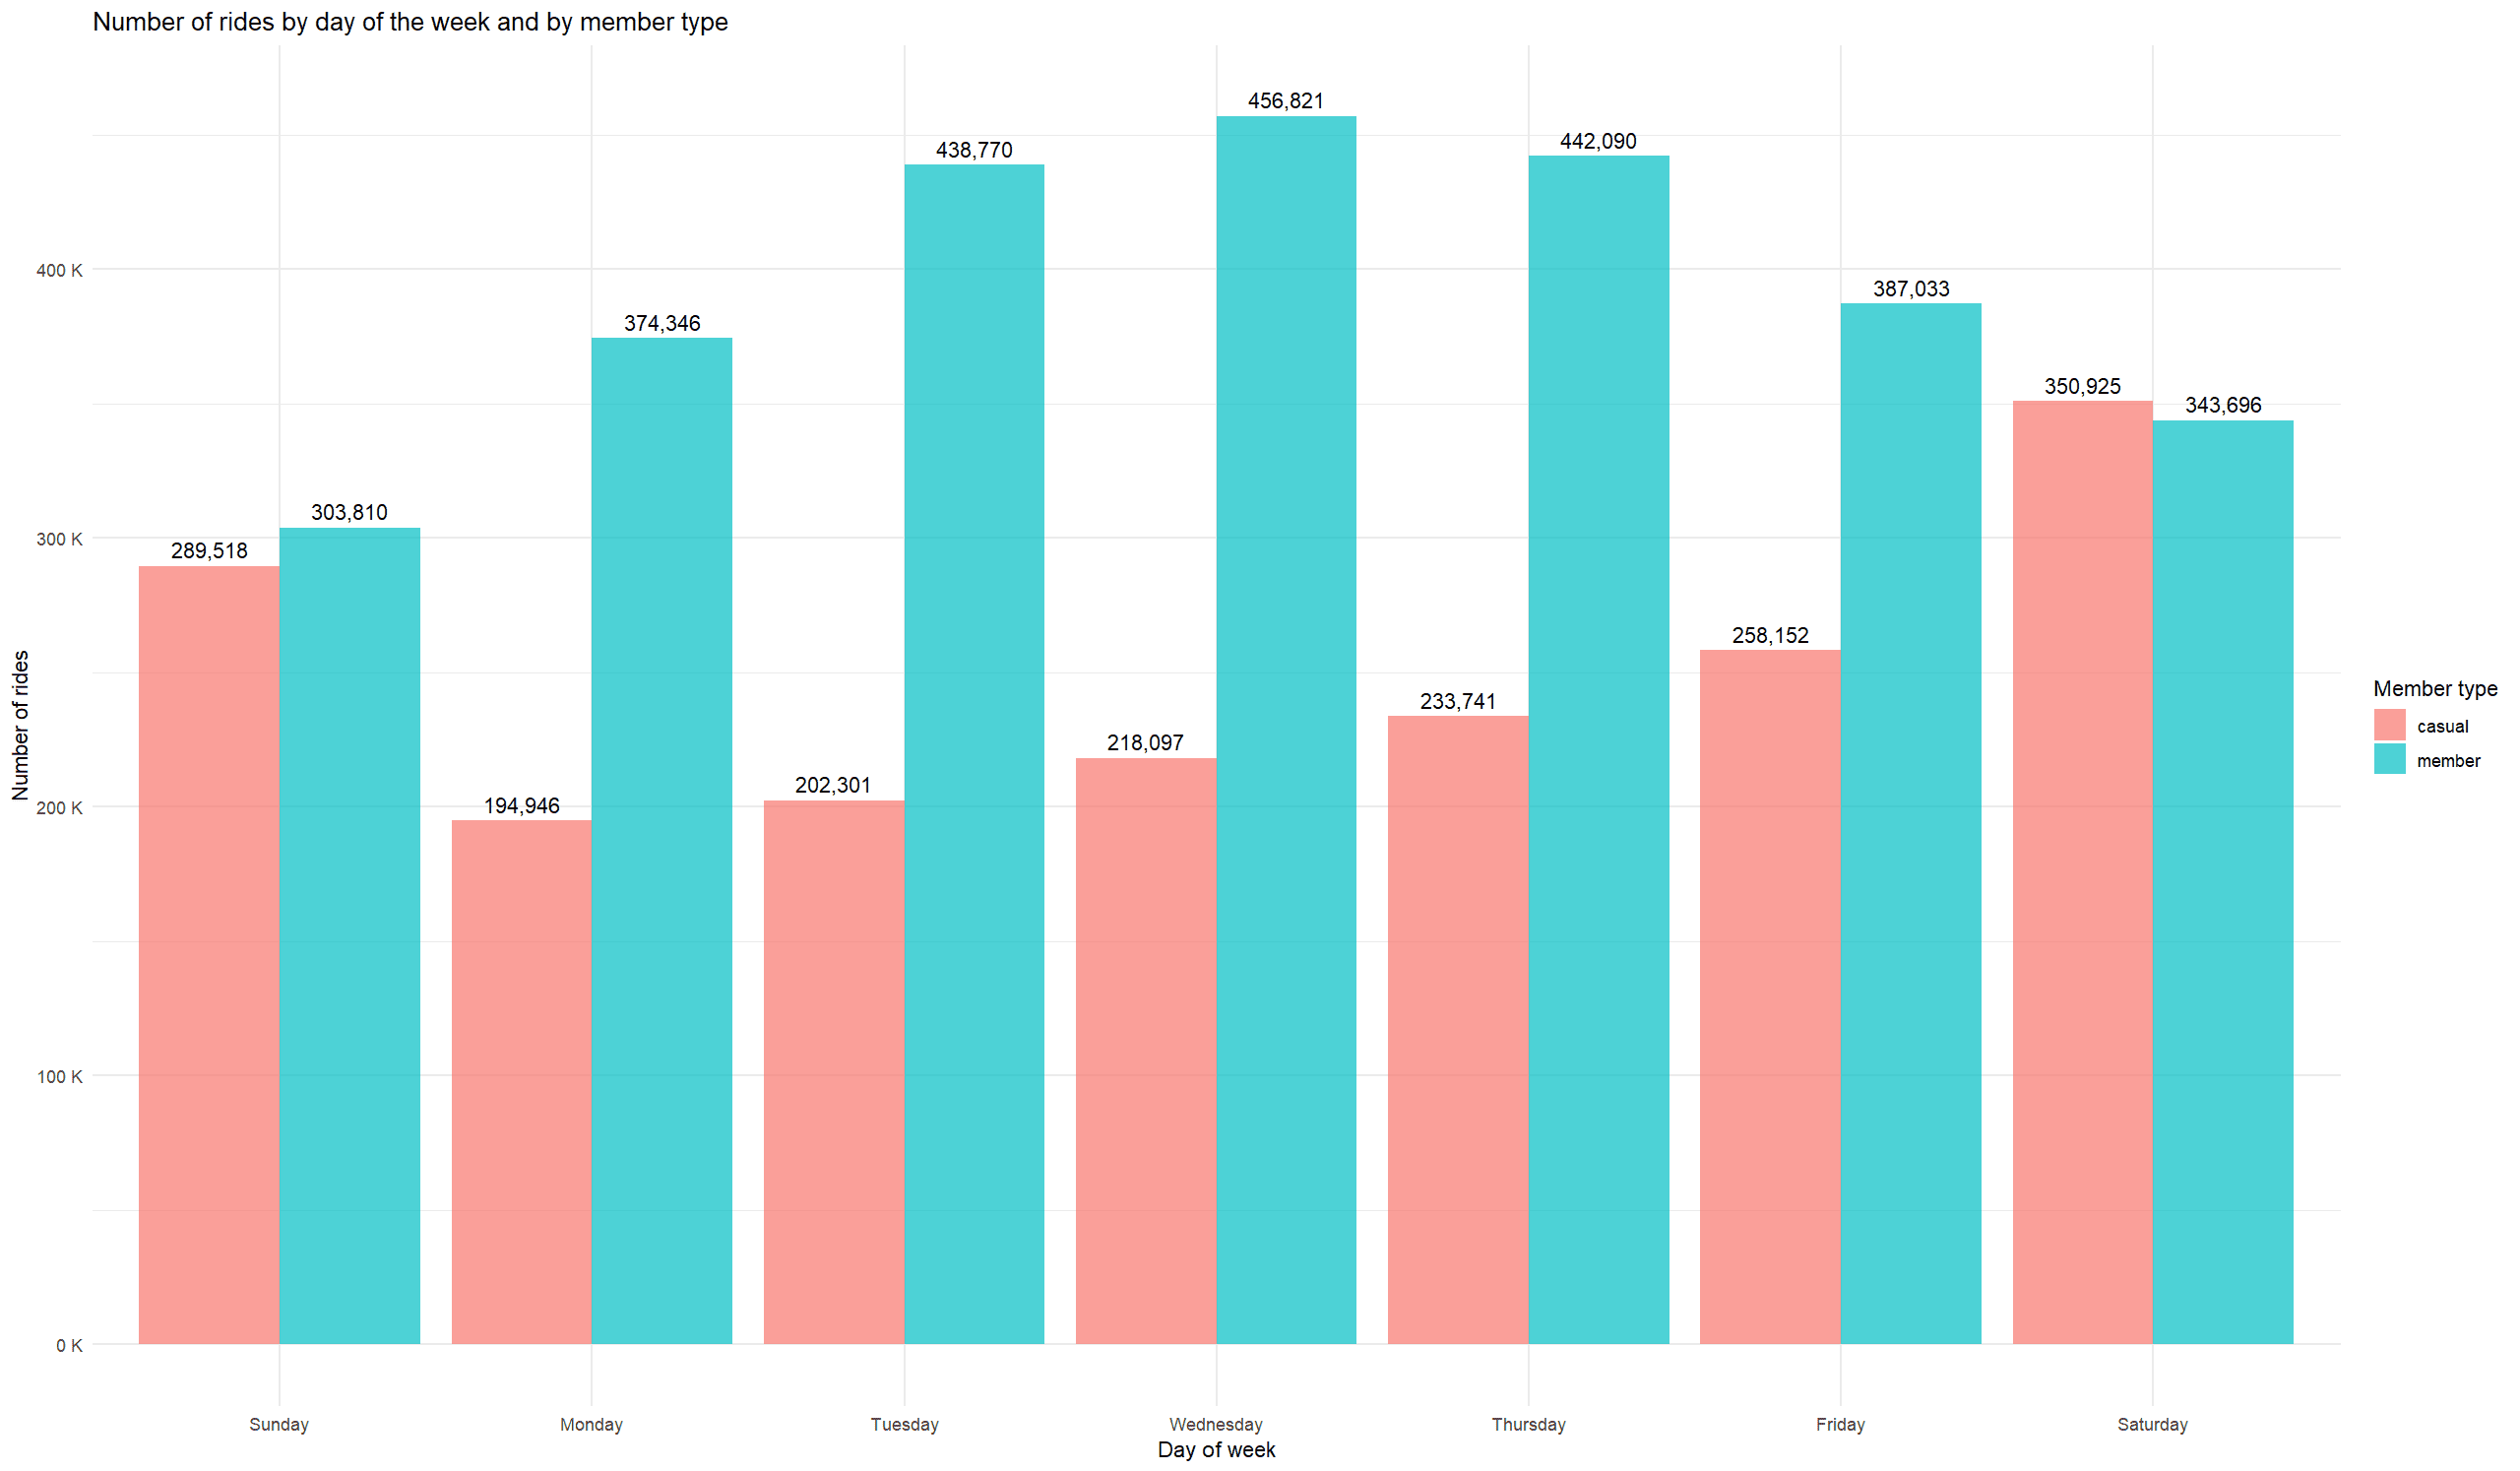

In [ ]:
# Visualization of Hourly use of bikes throughout the week by member type:
custom_labels <- function(x) {unit_format(unit = "K", scale = 1e-3)(x)}
ggplot(data = cyclistic_df) +
  aes(x = hour, fill = member_casual) +
  facet_wrap(~day_of_week, scales = "free_x") +  # Set scales to "free_x"
  geom_bar(alpha = 0.7) +
  labs(title = 'Hourly use of bikes throughout the week', x = 'Hour', y = 'Number of rides', fill = 'Member type') +
  theme(axis.text = element_text(size = 5)) +
  scale_x_continuous(breaks = seq(0, 23, by = 1)) +  # Set breaks from 0 to 23 with an interval of 1 hour
  theme_minimal() +
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 60000, by = 10000), limits = c(0, 60000))  # Formatting y-axis labels and limits

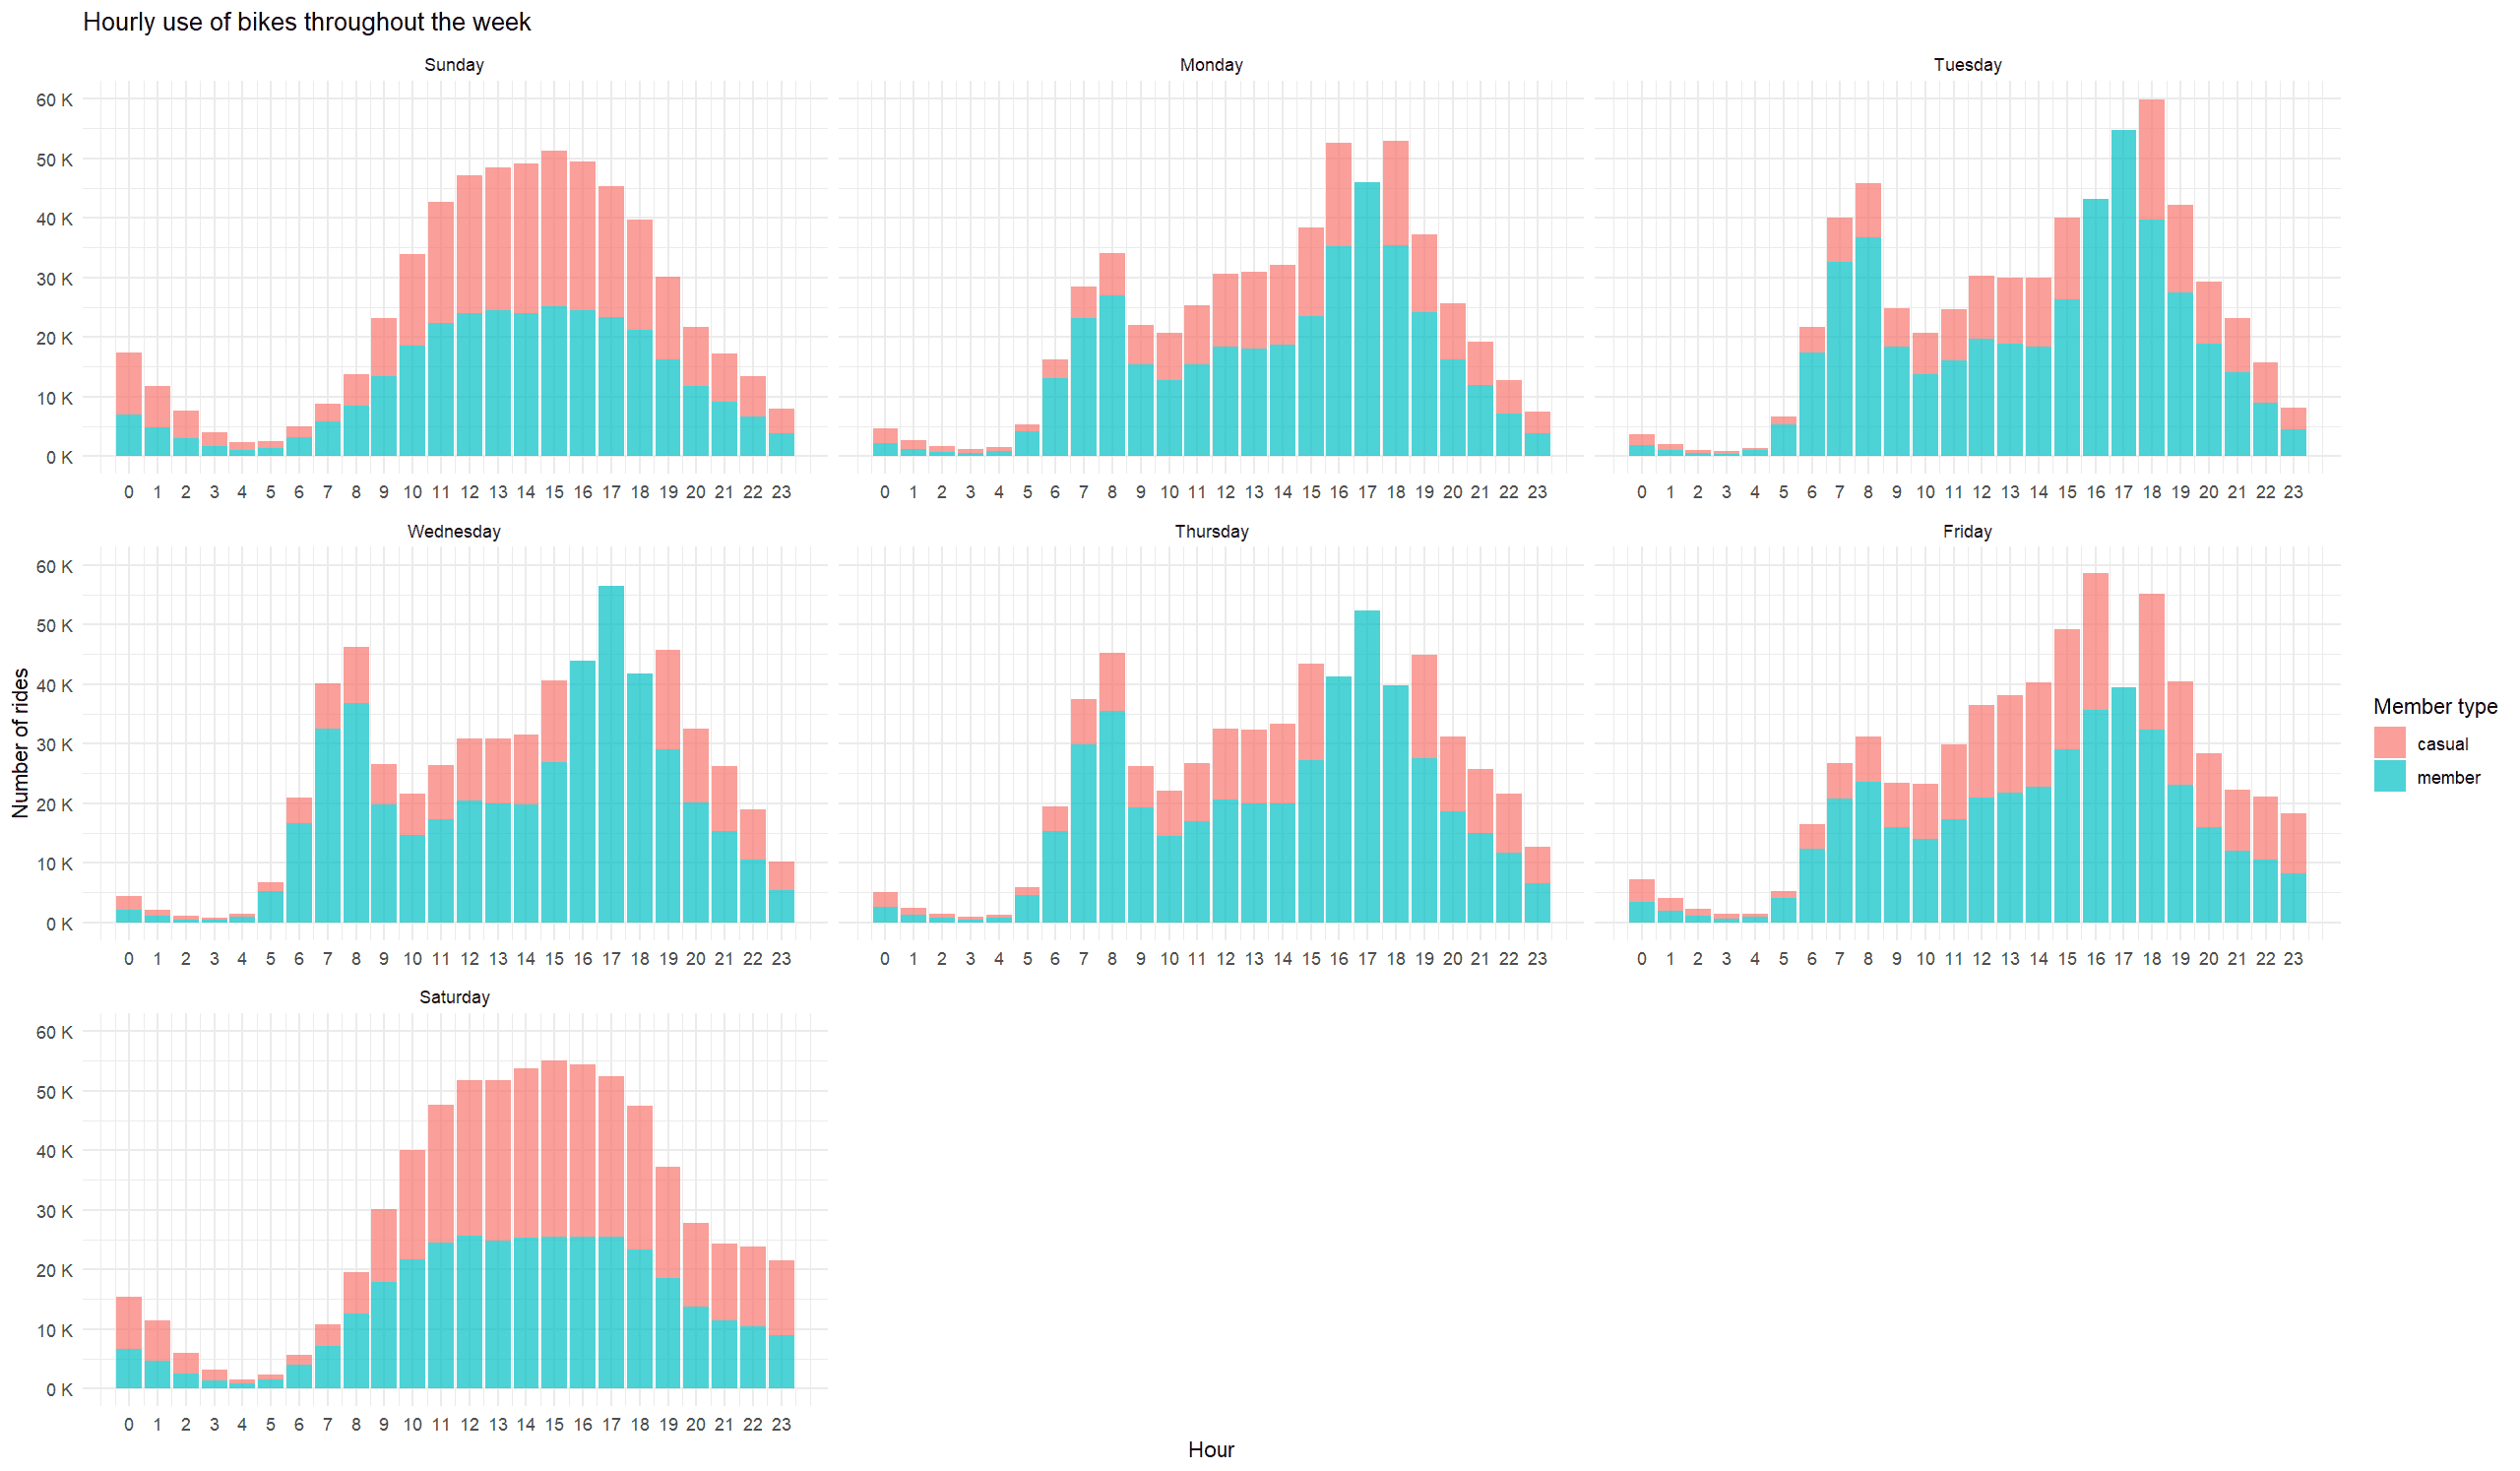

In [ ]:
# Average ride length by day of week and by member type:
cyclistic_df %>%
  group_by(day_of_week, member_casual) %>% 
  summarise_at(vars(ride_length), list(~round(mean(ride_length), 2)))

In [ ]:
# Visualization of Average ride length by day of week and by member type:
cyclistic_df %>% 
  group_by(day_of_week, member_casual) %>%
  summarize(average_ride_length = round(mean(ride_length), 2)) %>%
  ggplot(aes(x = day_of_week, y = average_ride_length, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) + 
  geom_text(aes(label = average_ride_length, vjust = -0.5), position = position_dodge(width = 0.9)) +
  labs(title = "Average ride length by day of week and by member type, min", x = "Day of week", y = "Average ride length, min", fill = 'Member type') +
  theme_minimal()

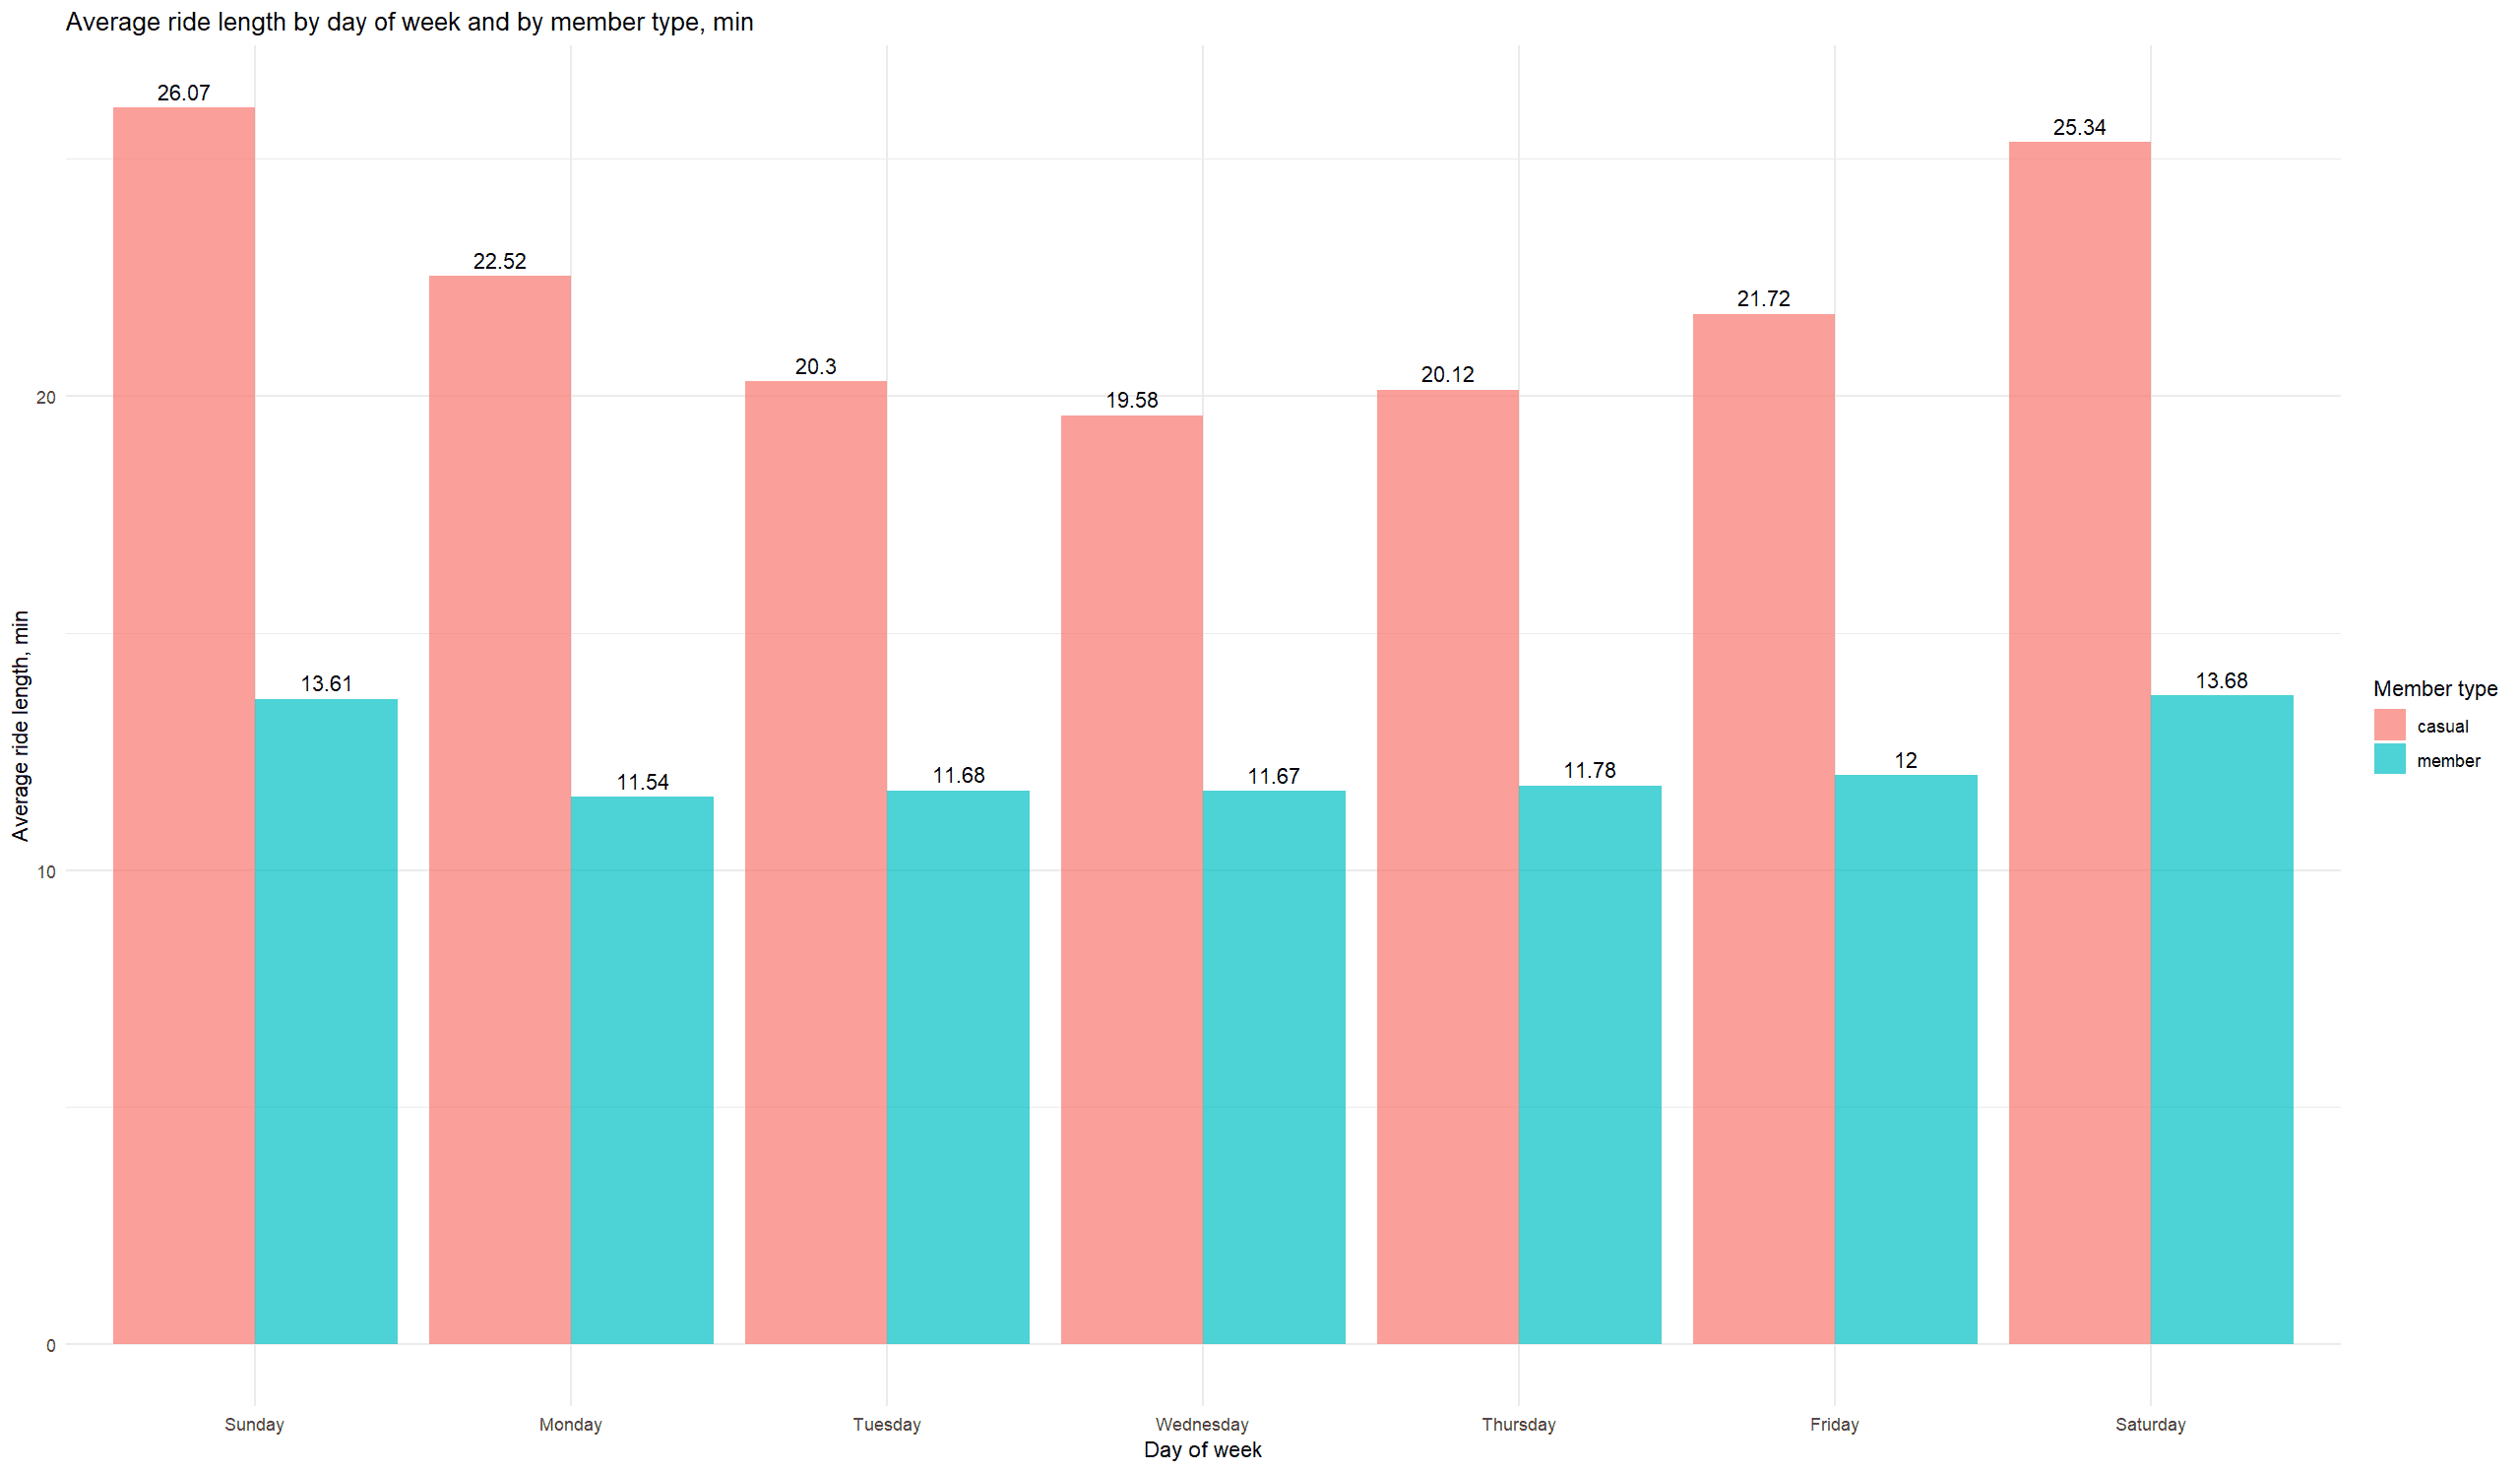

**Breakdown by month (06_2022, 07_2022, 08_2022, 09_2022, 10_2022, 11_2022, 12_2022, 01_2023, 02_2023, 03_2023, 04_2023, 05_2023)**

In [ ]:
# Number of rides by month:
cyclistic_df %>%
  count(month)

In [ ]:
# Visualization of Number of rides by month:
custom_labels <- function(x) {unit_format(unit = "K", scale = 1e-3)(x)}
cyclistic_df %>% 
  group_by(month) %>%
  summarise(count_ride = n()) %>%
  ggplot(mapping = aes(x = month, y = count_ride, fill = month)) + 
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +
  geom_text(aes(label = comma(count_ride), vjust = -0.5)) +
  labs(title = "Number of rides by month", x = "Month", y = "Number of rides") +
  theme_minimal() +
  theme(legend.position = "none") +  # Removing the legend
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 650000, by = 100000), limits = c(0, 650000))  # Formatting y-axis labels and limits

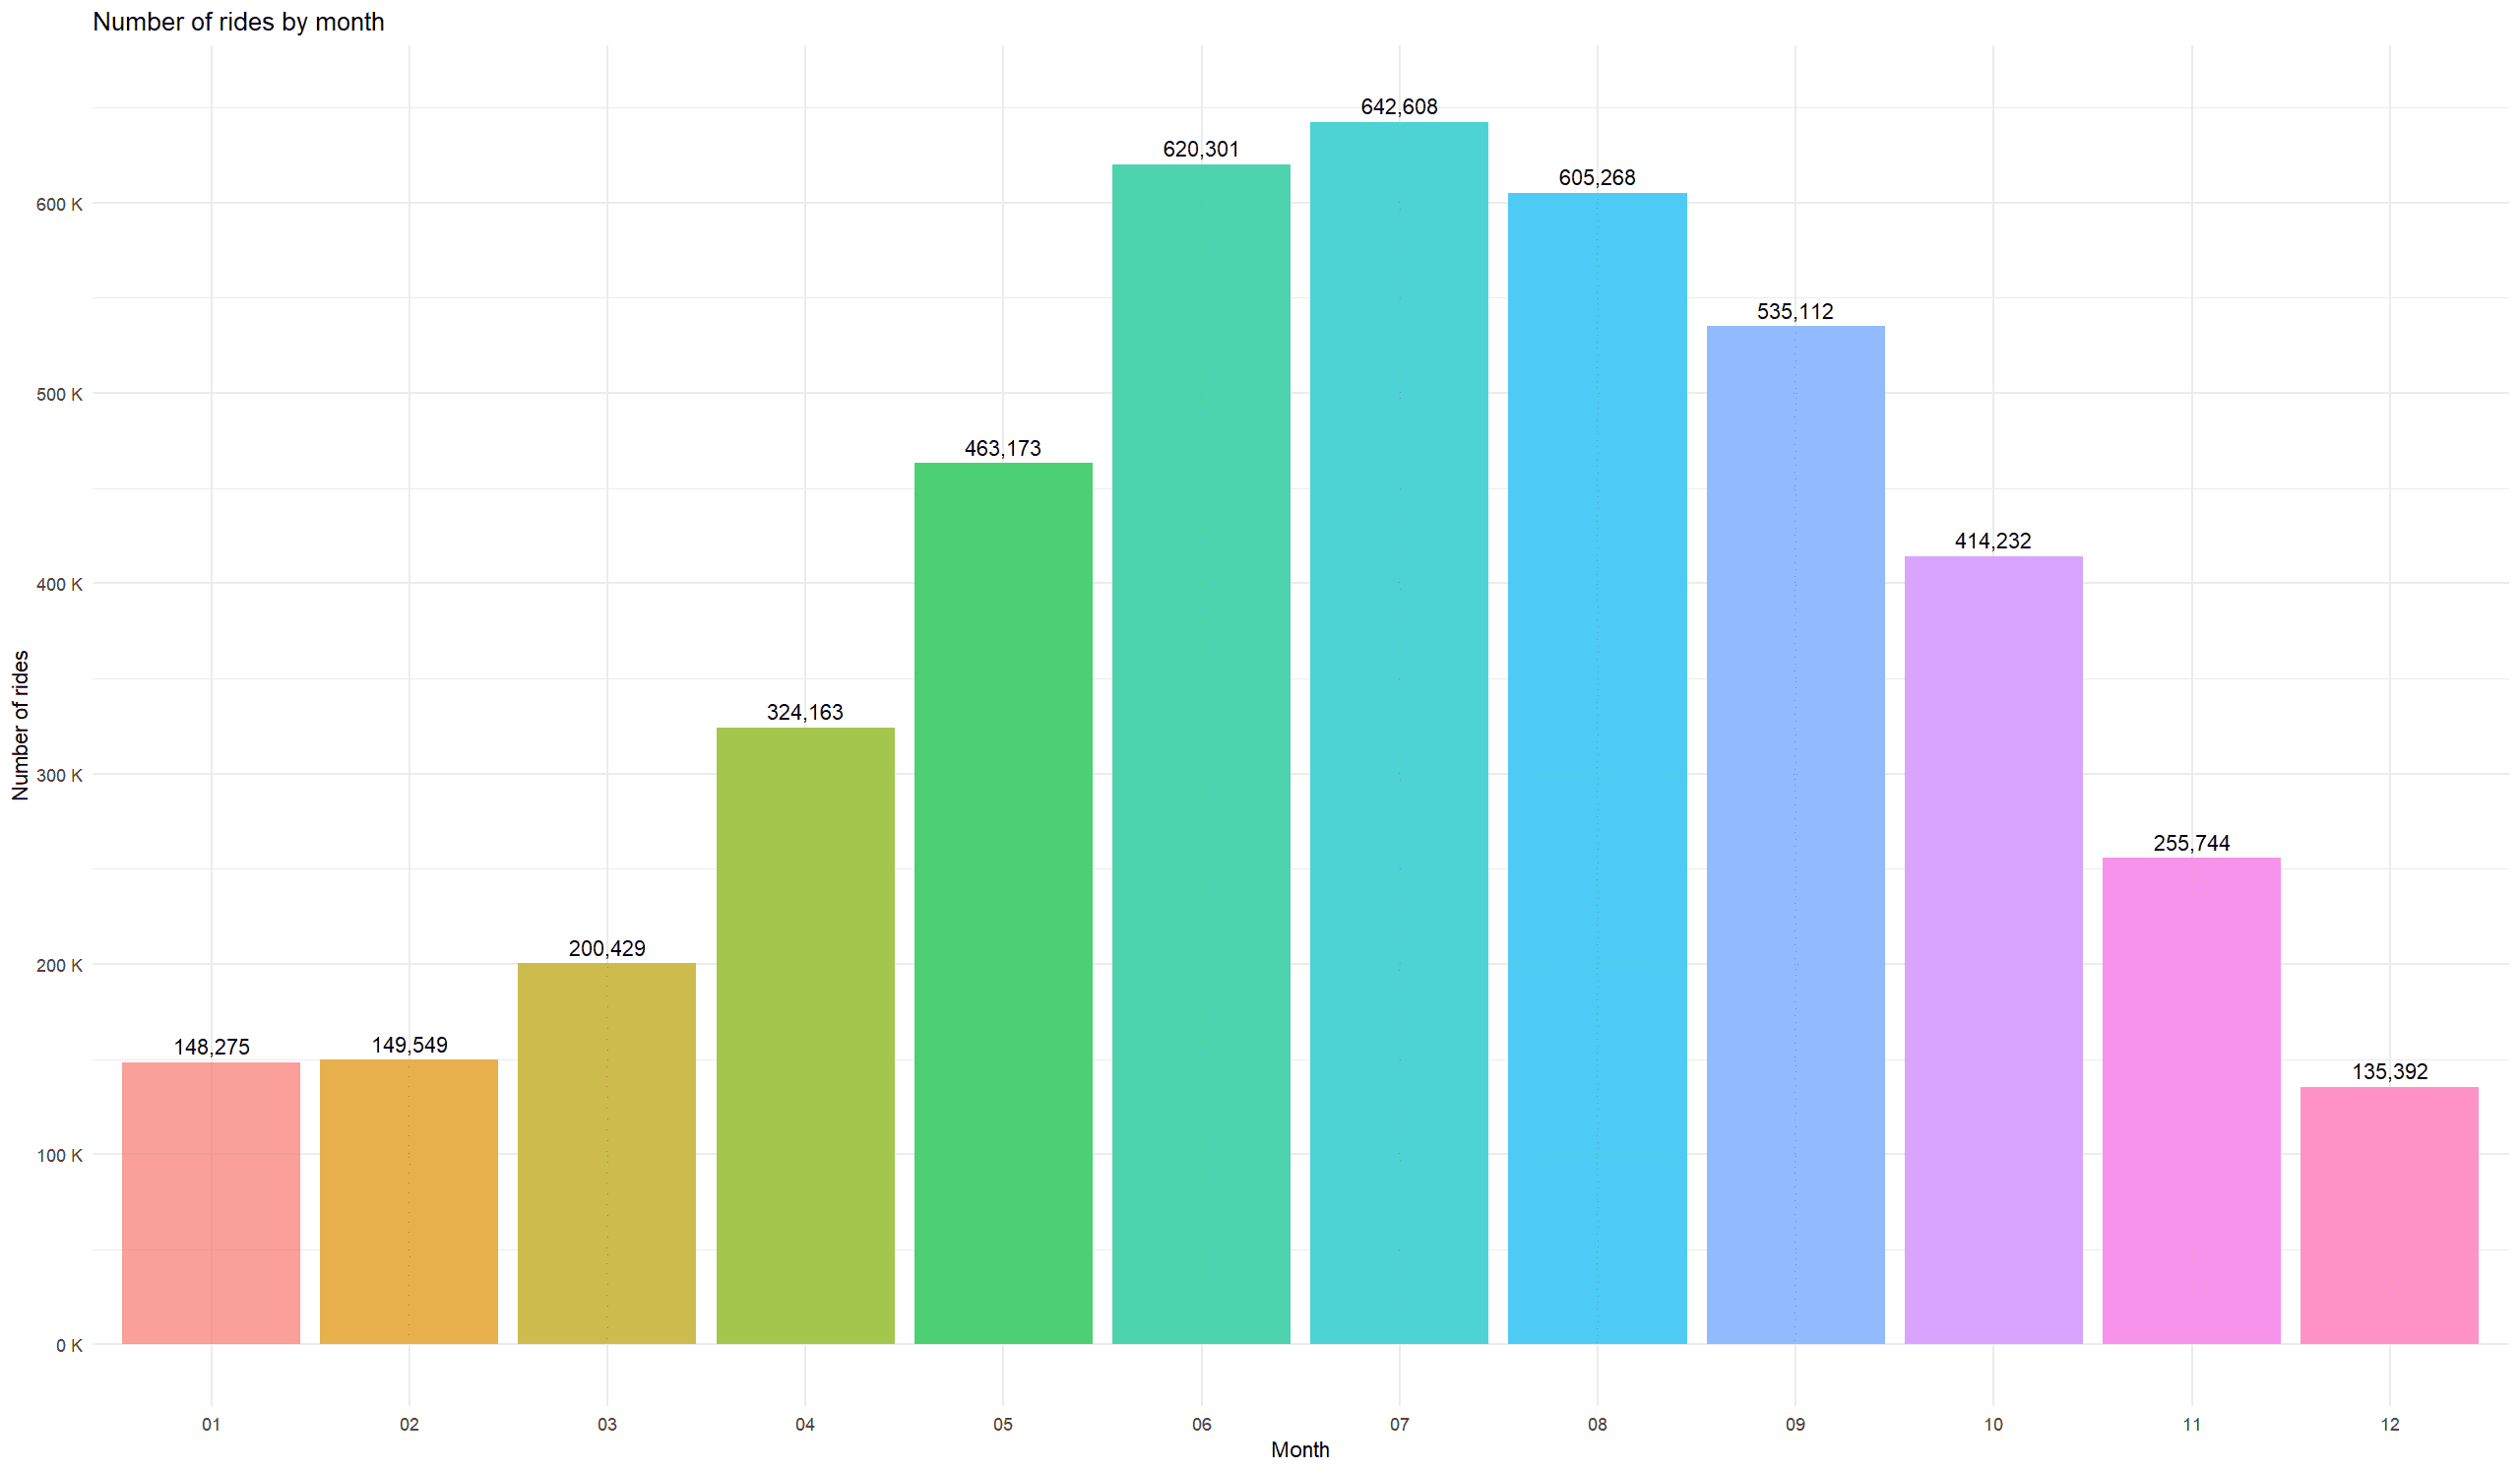

In [ ]:
# Average ride length by month:
cyclistic_df %>%
  group_by(month) %>% 
  summarise_at(vars(ride_length), list(~round(mean(ride_length), 2)))

In [ ]:
# Visualization of Average ride length by month:
cyclistic_df %>% 
  group_by(month) %>%
  summarize(average_ride_length = round(mean(ride_length), 2)) %>%
  ggplot(aes(x = month, y = average_ride_length, fill = month)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +
  geom_text(aes(label = average_ride_length, vjust = -0.5)) +
  labs(title = "Average ride length by month, min", x = "Season", y = "Average ride length, min") +
  theme_minimal() +
  theme(legend.position = "none")  # Removing the legend

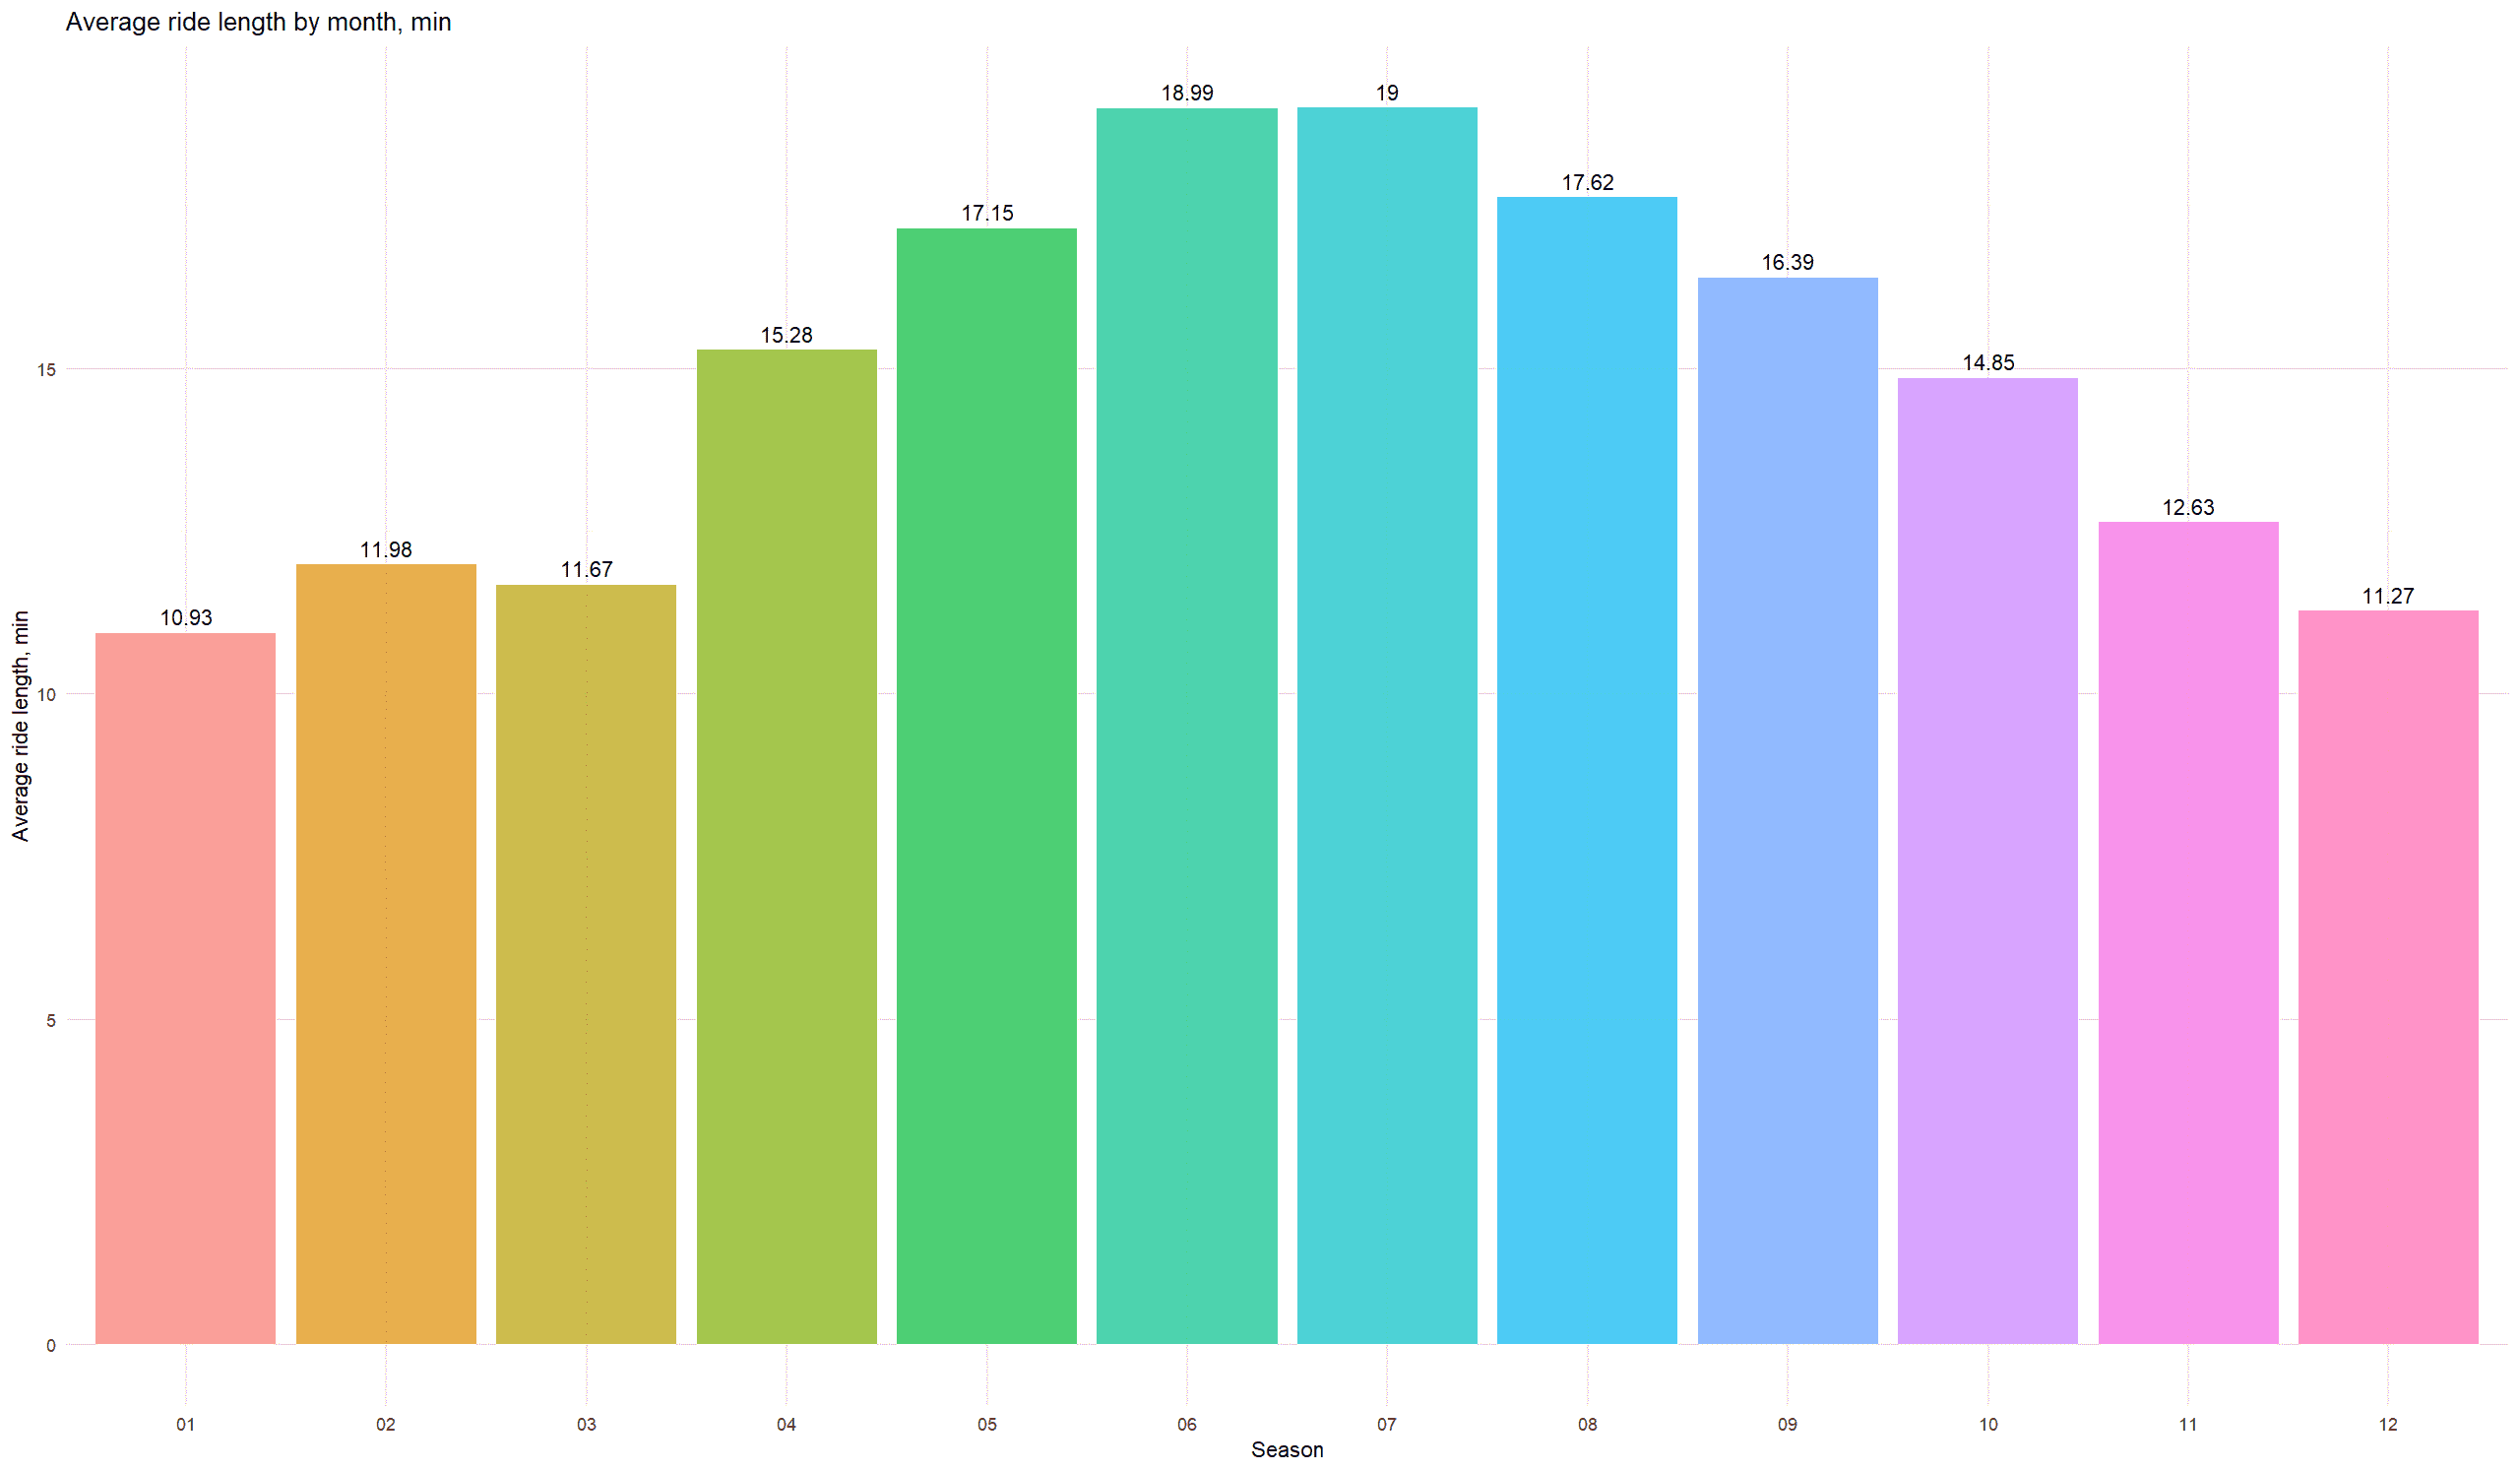

In [ ]:
# Number of rides by month and by member type:
cyclistic_df %>%
  group_by(month, member_casual) %>% 
  count(month) %>% 
  print(n = 24)  # lets you view the entire tibble: 24 = 12 months a year * 2 (number of member types)

In [ ]:
# Visualization of Number of rides by month and by member type:
data <- cyclistic_df %>%
  group_by(month, member_casual) %>% 
  count(month)
custom_labels <- function(x) {unit_format(unit = "K", scale = 1e-3)(x)}
ggplot(data, aes(x = month, y = n, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +
  geom_text(aes(label = comma(n), vjust = -0.5), position = position_dodge(width = 0.9)) +
  labs(title = "Number of rides by month and by member type", x = "Month", y = "Number of rides") +
  theme_minimal() +
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 340000, by = 50000), limits = c(0, 340000))  # Formatting y-axis labels and limits

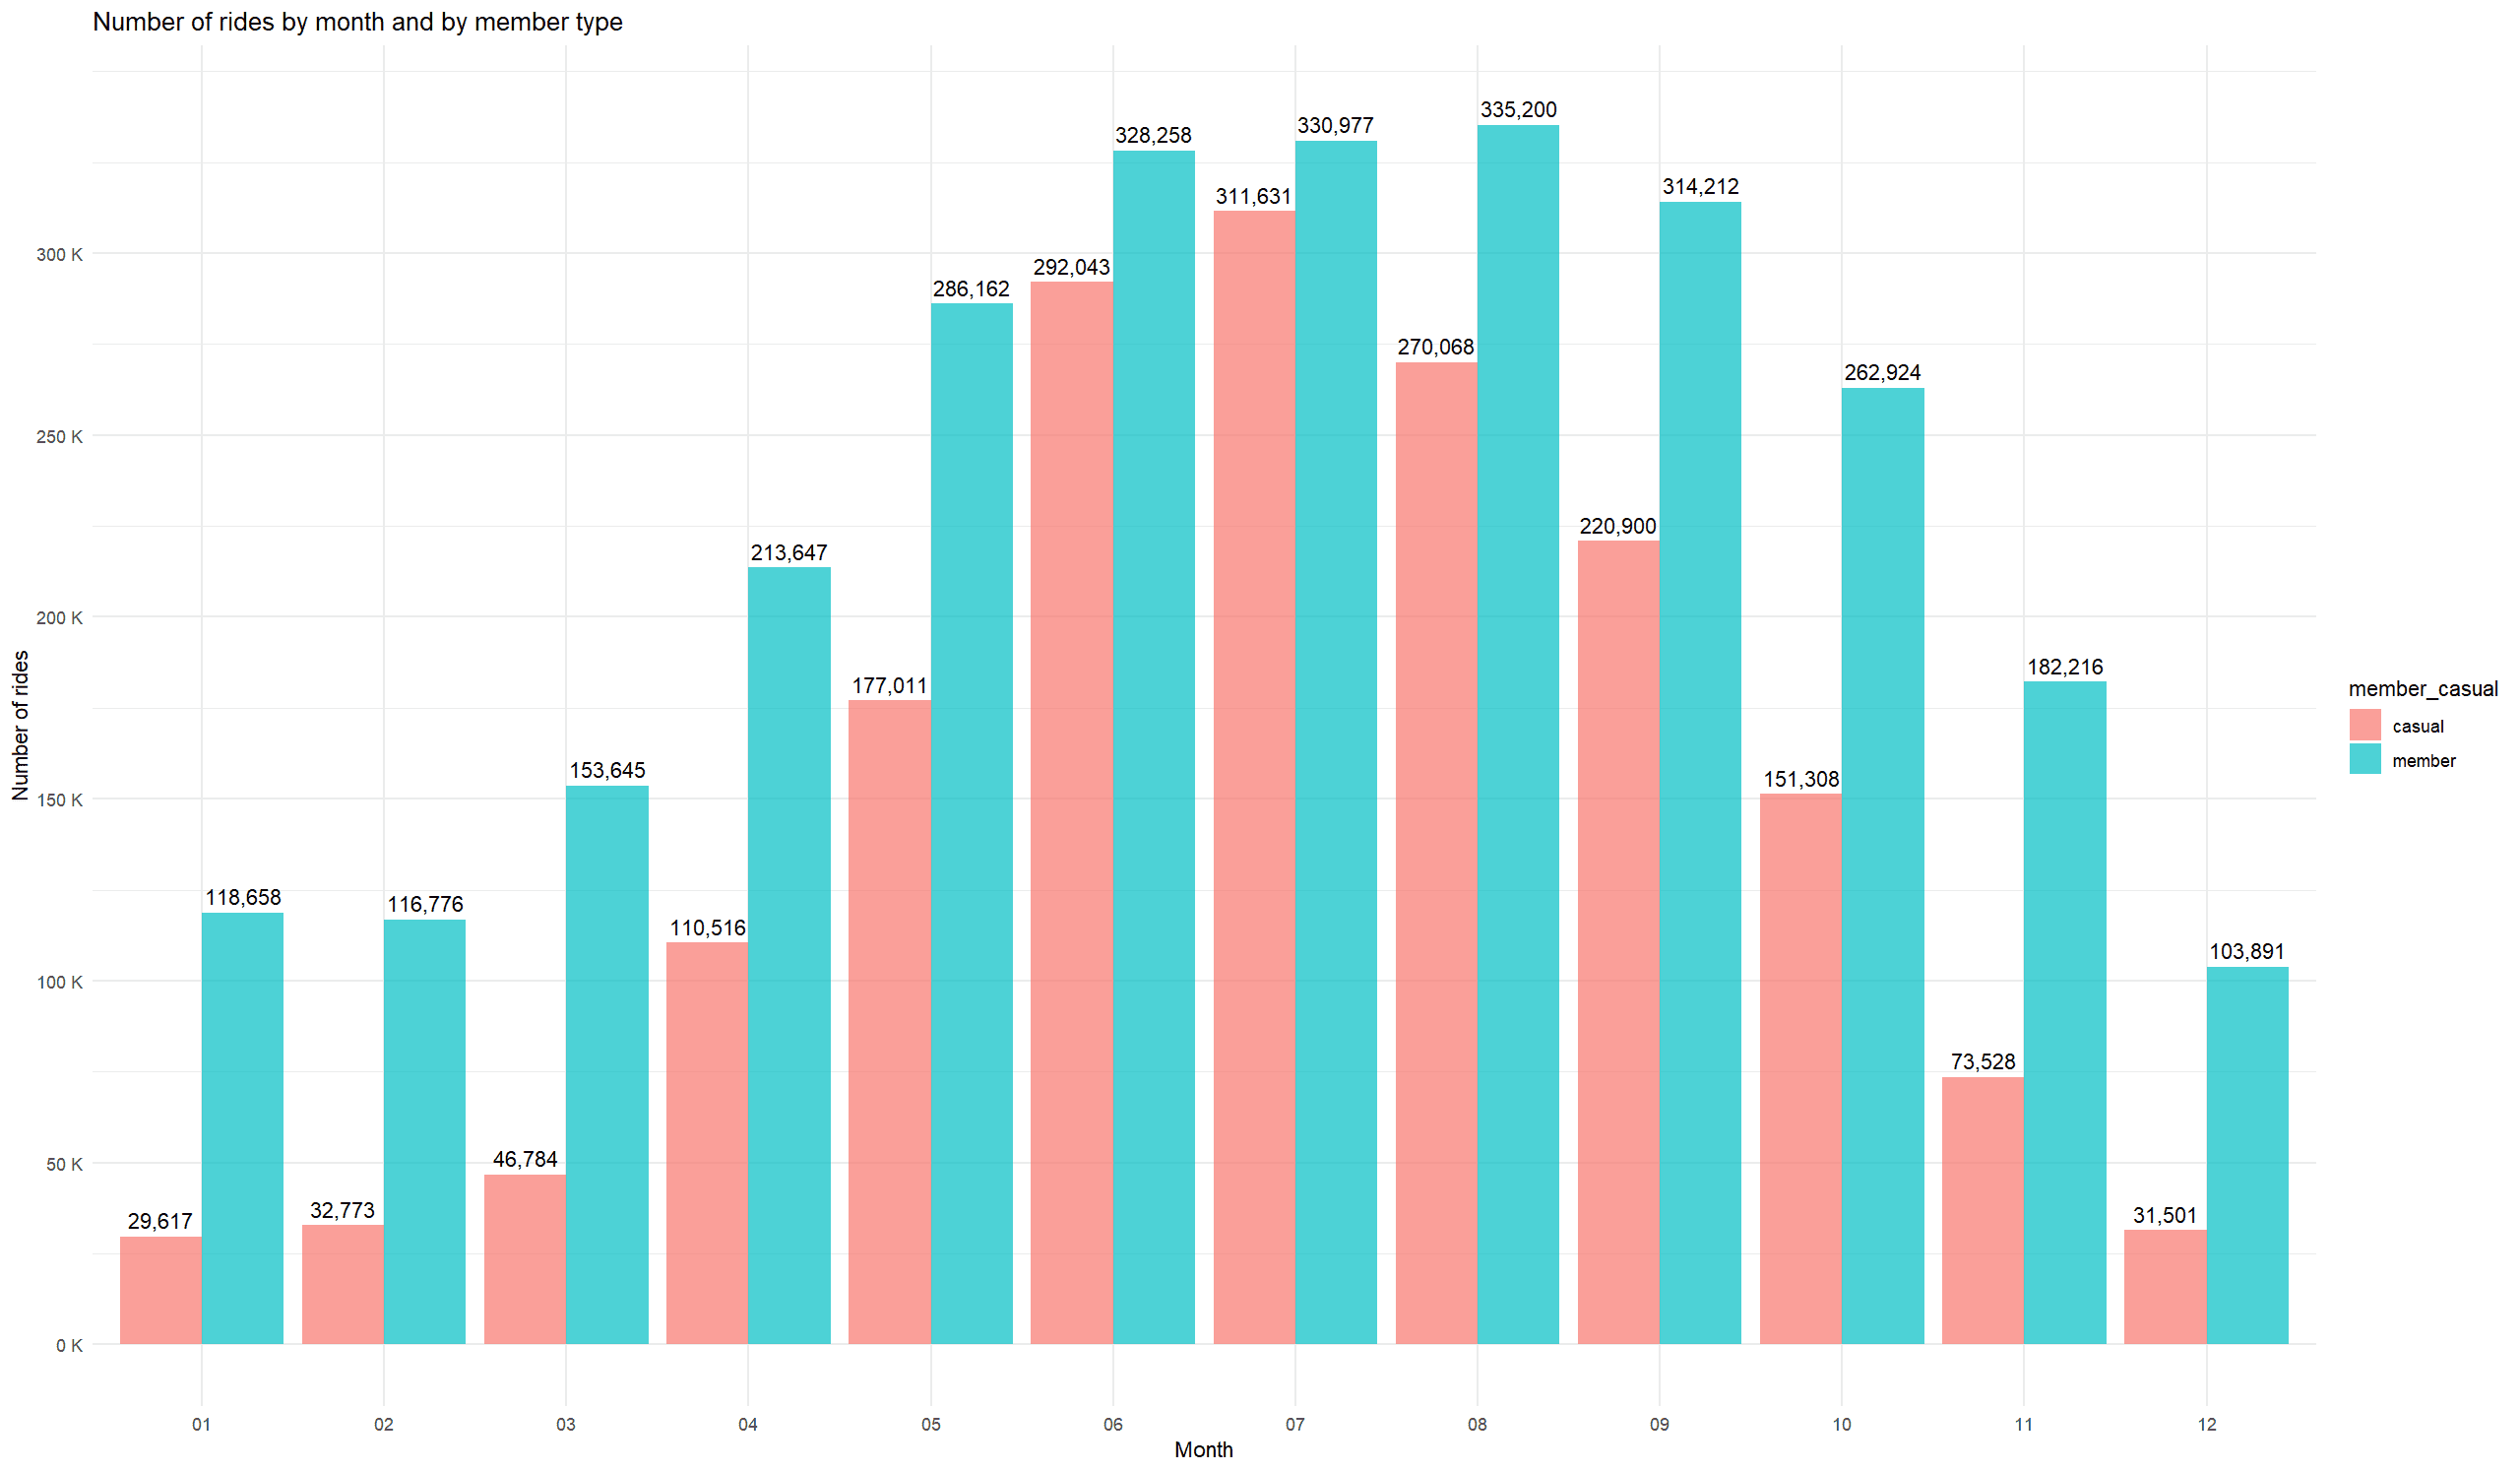

In [ ]:
# Average ride length by month and by member type:
cyclistic_df %>%
  group_by(month, member_casual) %>% 
  summarise_at(vars(ride_length), list(~round(mean(ride_length), 2))) %>%
  print(n = 24)  # lets you view the entire tibble: 24 = 12 months a year * 2 (number of member types)

In [ ]:
# Visualization of Average ride length by and by member type:
cyclistic_df %>% 
  group_by(month, member_casual) %>%
  summarize(average_ride_length = round(mean(ride_length), 2)) %>%
  ggplot(aes(x = month, y = average_ride_length, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) + 
  geom_text(aes(label = average_ride_length, vjust = -0.5), position = position_dodge(width = 0.9)) +
  labs(title = "Average ride length by month and by member type, min", x = "Season", y = "Average ride length, min") +
  theme_minimal()

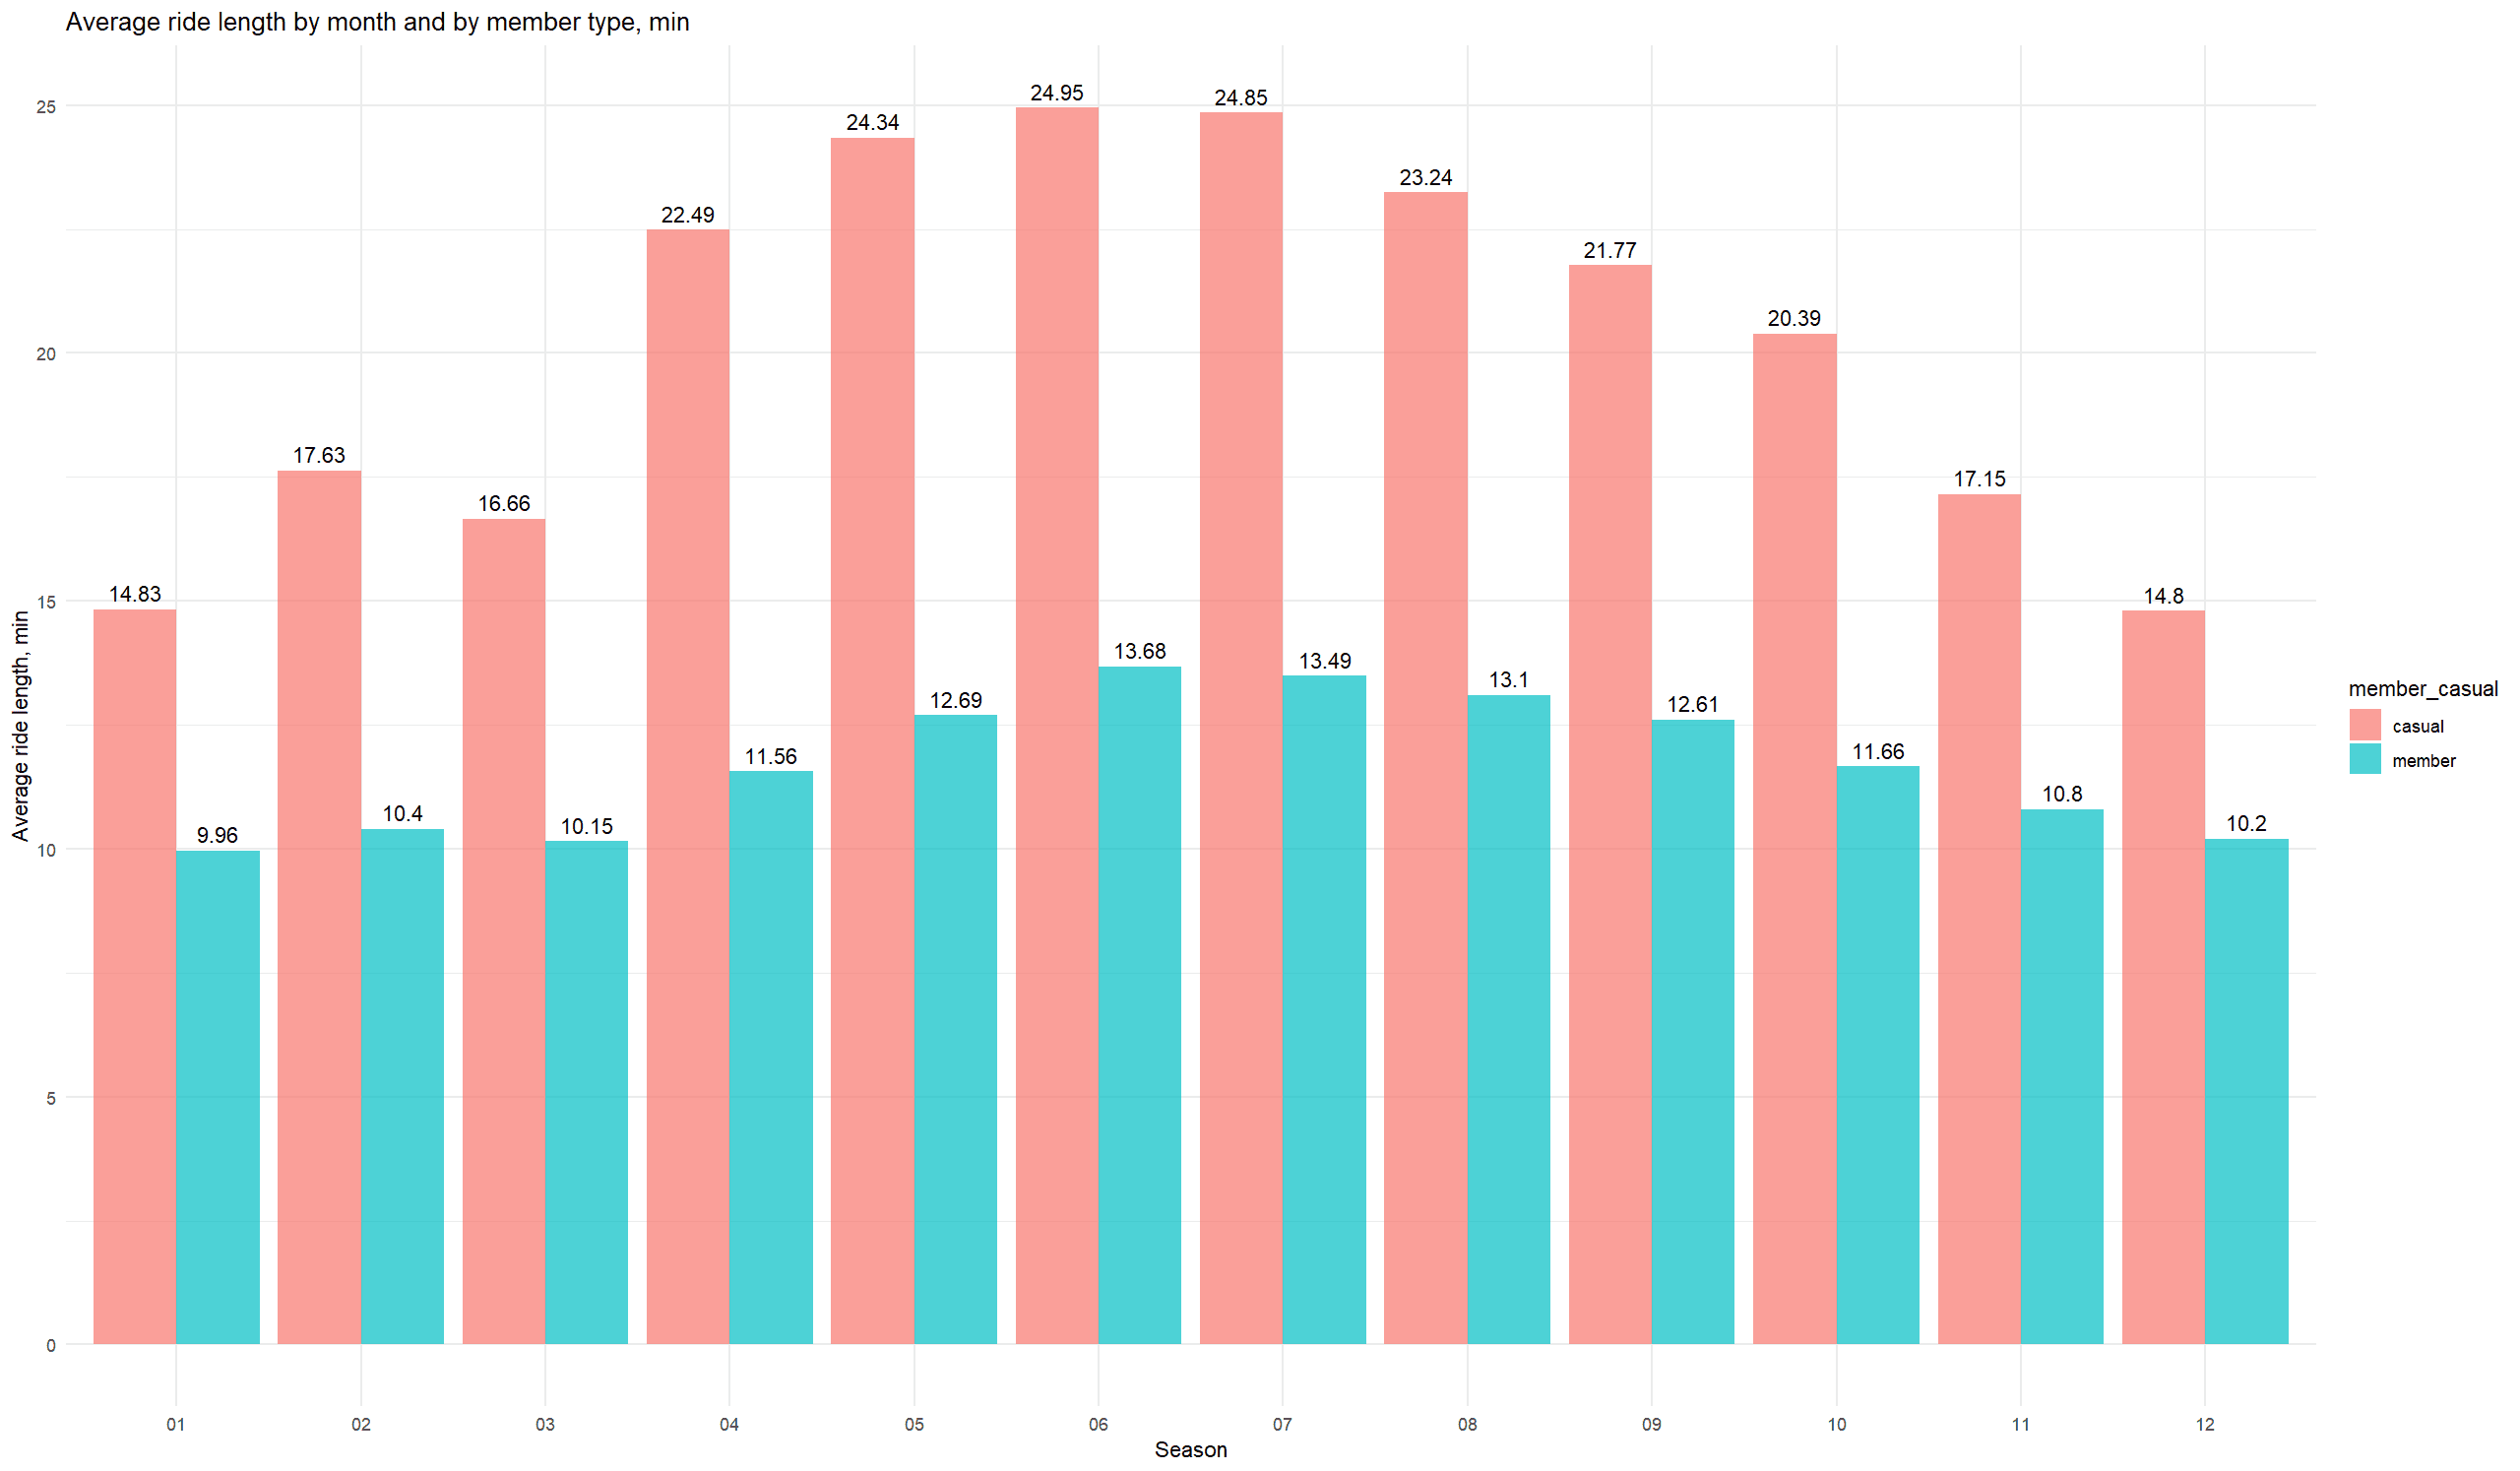

**Breakdown by season of year (Spring, Summer, Fall, Winter)**

In [ ]:
# Number of rides by season:
cyclistic_df %>%
  group_by(season) %>% 
  count(season)

In [ ]:
# Visualization of Number of rides by season:
season_order <- c("Spring", "Summer", "Fall", "Winter")
custom_labels <- function(x) {unit_format(unit = "M", scale = 1e-6)(x)}
cyclistic_df %>% 
  group_by(season) %>%
  summarise(count_ride = n()) %>%
  mutate(season = factor(season, levels = season_order)) %>%  # Set the order of seasons
  ggplot(mapping = aes(x = season, y = count_ride, fill = season)) + 
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +
  geom_text(aes(label = comma(count_ride), vjust = -0.5)) +
  labs(title = "Number of rides by season", x = "Season", y = "Number of rides", fill = 'Season') +
  theme_minimal() +
  theme(legend.position = "none") +  # Removing the legend
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 1900000, by = 250000), limits = c(0, 1900000))  # Formatting y-axis labels and limits

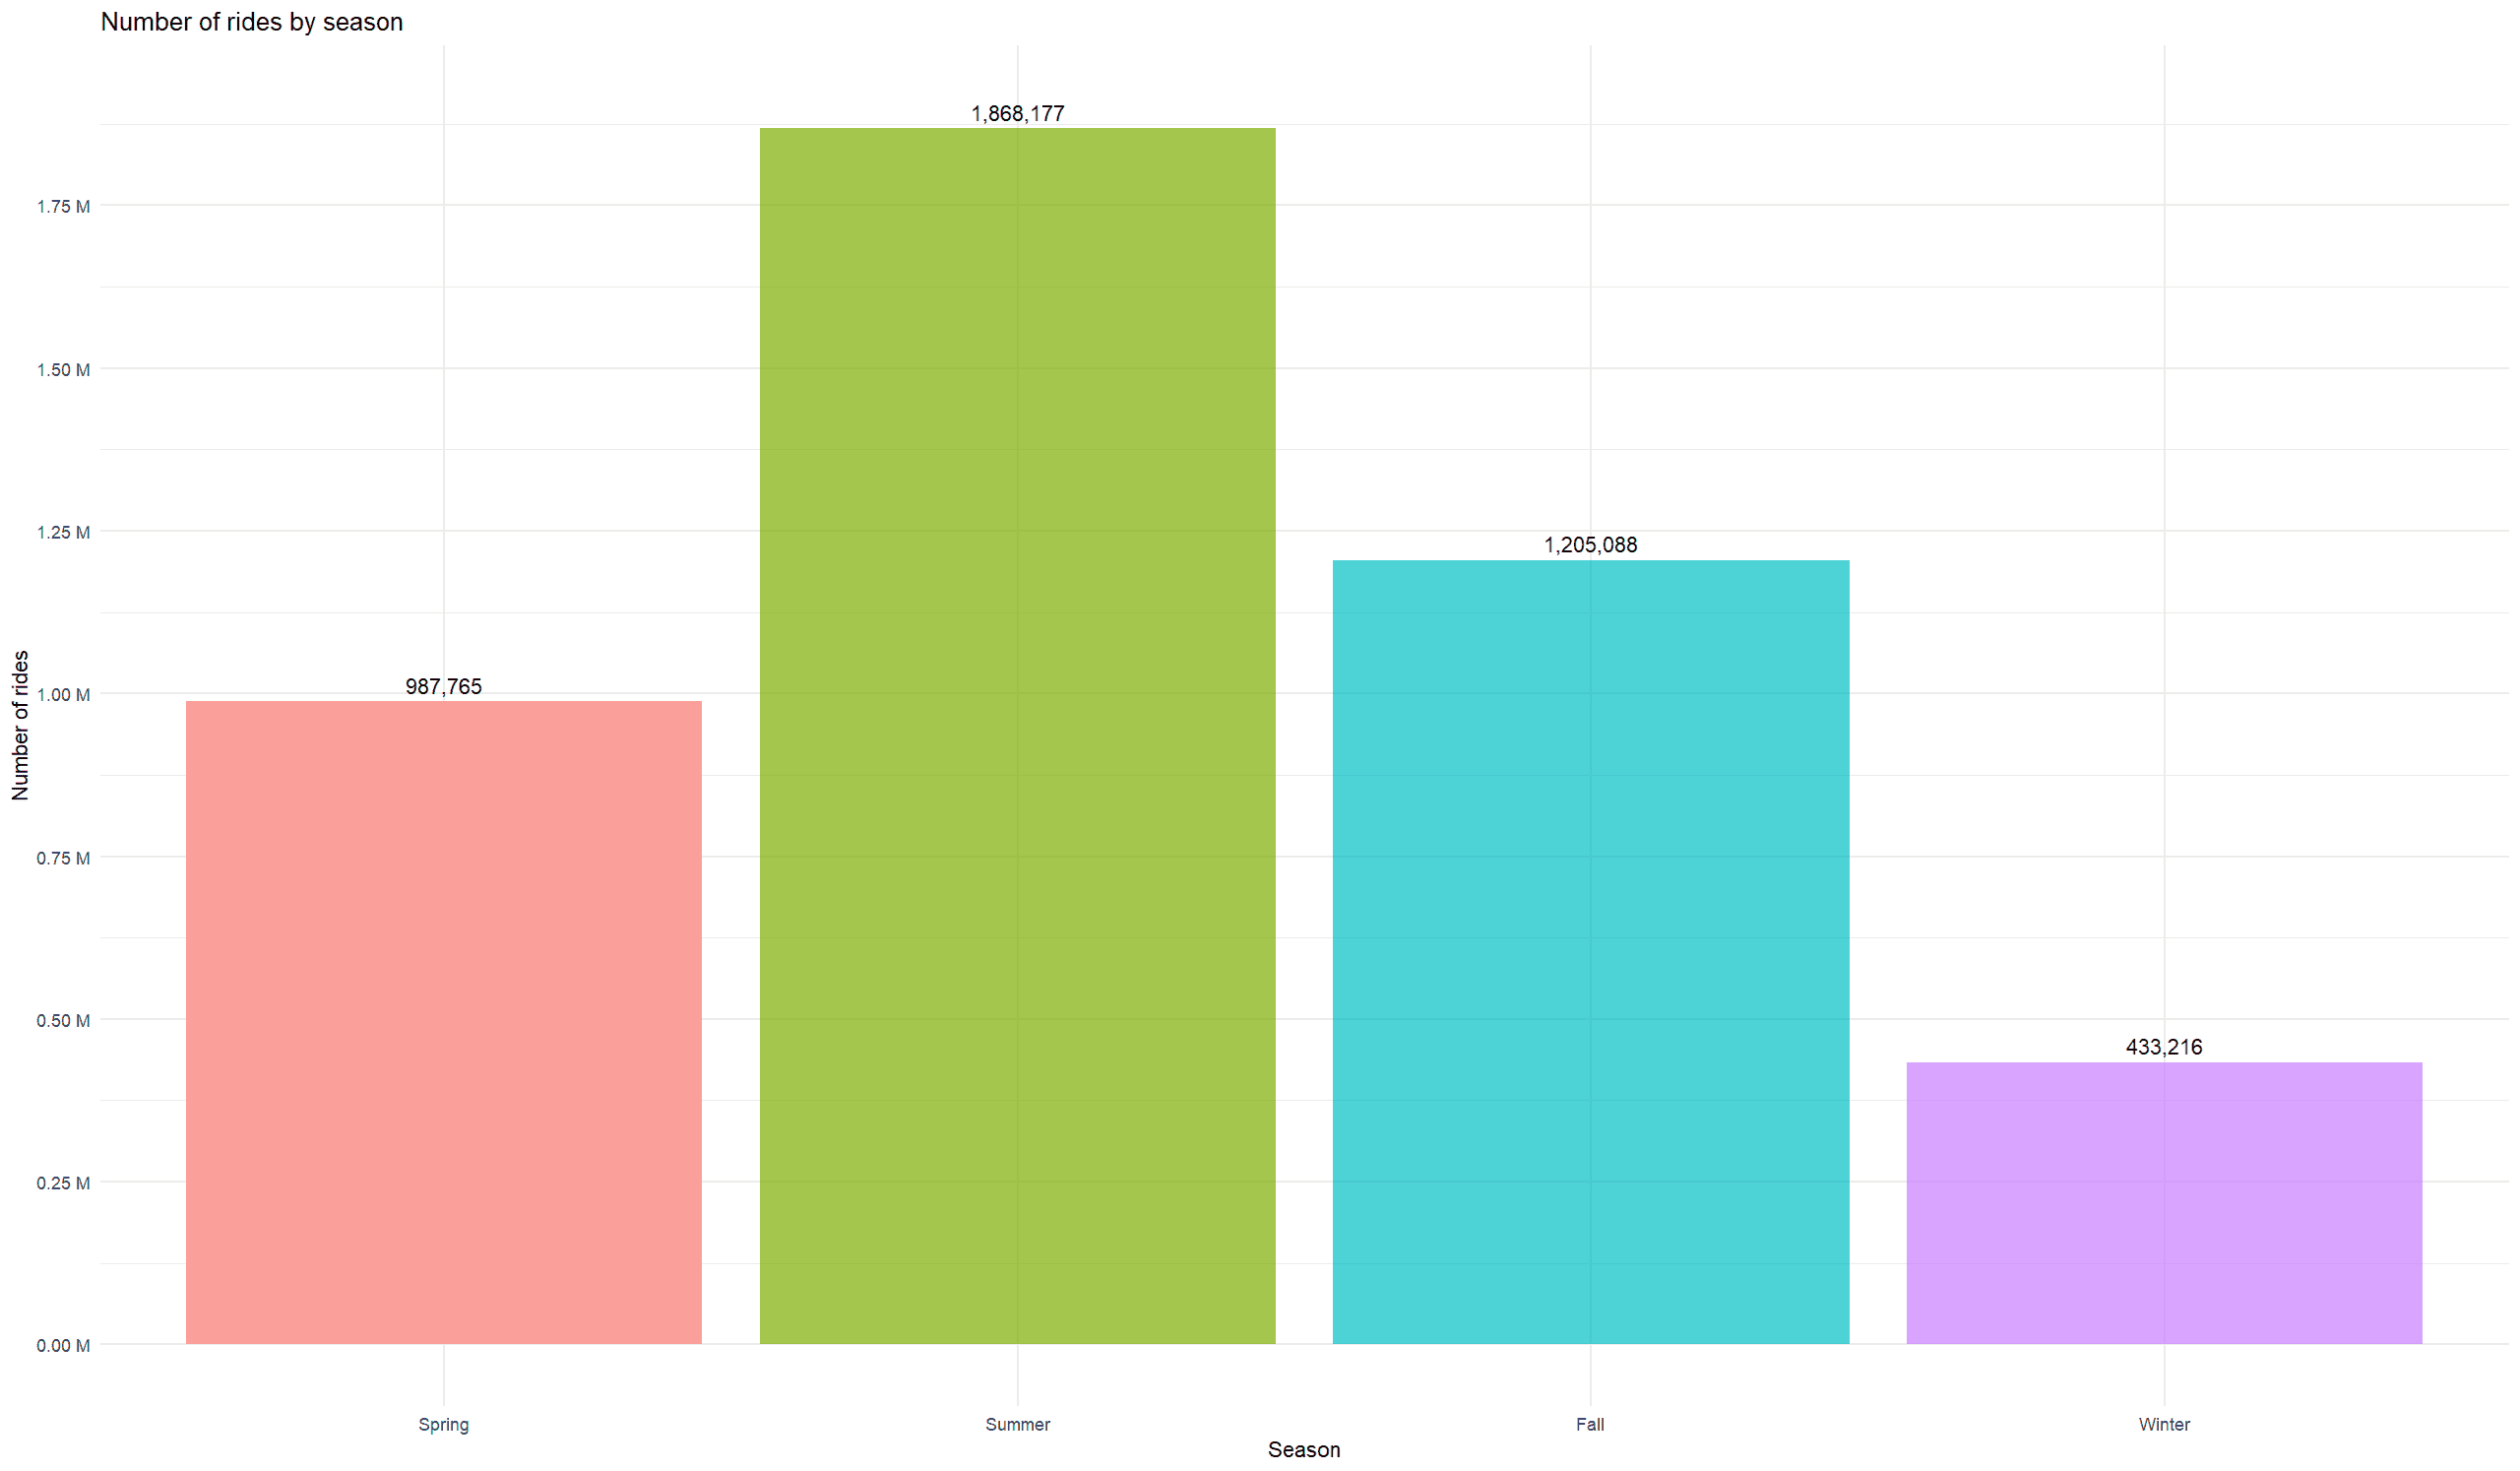

In [ ]:
# Average ride length by season:
cyclistic_df %>% 
  group_by(season) %>% 
  summarise_at(vars(ride_length), list(~round(mean(ride_length), 2)))

In [ ]:
# Visualization of Average ride length by season:
season_order <- c("Spring", "Summer", "Fall", "Winter")
cyclistic_df %>% 
  group_by(season) %>%
  summarize(average_ride_length = round(mean(ride_length), 2)) %>%
  mutate(season = factor(season, levels = season_order)) %>%  # Set the order of seasons
  ggplot(aes(x = season, y = average_ride_length, fill = season)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +
  geom_text(aes(label = average_ride_length, vjust = -0.5)) +
  labs(title = "Average ride length by season, min", x = "Season", y = "Average ride length, min", fill = 'Season') +
  theme_minimal() +
  theme(legend.position = "none")  # Removing the legend

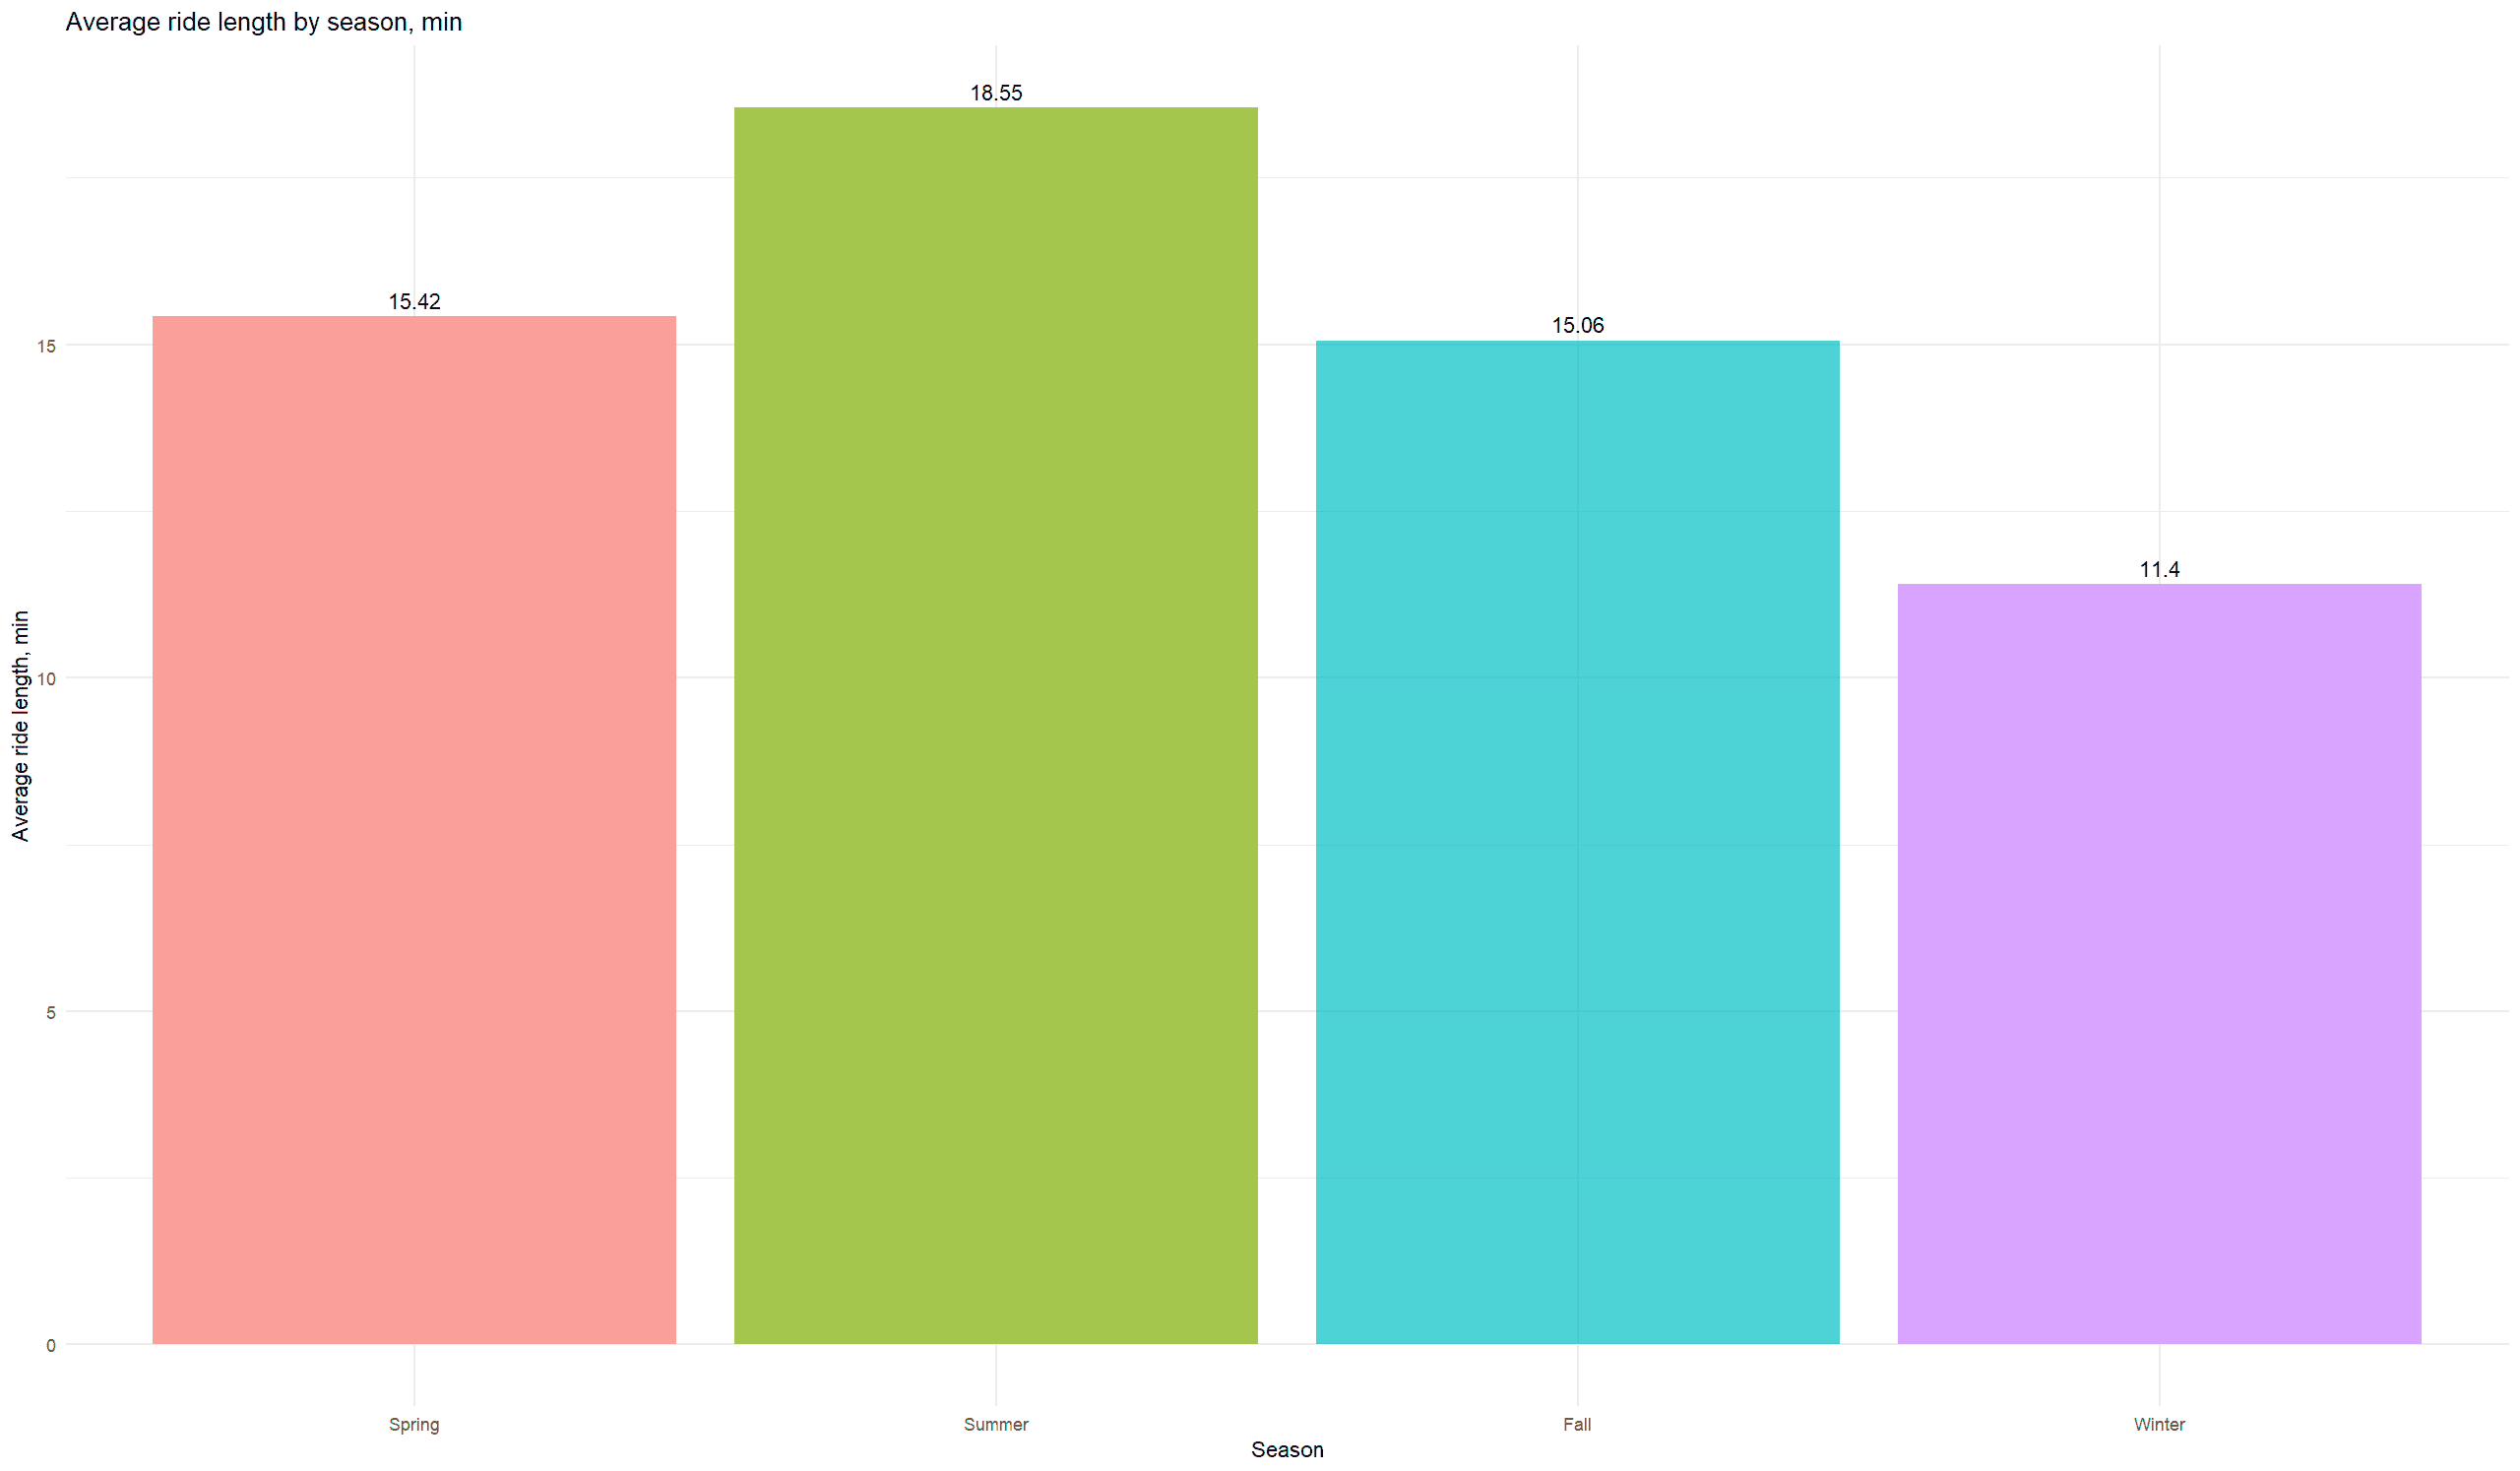

In [ ]:
# Number of rides by season and by member type:
cyclistic_df %>%
  group_by(season, member_casual) %>% 
  count(season)

In [ ]:
# Visualization of Number of rides by season and by member type:
season_order <- c("Spring", "Summer", "Fall", "Winter")
data <- cyclistic_df %>%
  group_by(season, member_casual) %>% 
  count(season)
custom_labels <- function(x) {unit_format(unit = "K", scale = 1e-3)(x)}
ggplot(data, aes(x = factor(season, levels = season_order), y = n, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +
  geom_text(aes(label = comma(n), vjust = -0.5), position = position_dodge(width = 0.9)) +
  labs(title = "Number of rides by season and by member type", x = "Season", y = "Number of rides", fill = "Member type") +
  theme_minimal() +
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 995000, by = 100000), limits = c(0, 995000))  # Formatting y-axis labels and limits

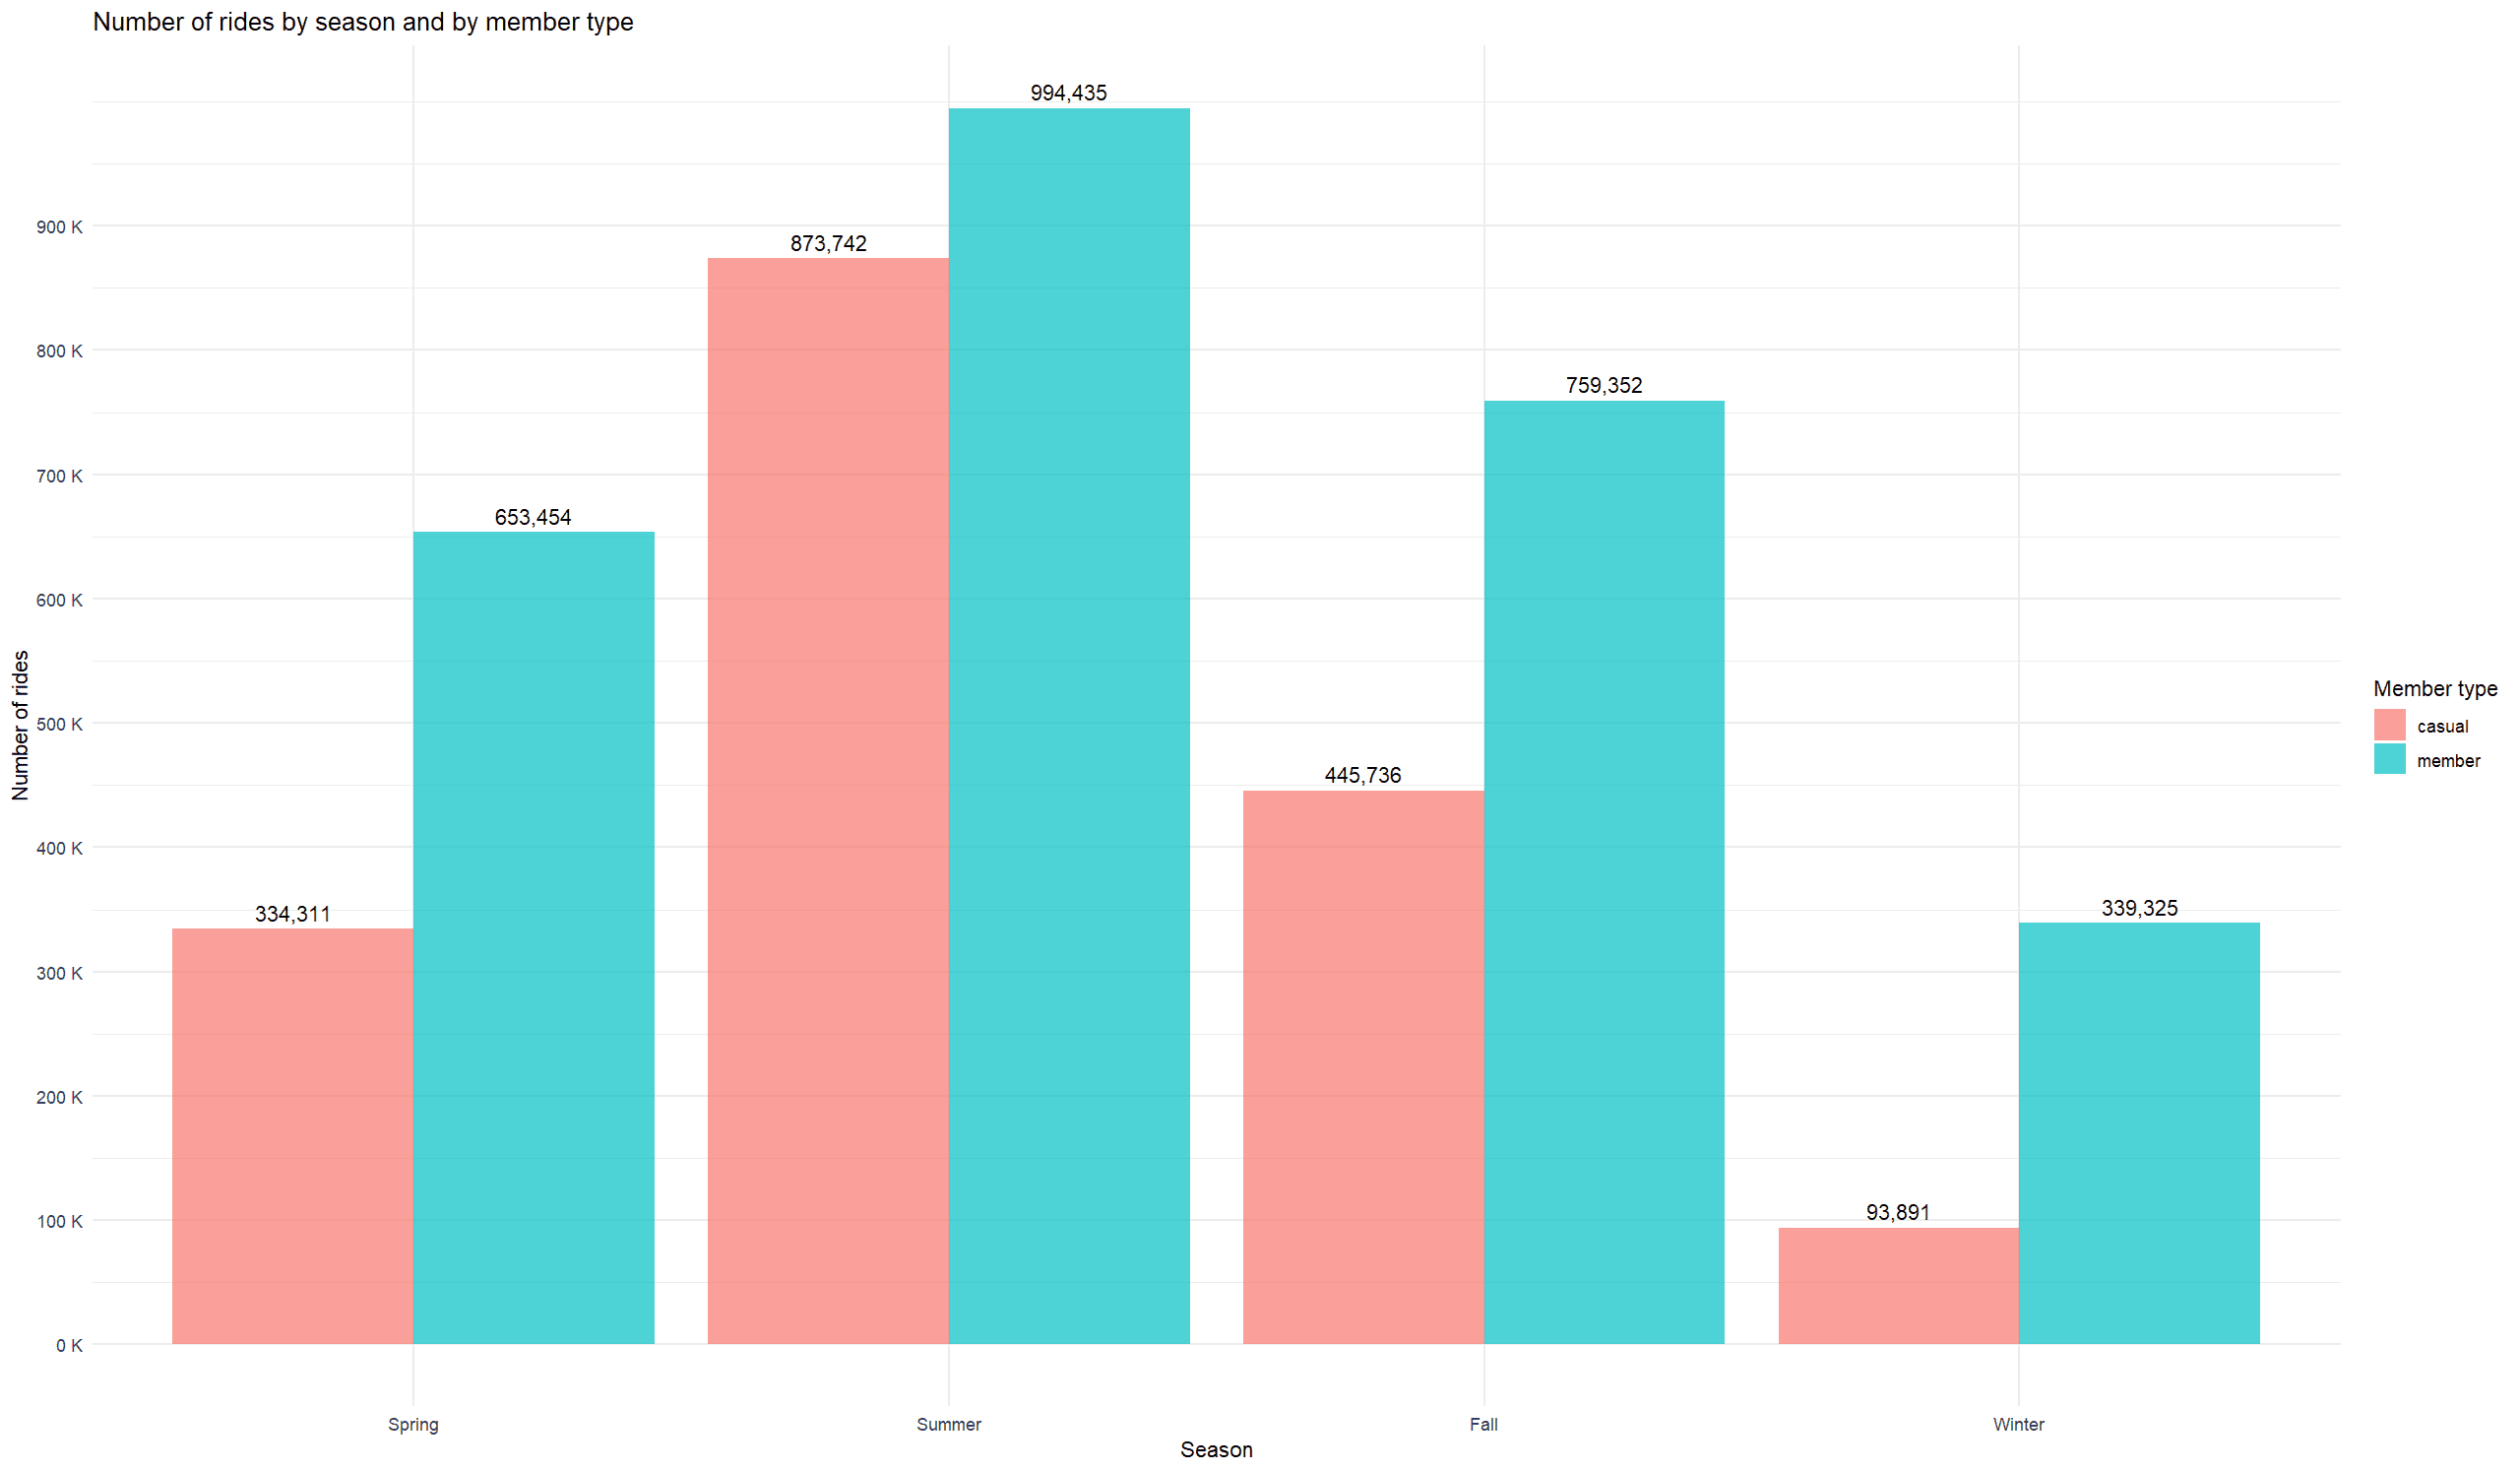

In [ ]:
# Visualize of Monthly bicycle use by season and by member type:
season_order <- c("Spring", "Summer", "Fall", "Winter")
custom_labels <- function(x) {unit_format(unit = "K", scale = 1e-3)(x)}
ggplot(data = cyclistic_df) +
  aes(x = month, fill = member_casual) +
  facet_wrap(~factor(season, levels = season_order), scales = "free_x") +  # Set scales to "free_x"
  geom_bar(alpha = 0.7) +
  labs(title = 'Visualize monthly bicycle use by season and by member type', x = 'Month', y = 'Number of rides', fill = 'Member type') +
  theme(axis.text = element_text(size = 5)) +
  theme_minimal() +
  scale_y_continuous(labels = custom_labels, breaks = seq(0, 700000, by = 100000), limits = c(0, 700000))  # Formatting y-axis labels and limits

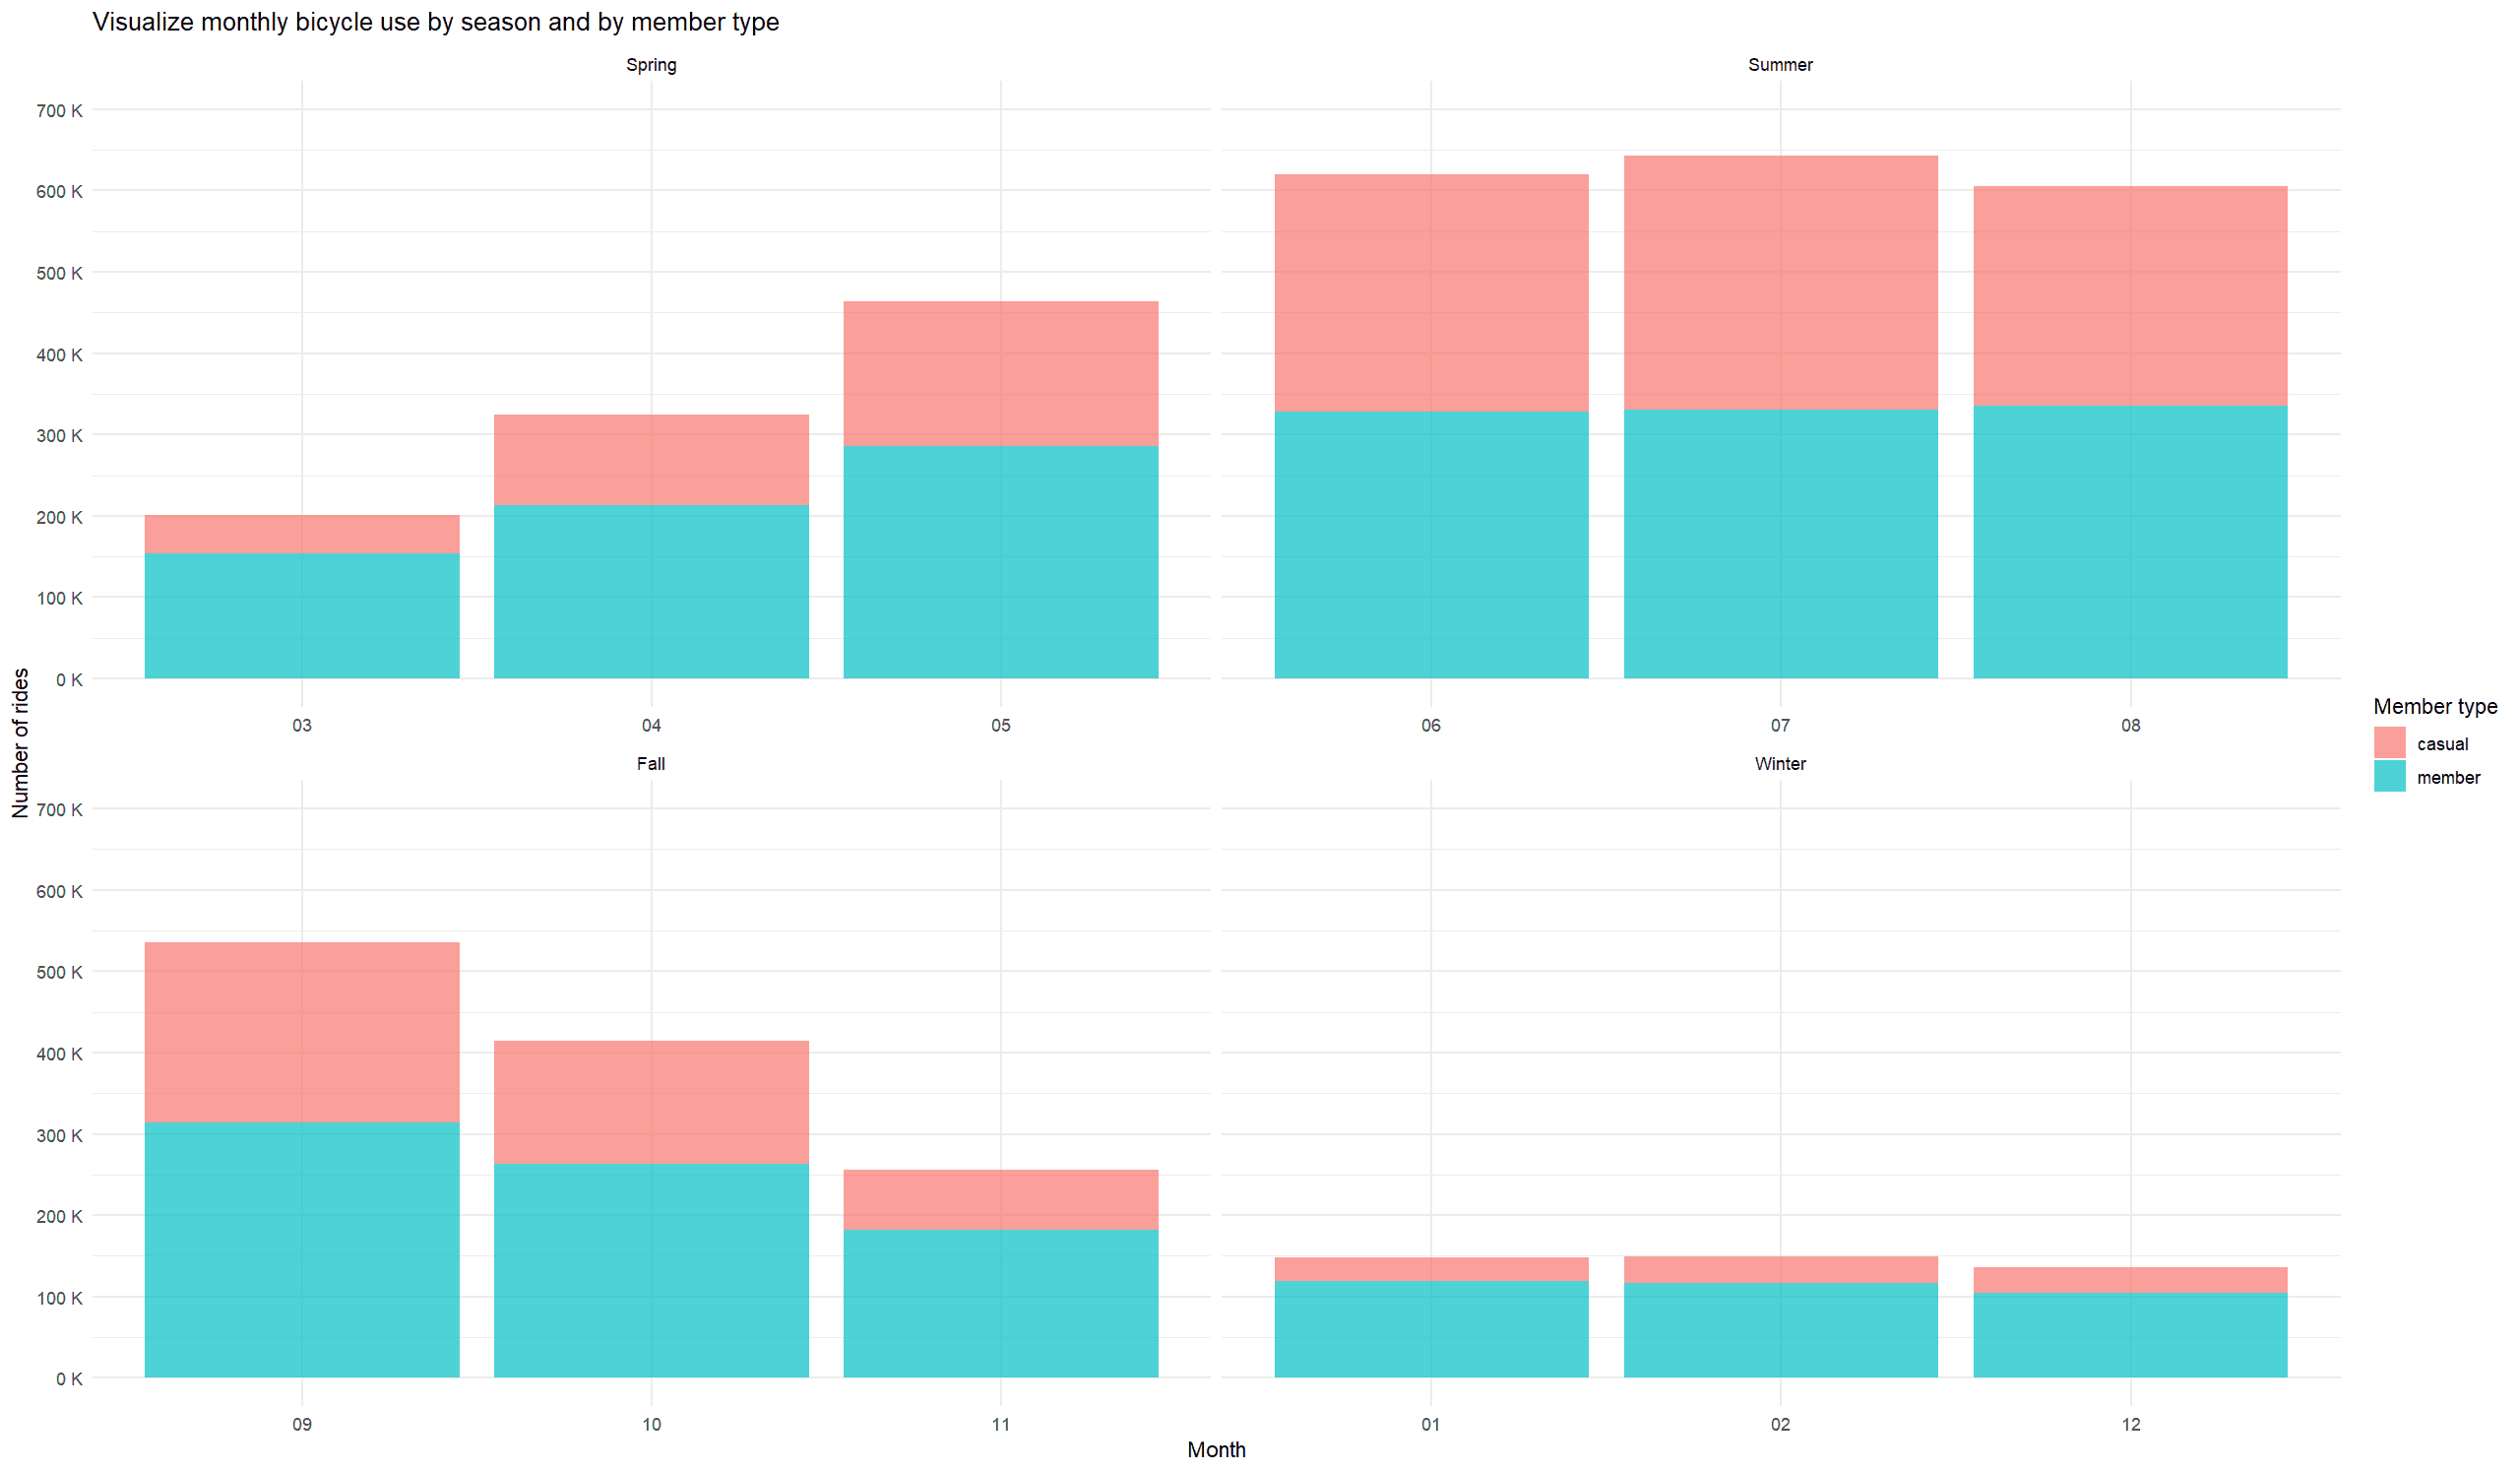

In [ ]:
# Average ride length by and by member type:
cyclistic_df %>% 
  group_by(season, member_casual) %>% 
  summarise_at(vars(ride_length), list(~round(mean(ride_length), 2)))

In [ ]:
# Visualization of Average ride length by and by member type:
season_order <- c("Spring", "Summer", "Fall", "Winter")
cyclistic_df %>% 
  group_by(season, member_casual) %>%
  summarize(average_ride_length = round(mean(ride_length), 2)) %>%
  mutate(season = factor(season, levels = season_order)) %>%
  ggplot(aes(x = season, y = average_ride_length, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) + 
  geom_text(aes(label = average_ride_length, vjust = -0.5), position = position_dodge(width = 0.9)) +
  labs(title = "Average ride length by and by member type, min", x = "Season", y = "Average ride length, min", fill = 'Member type') +
  theme_minimal()

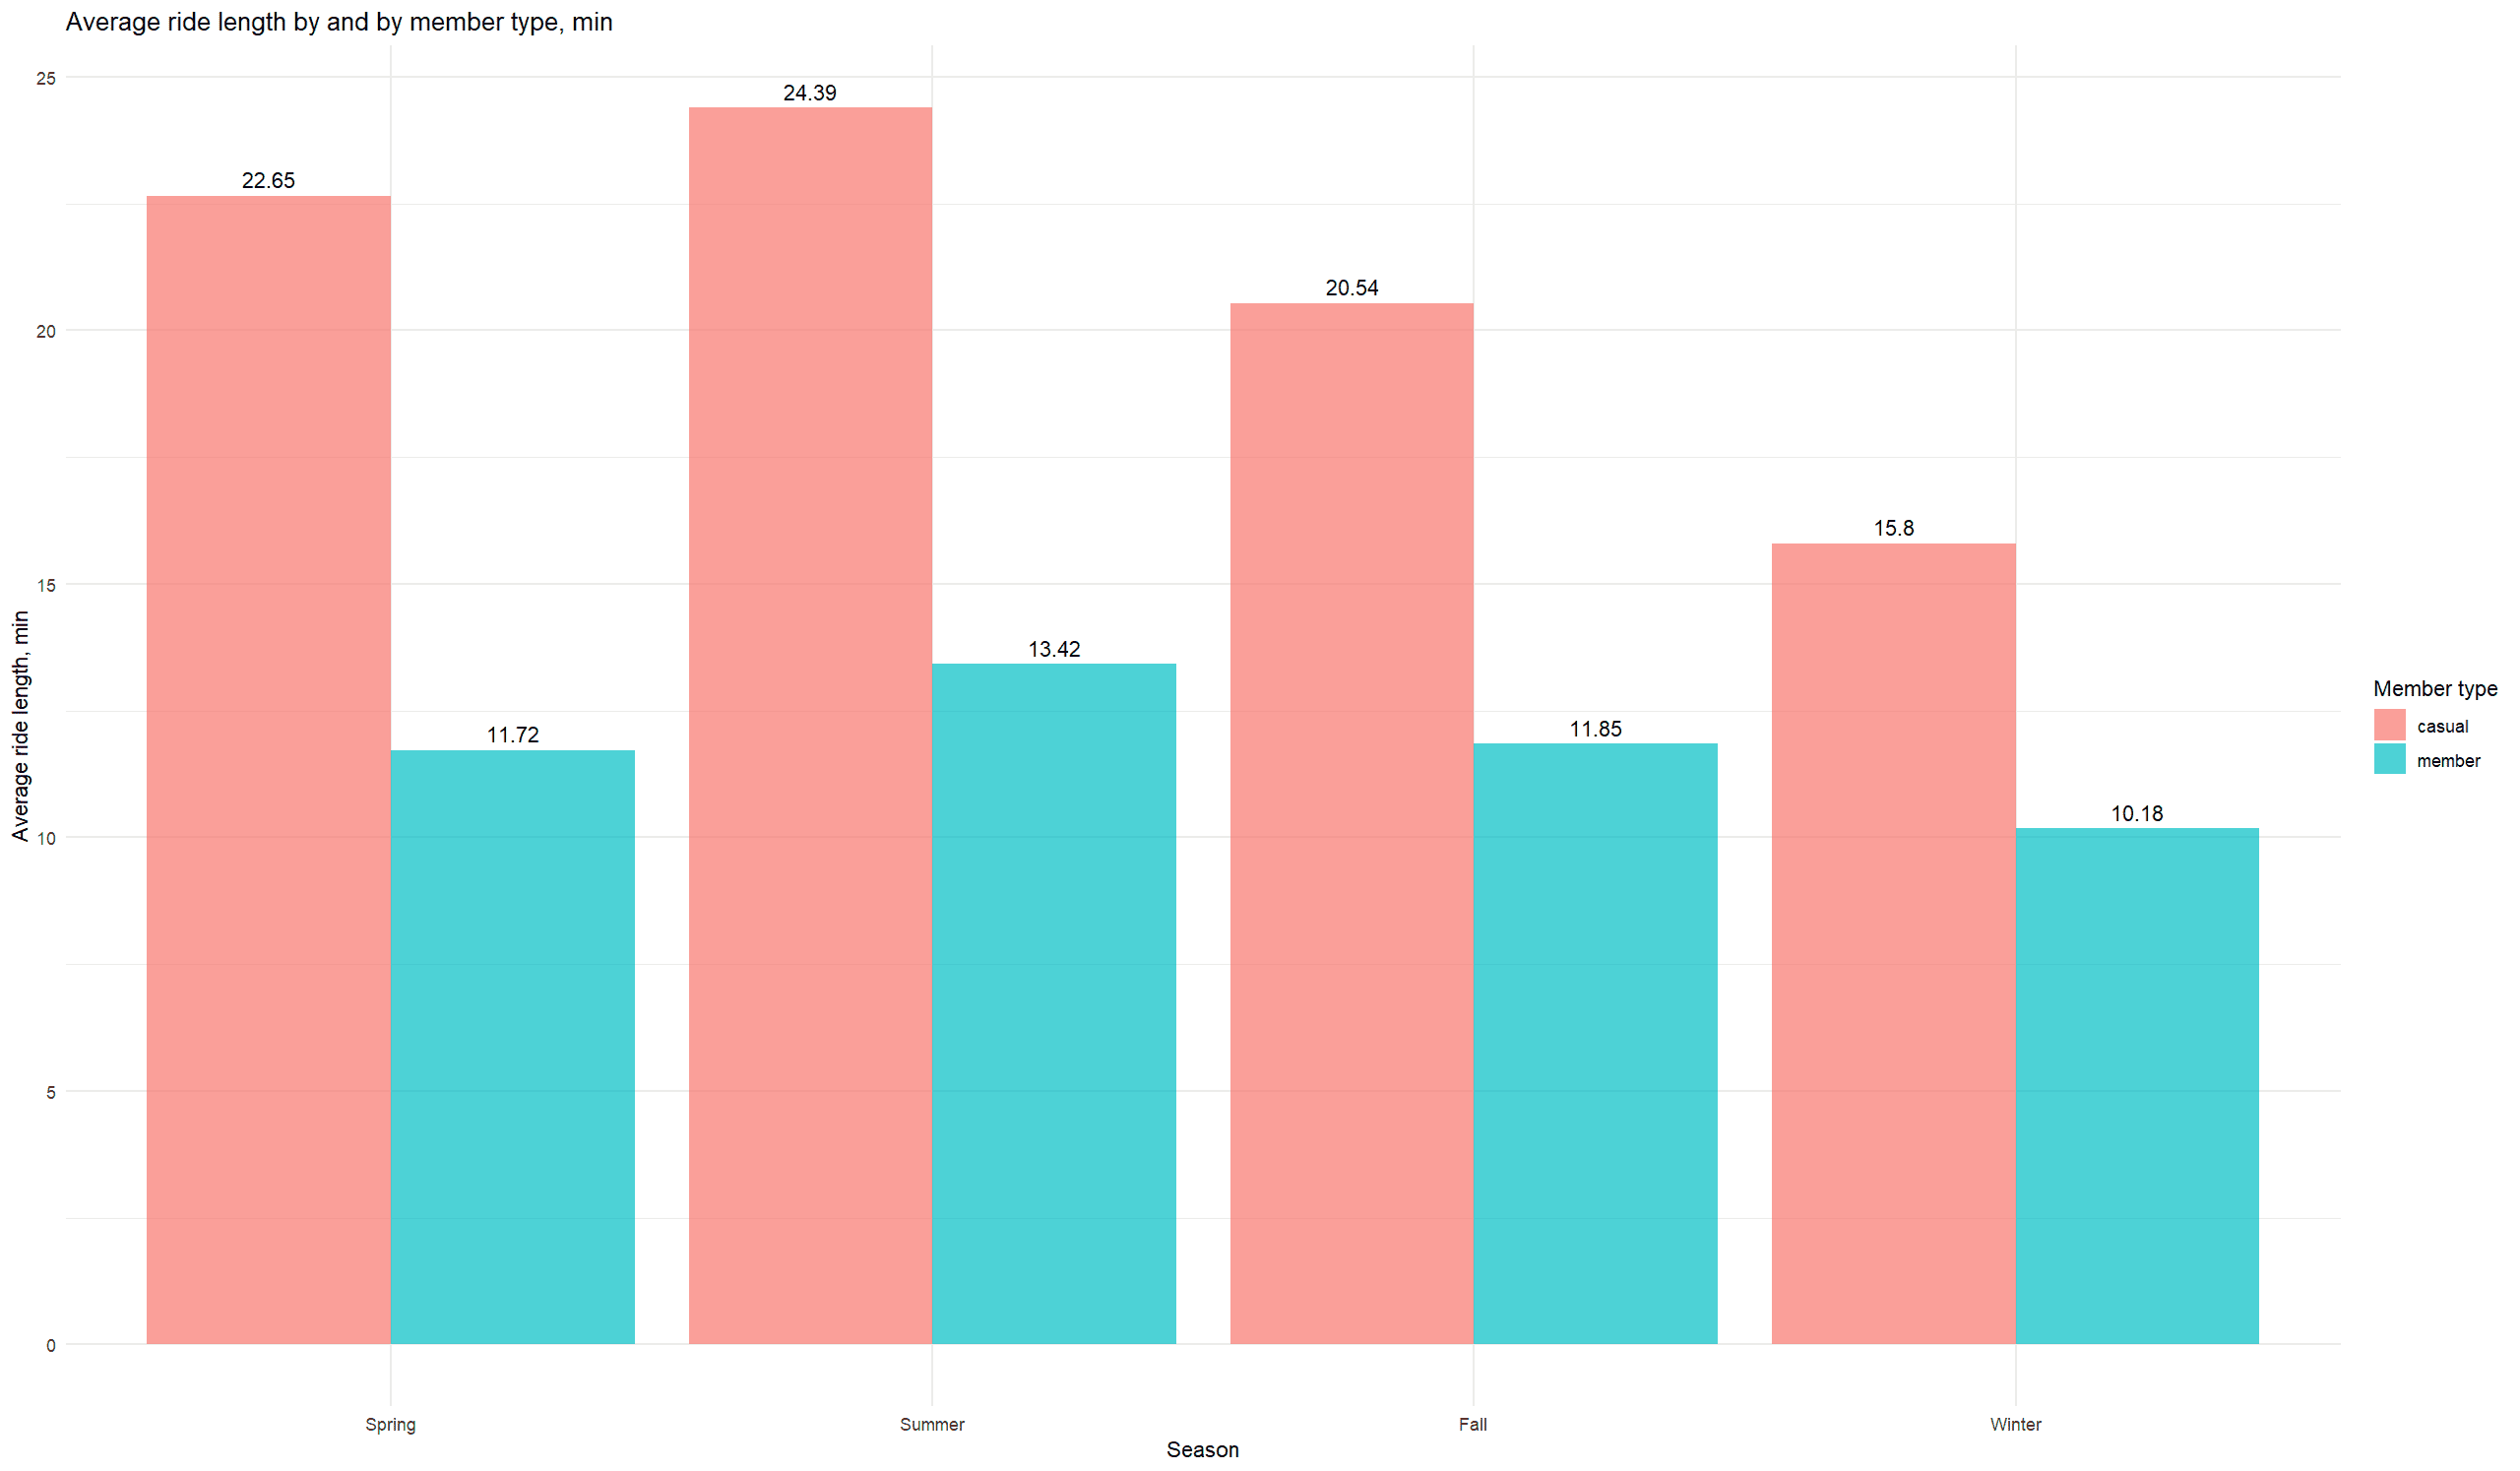

# **Act**

**From the analysis it is important to note that:**

* There were more members (2,746,566) than casual riders (1,747,680) during the study period.
* Classic bikes are the most popular (2,584,775), with electric bikes also taking a large share (1,755,027).
* Casual riders(22.61 mins) had a higher average ride length than members(12.18 mins).
* Casual riders had the longest ride time being 1439.37 mins or 23.99 hours.
* Average ride length 16.24 min.
* The most popular time of day for bike sharing both overall and for members and casual riders was Afternoon.
* The most popular day for bike sharing was Saturday.
* The most popular day for casual riders was Saturday with an average ride length of 26.44 mins.
* The most popular day for members was Thursday with an average ride length of 12.01 mins
* The most popular month was July (07) with 642,608 rides with an average ride duration of 19 mins.
* The least popular month was January (12) with 80,111 rides with an average ride duration of 11.5 mins.
* The most popular month for members was August with an average ride length of 13.1 mins.
* The least popular month for members was January with an average ride length of 10.27 mins.
* The most popular month for casual riders was July with an average ride length of 24.85 mins.
* The least popular month for casual riders was January with an average ride length of 18.08 mins.
* The most popular start station overall was "Streeter Dr & Grand Ave" (69,085).
* The most popular start station for members was "Kingsbury St & Kinzie St" with 23,601 trips starting from here.
* The most popular stations for casual trips were "Streeter Dr & Grand Ave" and "DuSable Lake Shore Dr & Monroe St" - 52,615 and 29,952 trips started from here, respectively.

**CONCLUSIONS**

To conclude the analysis, it is worth summarizing the results and drawing conclusions.

I believe that regular participants use bicycles mainly for commuting and probably also as work transportation. This is evidenced by fairly high activity during working hours, with a peak in the morning hours when people commute to work and in the evening hours (especially at 6pm) when they return from work.

Casual cyclists appear to be predominantly tourists on sightseeing trips. This is evidenced by their much higher average travel time during the day than regular participants, as well as their popular stations near parks and tourist areas. 

In addition, perhaps occasional cyclists are also families who want to spend the weekend together sightseeing - this is evidenced by the peak weekend traffic, which in my opinion cannot be explained by tourists alone.

**RECOMMENDATIONS**

Since the bulk of trips are made by temporary users in the summertime with peak usage on weekends (Friday, Saturday, Sunday), I would recommend introducing additional fare plans to cater for the specific bicycle usage patterns of temporary users. I suggest that the introduction of the following fare plans be considered:

* unlimited weekends for individual use
* unlimited weekends for group use
* unlimited summer

Promotional materials should be placed at the most popular bike rental stations, at train stations in passenger arrival areas, and on social media.

In addition, I recommend analyzing the following similar peeriod to evaluate the success of the recommendations I have proposed.


**THANK YOU FOR YOUR TIME !!!!**

[https://www.linkedin.com/in/prolabrus/](http://)